# April 2023 HCOOH Analysis 

### Target Paramters

In [714]:
number_of_fragment = 2 #(1 or 2)
symmetrize_electron = True
symmetrize_ion = False
write_momentum_to_file = True
manual_offset = False

m1 = 1
m2 = 45
q1 = 1
q2 = 1
# nitrogen 14
# helium 4
# HCOOH 46
#HCOOH dimer

ion1_tof = [700, 1400]
ion2_tof = [6250, 7000]
ion_xy_edge = [-40, 40]
#Helium -2, 2
#other experiment 40
elec_tof = [38, 72]
#nitrogen N+ N+ 2000-4000, 3000-6000
#HCOOH  HCOOH+ HCOOH+ 5500-7000, 6500-8250
#HCOOH  H+ COOH+ 700-1400, 6250-7000
#HCOOH  OH+ HCO+ 3000 5000 4500 6500
#Helium He+ 1950 2010

#ion xy He -2, 2

#He 40eV
#infile_name = r"G:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\CALBIRATION\He\he_40p59ev_horiz_11p0vcm_9p8g_a_001.root"
#N2
#infile_name = r"G:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\CALBIRATION\N2\1_24\n2_56p0ev_horiz_11p0vcm_9p8g_a.00005_005.root"
#HCOOH dimer
#infile_name = r"D:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240123_HCOOH_dimer\HCOOH_56p0ev_horiz_11p0vcm_9p8g _c.0004s_004.root"
#HCOOD dimer
#infile_name = r"D:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOD\20240206_HCOOD_Dimer\HCOOD_56p0ev_horiz_11p0vcm_9p8g _c.0003s_001.root"
#HCO-OH
#infile_name = r"G:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240126_H2O_CO\HCOOH_56p0ev_horiz_11p0vcm_9p8g _b.0001s_002.root"
#HCO-OH
#infile_name = r"D:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240202_H_HCOO\HCOOH_56p0ev_horiz_11p0vcm_9p8g _a.0000s.root"

infile_name = r"G:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240202_H_HCOO\HCOOH_56p0ev_horiz_11p0vcm_9p8g _d.0001s_007.root"

#he30eV, electron KE 6
#he46eV, electron KE 22
#he52eV, electron KE 28
#manual offset
if manual_offset:
    i_px0_offset = 0
    i_py0_offset = 2
    i_pz0_offset = -6
    i_px1_offset = 0
    i_py1_offset = 7
    i_pz1_offset = -6
else:
    i_px0_offset = 0
    i_py0_offset = 0
    i_pz0_offset = 0
    i_px1_offset = 0
    i_py1_offset = 0
    i_pz1_offset = 0
#HCOOH Dimer 0 2 -6 0 7 -6

In [715]:
######################################
### loading in necessary libraries ###
######################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import ticker
from matplotlib.colors import PowerNorm, LogNorm
from scipy.stats import norm
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
import pandas as pd

from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
from ipywidgets import interactive
# Enable interactive plots
#%matplotlib notebook
#%matplotlib inline

import uproot
import awkward as ak
import os

### Constants

In [716]:
PAU = 1.99285e-24           # Momentum in AU
MASSAU = 1822.888           # Mass in AU
VAU = 2.1877e6              # Velocity in AUs
EVAU = 27.2114              # eV in AU
EFIELDAU = 0.00805          # Electric field (V/cm) in AU
PI = 3.14159265             # PI
MEKG = 9.1093897e-31        # Electron Mass in Kg
MUKG = 1.66053886e-27       # u in Kg
COULOMB = 1.60217733e-19    # Elementary charge
Kg_over_AMU = 1.660538782e-27
C_over_au = 1.602176487e-19

### TOF Paramters

In [717]:
e1tof_left_edge = elec_tof[0]
e1tof_right_edge = elec_tof[1]
r1tof_left_edge = ion1_tof[0]
r1tof_right_edge = ion1_tof[1]

e2tof_left_edge = elec_tof[0]
e2tof_right_edge = elec_tof[1]
r2tof_left_edge = ion2_tof[0]
r2tof_right_edge = ion2_tof[1]

r1x_left_edge = ion_xy_edge[0]
r1x_right_edge= ion_xy_edge[1]
r1y_left_edge = ion_xy_edge[0]
r1y_right_edge= ion_xy_edge[1]

r2x_left_edge = ion_xy_edge[0]
r2x_right_edge= ion_xy_edge[1]
r2y_left_edge = ion_xy_edge[0]
r2y_right_edge= ion_xy_edge[1]

if symmetrize_ion:
    r1tof_left_edge = ion1_tof[0]
    r1tof_right_edge = ion2_tof[1]
    r2tof_left_edge = ion1_tof[0]
    r2tof_right_edge = ion2_tof[1]

B_field_ns = 37.2433
Bfield_clockwise = True

e_acc1mm = 70.0750 #mm 44.0
e_acc2mm = 138.1208 #mm 11.1
e_acc3mm = 5
e_Efield1_Vpcm = 11.0575#/7.00750 #11.2/4.4
e_Efield2_Vpcm = 0 #300/1.11
e_Efield3_Vpcm = 745#/0.5

l_acc1mm = 44 #mm 44.0
l_acc2mm = 11.1 #mm 11.1
l_acc3mm = 0
l_Efield1_Vpcm = 11.1 #11.2/4.4
l_Efield2_Vpcm = 300 #300/1.11
l_Efield3_Vpcm = 0


# Here we first load in the TOF and (x,y) hit positions of electrons and ions. LMF2Root is used to go from raw to (x,y,TOF).

### When we load in the data, we use some list comprehension and 'if' statements to set conditions on the ion TOF and electron TOF to only ions of interest and associated electrons. In the data, columns (0,1,2) are the first electron hit (TOF,x,y). Columns (3,4,5) are the second electron hit. Columns (6,7,8) are the ion hit (TOF,x,y). We are taking 2 electron hits since conditions in 333 were challenging and count rates low.

In [718]:

root_file = uproot.open(infile_name)

l_key_name = root_file.keys()
filtered_variables = [var for var in l_key_name if 'Data' in var]
tree_name = filtered_variables[0]
print(tree_name)

branch = root_file[tree_name]["e1tof"]

e1tof = ak.to_numpy(root_file[tree_name]["e1tof"].array())
e1x = ak.to_numpy(root_file[tree_name]["e1x"].array())
e1y = ak.to_numpy(root_file[tree_name]["e1y"].array())
e2tof = ak.to_numpy(root_file[tree_name]["e2tof"].array())
e2x = ak.to_numpy(root_file[tree_name]["e2x"].array())
e2y = ak.to_numpy(root_file[tree_name]["e2y"].array())
r1tof = ak.to_numpy(root_file[tree_name]["r1tof"].array())
r1x = ak.to_numpy(root_file[tree_name]["r1x"].array())
r1y = ak.to_numpy(root_file[tree_name]["r1y"].array())
r2tof = ak.to_numpy(root_file[tree_name]["r2tof"].array())
r2x = ak.to_numpy(root_file[tree_name]["r2x"].array())
r2y = ak.to_numpy(root_file[tree_name]["r2y"].array())
bunchmarker = ak.to_numpy(root_file[tree_name]["bunchmarker"].array())
totaltof = np.concatenate((r1tof, r2tof), axis = 0)

root_file.close()
print(len(r1tof))
print(len(r2tof))
print(len(totaltof))

Data;2
319571
319571
639142


In [719]:
# Extracting relevant information from the input file name
folder_path, file_name = os.path.split(infile_name)
file_name_without_extension = os.path.splitext(file_name)[0]

# Create the folder if it doesn't exist
output_folder = os.path.join(folder_path, file_name_without_extension)
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

folder_path = output_folder

In [720]:
if number_of_fragment == 1:
    e2tof = e1tof
    e2x = e1x
    e2y = e1y
    r2tof = r1tof
    r2x = r1x
    r2y = r1y

In [721]:
if symmetrize_electron & (number_of_fragment == 2):
    e_swap_mask_1 = np.random.randint(2, size=len(e1tof))
    e_swap_mask_2 = 1 - e_swap_mask_1 #create array that's the opposite of the top one

    # Assuming e_swap_mask_1, e1tof, and e2tof are your existing arrays
    e1tof_new = np.where(e_swap_mask_1 == 1, e2tof, e1tof)
    e2tof_new = np.where(e_swap_mask_1 == 1, e1tof, e2tof)
    e1x_new = np.where(e_swap_mask_1 == 1, e2x, e1x)
    e2x_new = np.where(e_swap_mask_1 == 1, e1x, e2x)
    e1y_new = np.where(e_swap_mask_1 == 1, e2y, e1y)
    e2y_new = np.where(e_swap_mask_1 == 1, e1y, e2y)

    e1tof_old = e1tof
    e2tof_old = e2tof
    e1x_old = e1x
    e2x_old = e2x
    e1y_old = e1y
    e2y_old = e2y

    e1tof = e1tof_new
    e2tof = e2tof_new
    e1x = e1x_new
    e2x = e2x_new
    e1y = e1y_new
    e2y = e2y_new

# # Now, e1tof_new and e2tof_new contain the swapped values based on the mask e_swap_mask_1


In [722]:
if symmetrize_ion & (number_of_fragment == 2):
    r_swap_mask_1 = np.random.randint(2, size=len(r1tof))
    r_swap_mask_2 = 1 - r_swap_mask_1 #create array that's the opposite of the top one

    # Assuming e_swap_mask_1, e1tof, and e2tof are your existing arrays
    r1tof_new = np.where(r_swap_mask_1 == 1, r2tof, r1tof)
    r2tof_new = np.where(r_swap_mask_1 == 1, r1tof, r2tof)
    r1x_new = np.where(r_swap_mask_1 == 1, r2x, r1x)
    r2x_new = np.where(r_swap_mask_1 == 1, r1x, r2x)
    r1y_new = np.where(r_swap_mask_1 == 1, r2y, r1y)
    r2y_new = np.where(r_swap_mask_1 == 1, r1y, r2y)

    r1tof_old = r1tof
    r2tof_old = r2tof
    r1x_old = r1x
    r2x_old = r2x
    r1y_old = r1y
    r2y_old = r2y

    r1tof = r1tof_new
    r2tof = r2tof_new
    r1x = r1x_new
    r2x = r2x_new
    r1y = r1y_new
    r2y = r2y_new

# # Now, e1tof_new and e2tof_new contain the swapped values based on the mask e_swap_mask_1


In [723]:
#############
### HIT 1 ###
#############
e_TOF0 = e1tof
e_x0 = e1x
e_y0 = e1y
i_TOF0 = r1tof
i_x0 = r1x
i_y0 = r1y

#############
### HIT 2 ###
#############
e_TOF1 = e2tof
e_x1 = e2x
e_y1 = e2y
i_TOF1 = r2tof
i_x1 = r2x
i_y1 = r2y

print(len(e_TOF0))
print(len(e_x0))

319571
319571


## Rough Check

### Electron Graphs

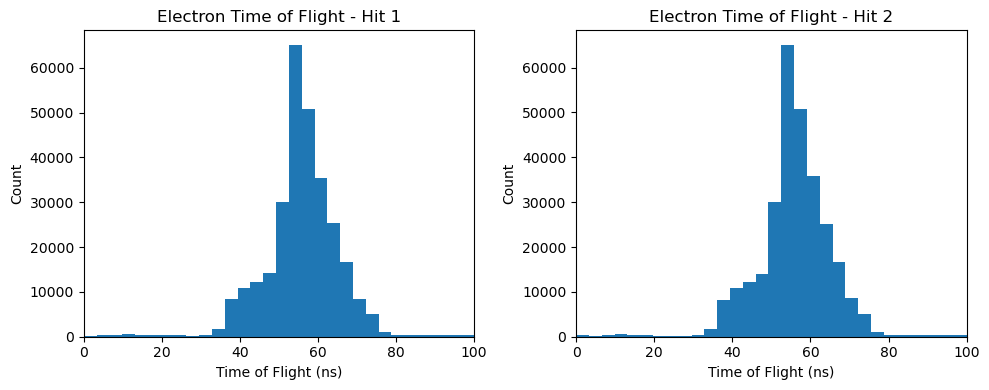

In [724]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

#########################
### peak of TOF hit 1 ###
#########################

ax1.hist(e_TOF0, bins=100)

# Set x-axis and y-axis limits
ax1.set_xlim(0, 100)
ax1.set_ylim(0, None)  # Adjust the y-axis limit as needed

# Add title and labels
ax1.set_title('Electron Time of Flight - Hit 1')
ax1.set_xlabel('Time of Flight (ns)')
ax1.set_ylabel('Count')

#########################
### peak of TOF hit 2 ###
#########################

ax2.hist(e_TOF1, bins=100)

# Set x-axis and y-axis limits
ax2.set_xlim(0, 100)
ax2.set_ylim(0, None)  # Adjust the y-axis limit as needed

# Add title and labels
ax2.set_title('Electron Time of Flight - Hit 2')
ax2.set_xlabel('Time of Flight (ns)')
ax2.set_ylabel('Count')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


-0.6708813870986461
-1.4639252910840241


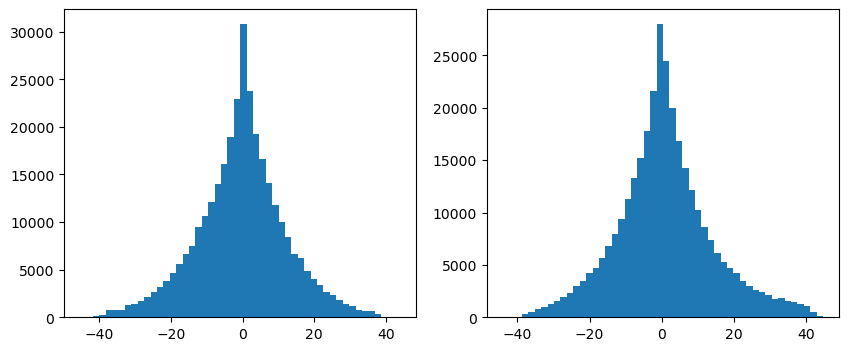

In [725]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

#########################
### peak of TOF hit 1 ###
#########################

a = ax1.hist(e_x0,bins=50)
b = list(zip(*a[0:2]))
e_TOF_max0 = max(b)[1]
print(e_TOF_max0)

#########################
### peak of TOF hit 2 ###
#########################

a = ax2.hist(e_y0,bins=50)
b = list(zip(*a[0:2]))
e_TOF_max1 = max(b)[1]
print(e_TOF_max1)

####################################
#USE THE MAX TO CELL ABOVE FOR SHIFT
####################################


### Ion Graphs

969.2055855770941
6705.040873077748


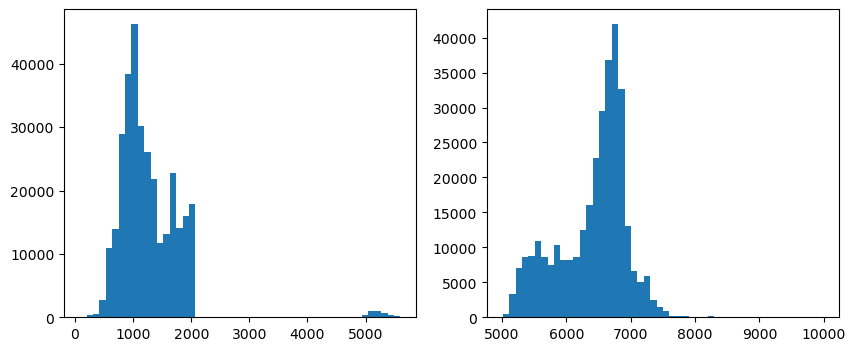

In [726]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

########################
### peak of ion1 TOF ###
########################
a = ax1.hist(i_TOF0[(i_TOF0>0) & (i_TOF0<10000)],bins=50)
b = list(zip(*a[0:2]))
i_TOF_max0 = max(b)[1]
print(i_TOF_max0)

########################
### peak of ion2 TOF ###
########################
a = ax2.hist(i_TOF1[(i_TOF1>0) & (i_TOF1<10000)],bins=50)
b = list(zip(*a[0:2]))
i_TOF_max1 = max(b)[1]
print(i_TOF_max1)

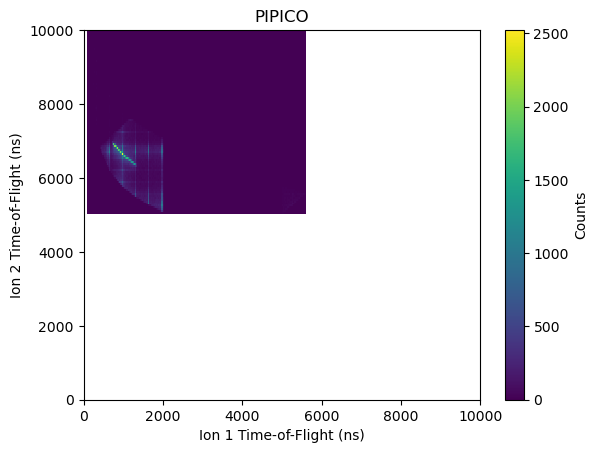

In [727]:
# Enable interactive plots
#%matplotlib notebook

# Assuming i_TOF0 and i_TOF1 are your data arrays
plt.hist2d(i_TOF0, i_TOF1, bins=(200, 200))

# Add title and labels
plt.title('PIPICO')
plt.xlabel('Ion 1 Time-of-Flight (ns)')
plt.ylabel('Ion 2 Time-of-Flight (ns)')

plt.xlim(0, 10000)
plt.ylim(0, 10000)

# Show colorbar
plt.colorbar(label='Counts')

#3213  6421
#2800 5620
#4640 4840
#3472  6047
#%matplotlib inline

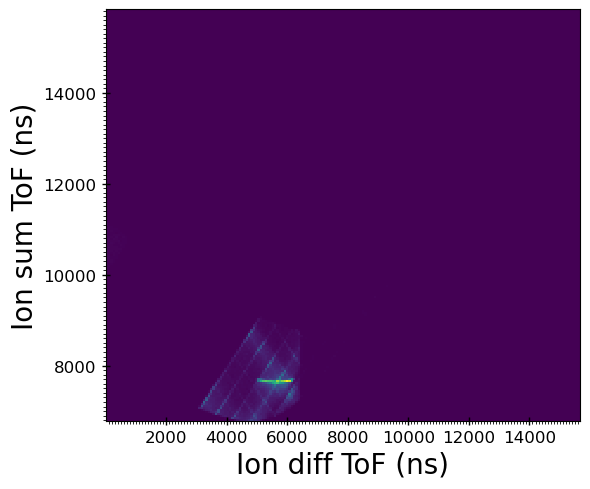

In [728]:
fig, ax = plt.subplots(1,1,figsize=(6,5))

plt.hist2d(i_TOF1-i_TOF0, i_TOF1+i_TOF0, bins = (200,200));#, cmap='hsv');
ax.set_xlabel('Ion diff ToF (ns)',fontsize=20,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Ion sum ToF (ns)',fontsize=20,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the font size of major tick labels
ax.tick_params(axis='both', which='minor', labelsize=10)  # Adjust the font size of minor tick labels
ax.tick_params(direction='inout', length=6, width=1, colors='black', grid_color='r', grid_alpha=0.5)

fig.tight_layout()
#fig.show()

5510.833382449099


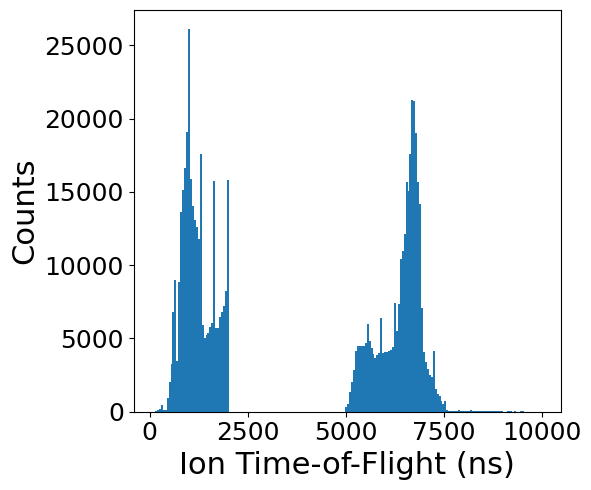

In [729]:
##################################
### make histogram of ion TOFs ###
##################################
fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.hist(totaltof[(totaltof>0)&(totaltof<10000)],bins=200,histtype='stepfilled')
ax.set_xlabel('Ion Time-of-Flight (ns)',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Counts',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.tick_params(labelsize=18)
fig.tight_layout()
#plt.yscale("log")
print(np.amax(i_TOF0)-np.amin(i_TOF0)) #difference in max and min TOF

-2.5698097189490596
-0.4203175043689882


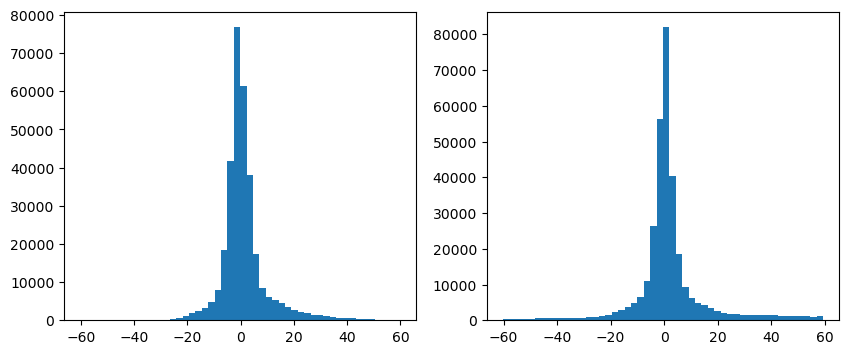

In [730]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

#########################
### peak of TOF hit 1 ###
#########################

a = ax1.hist(i_x1,bins=50)
b = list(zip(*a[0:2]))
e_TOF_max0 = max(b)[1]
print(e_TOF_max0)

#########################
### peak of TOF hit 2 ###
#########################

a = ax2.hist(i_y1,bins=50)
b = list(zip(*a[0:2]))
e_TOF_max1 = max(b)[1]
print(e_TOF_max1)

####################################
#USE THE MAX TO CELL ABOVE FOR SHIFT
####################################


Text(0, 0.5, 'i_y1 (mm)')

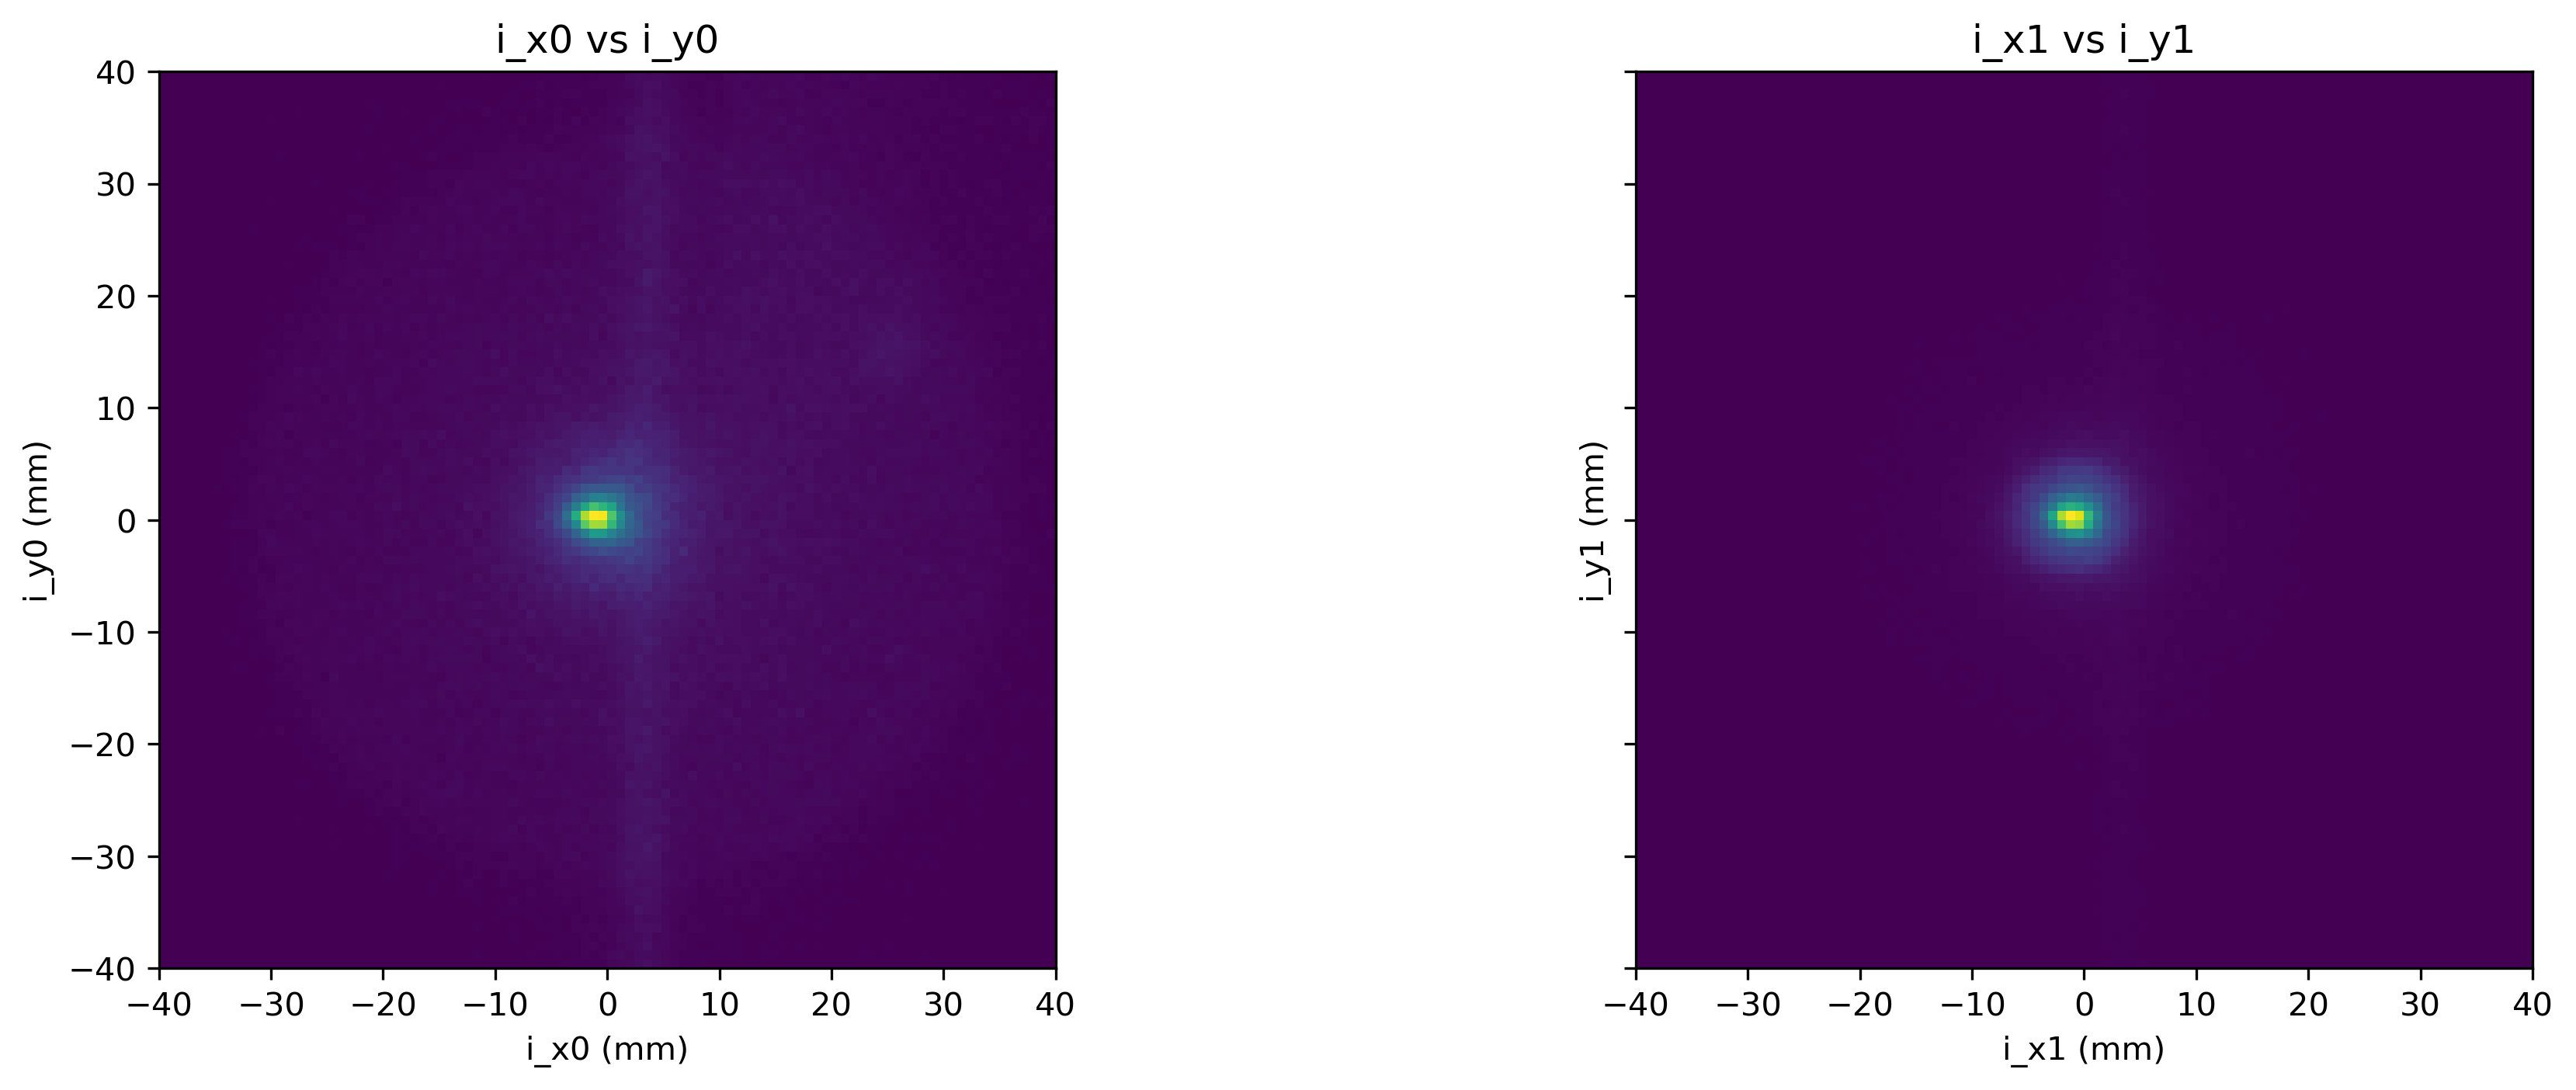

In [731]:
# Determine the data range
x_range = (-40, 40)
y_range = (-40, 40)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(r1x, r1y, bins=(100, 100), range=[x_range, y_range])
axs[0].set_aspect('equal')
axs[0].set_title('i_x0 vs i_y0')
axs[0].set_xlabel('i_x0 (mm)')
axs[0].set_ylabel('i_y0 (mm)')


hist2 = axs[1].hist2d(r2x, r2y, bins=(100, 100), range=[x_range, y_range])
axs[1].set_aspect('equal')
axs[1].set_title('i_x1 vs i_y1')
axs[1].set_xlabel('i_x1 (mm)')
axs[1].set_ylabel('i_y1 (mm)')

### Electron Graphs

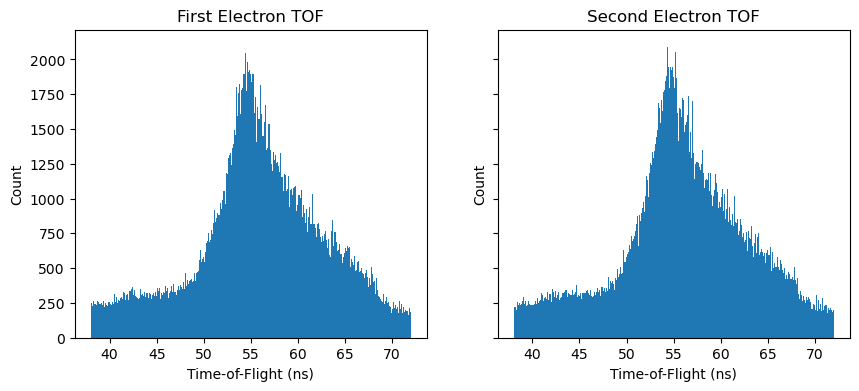

In [732]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4), sharey = True)

########################
### peak of ion1 TOF ###
########################
ax1.hist(e1tof[(r1tof>0) & (r1tof<10000) &(e1tof>38) & (e1tof<72)],bins=400);
ax1.set_title('First Electron TOF');
ax1.set_xlabel('Time-of-Flight (ns)');
ax1.set_ylabel('Count');


ax2.hist(e2tof[(r2tof>0) & (r2tof<10000) & (e2tof>38) & (e2tof<72)],bins=400);
ax2.set_title('Second Electron TOF');
ax2.set_xlabel('Time-of-Flight (ns)');
ax2.set_ylabel('Count');
#plt.yscale("log")
#fig.show()

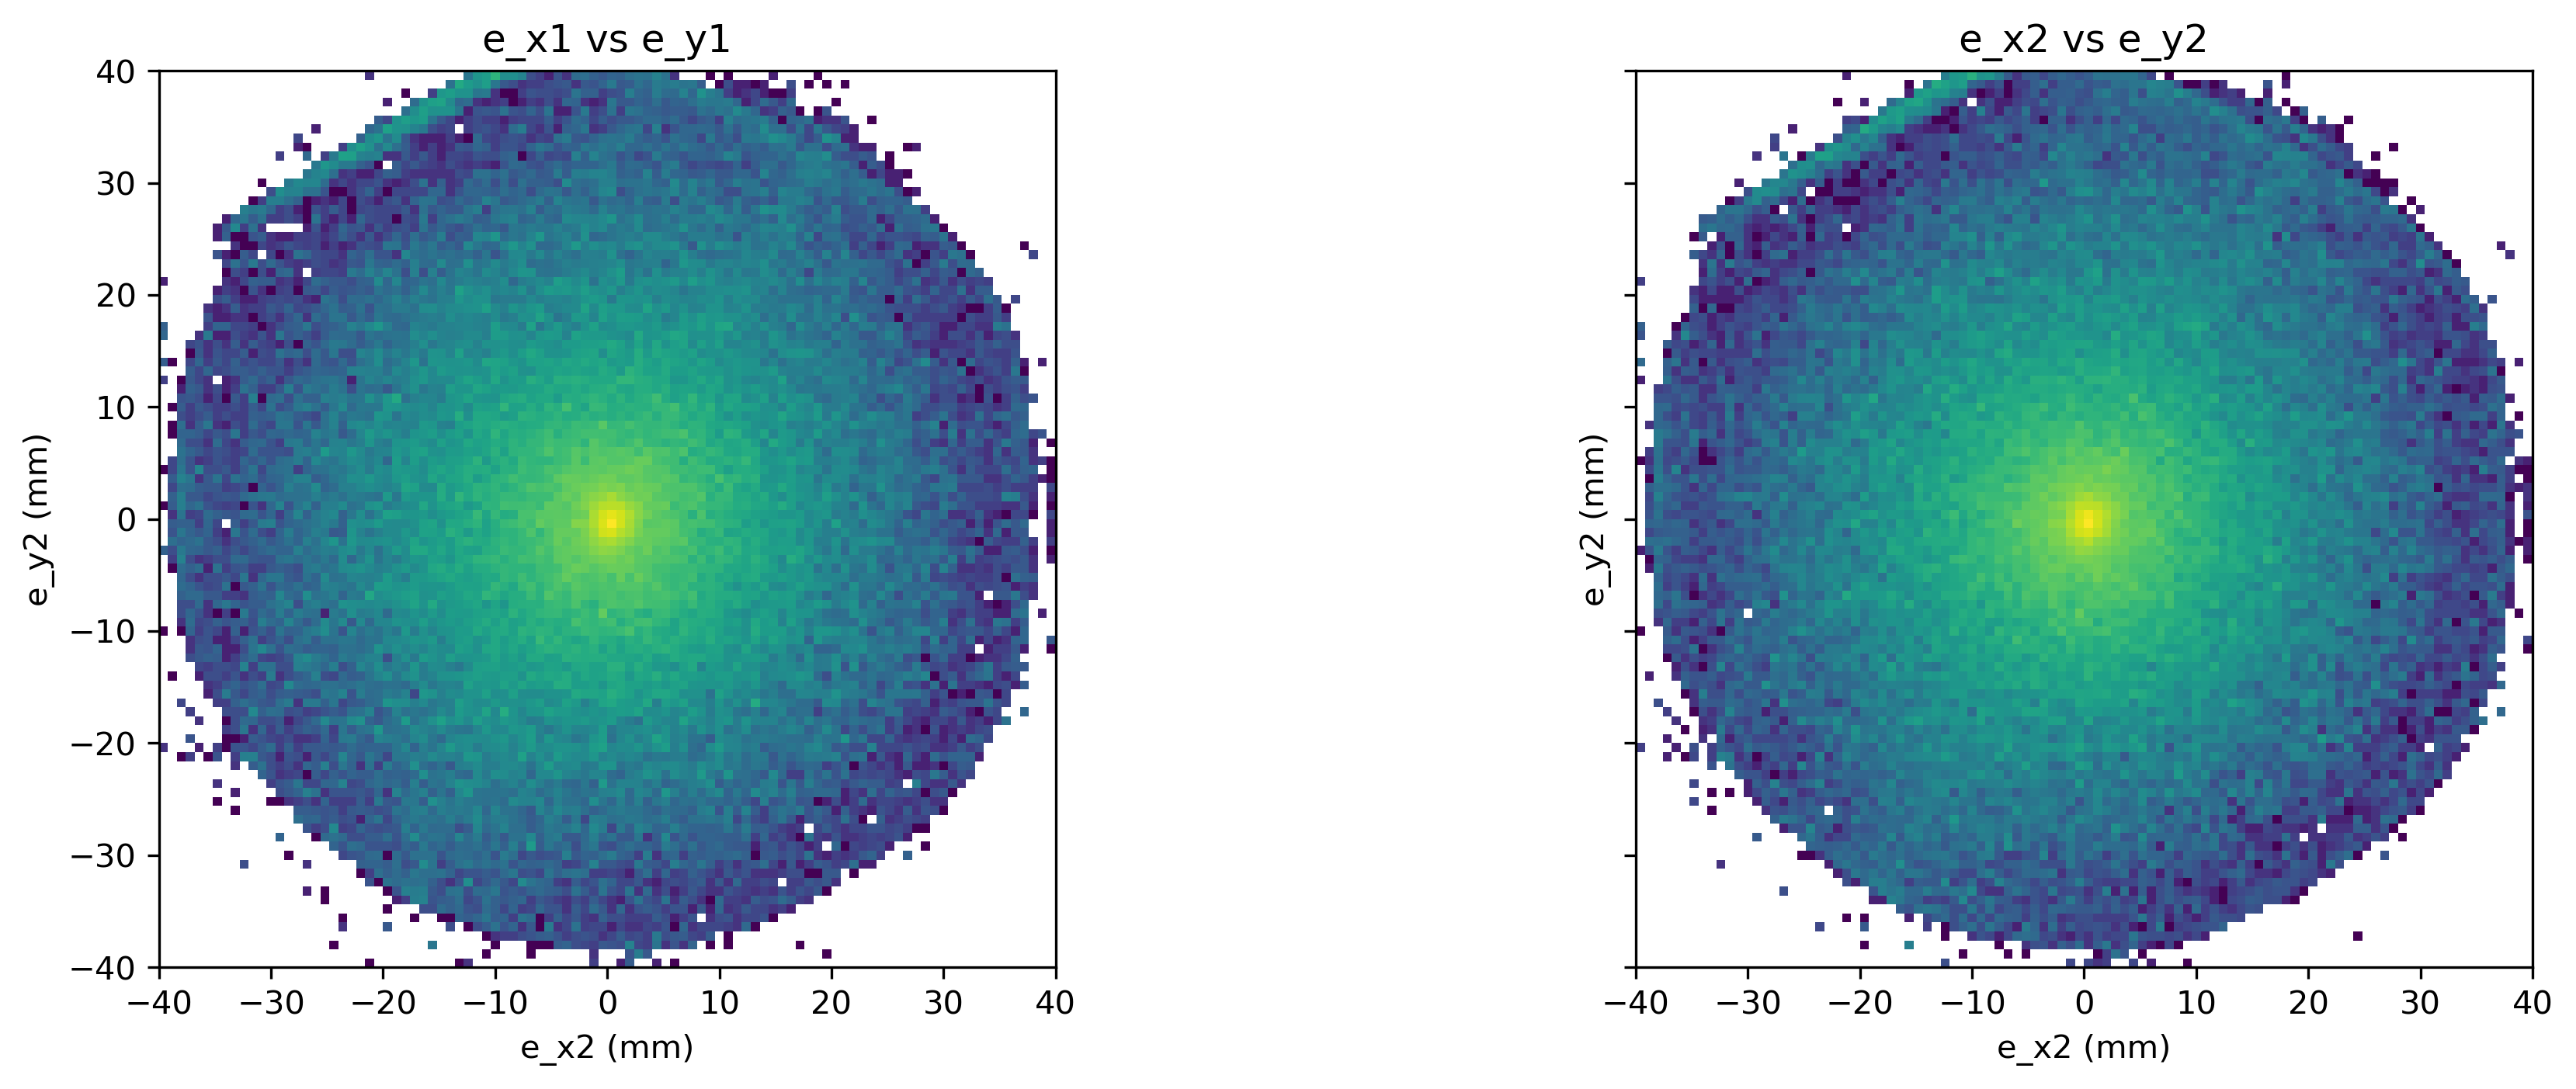

In [733]:
# Determine the data range
x_range = (-40, 40)
y_range = (-40, 40)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e1x, e1y, bins=(100, 100), range=[x_range, y_range], norm=LogNorm());
axs[0].set_aspect('equal');
axs[0].set_title('e_x1 vs e_y1');
axs[0].set_xlabel('e_x2 (mm)');
axs[0].set_ylabel('e_y2 (mm)');


hist2 = axs[1].hist2d(e2x, e2y, bins=(100, 100), range=[x_range, y_range], norm=LogNorm());
axs[1].set_aspect('equal');
axs[1].set_title('e_x2 vs e_y2');
axs[1].set_xlabel('e_x2 (mm)');
axs[1].set_ylabel('e_y2 (mm)');

In [734]:
#3213  6421
#2800 5620
#4640 4840
#3472  6047


def polynomial_through_points(points, degree):
    """
    Calculate the coefficients of the polynomial that best fits the given points.
    
    Args:
    - points: A list of tuples (x, y) representing the coordinates of the points.
    - degree: The degree of the polynomial to fit.
    
    Returns:
    - A numpy array containing the coefficients of the polynomial.
    """
    x_values = [p[0] for p in points]
    y_values = [p[1] for p in points]
    
    coefficients = np.polyfit(x_values, y_values, degree)
    
    return coefficients

# Example usage:
# Define some points (x, y)
points = [ (2800, 5620), (3213, 6421), (3472, 6047), (4640, 4840)]

# Degree of the polynomial
degree = 50

# Get the polynomial coefficients
coefficients = polynomial_through_points(points, degree)
print("Polynomial coefficients:", coefficients)

Polynomial coefficients: [-0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  2.17779758e-151  1.00996478e-147  4.68295769e-144  2.17087797e-140
  1.00605085e-136  4.66049259e-133  2.15782254e-129  9.98386398e-126
  4.61513421e-122  2.13081448e-118  9.82232788e-115  4.51822318e-111
  2.07256576e-107  9.47192200e-104  4.30743141e-100  1.94585726e-096
  8.71136467e-093  3.85186222e-089  1.67371264e-085  7.09109523e-082
  2.89110150e-078  1.10675918e-074  3.76452979e-071  9.52443389e-068
 -1.39750384e-065 -2.65200306e-060 -2.67831253e-056 -2.03889254e-052
 -1.37414916e-048 -8.61029872e-045 -5.11354110e-041 -2.89841217e-037
 -1.56707409e-033 -8.02055740e-030 -3.81765200e-026 -1.62641119e-022
 -5.62718563e-019 -1.03280627e-015  5.15048555e-012  6.88821313e-008
  4.03619541e-004  1.19512290e+000 -1.73014374e+003]


C:\Users\James\AppData\Local\Temp\ipykernel_32988\952375325.py:33: RankWarning: Polyfit may be poorly conditioned
  coefficients = polynomial_through_points(points, degree)


[3000.         3017.67676768 3035.35353535 3053.03030303 3070.70707071
 3088.38383838 3106.06060606 3123.73737374 3141.41414141 3159.09090909
 3176.76767677 3194.44444444 3212.12121212 3229.7979798  3247.47474747
 3265.15151515 3282.82828283 3300.50505051 3318.18181818 3335.85858586
 3353.53535354 3371.21212121 3388.88888889 3406.56565657 3424.24242424
 3441.91919192 3459.5959596  3477.27272727 3494.94949495 3512.62626263
 3530.3030303  3547.97979798 3565.65656566 3583.33333333 3601.01010101
 3618.68686869 3636.36363636 3654.04040404 3671.71717172 3689.39393939
 3707.07070707 3724.74747475 3742.42424242 3760.1010101  3777.77777778
 3795.45454545 3813.13131313 3830.80808081 3848.48484848 3866.16161616
 3883.83838384 3901.51515152 3919.19191919 3936.86868687 3954.54545455
 3972.22222222 3989.8989899  4007.57575758 4025.25252525 4042.92929293
 4060.60606061 4078.28282828 4095.95959596 4113.63636364 4131.31313131
 4148.98989899 4166.66666667 4184.34343434 4202.02020202 4219.6969697
 4237.3

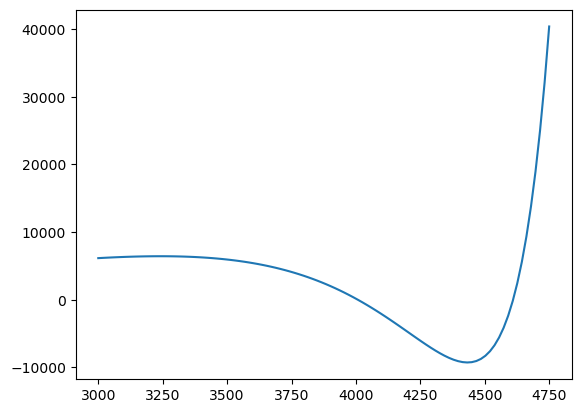

In [753]:

xrange = (3000, 4750, 100)  # Start, stop, num_points
x_values = np.linspace(xrange[0], xrange[1], xrange[2])
y_values = np.polyval(coefficients, x_values)
plt.plot(x_values, y_values, label='Polynomial')

print(x_values)
print(y_values)

## Add in a filter to the data on the peaks we are interested in

In [754]:

e1tof_filter = (e1tof > e1tof_left_edge) & (e1tof < e1tof_right_edge)
r1tof_filter = (r1tof > r1tof_left_edge) & (r1tof < r1tof_right_edge)
e2tof_filter = (e2tof > e2tof_left_edge) & (e2tof < e2tof_right_edge)
r2tof_filter = (r2tof > r2tof_left_edge) & (r2tof < r2tof_right_edge)

banana_sum_filter = ((r1tof+r2tof) > (7600)) & ((r1tof+r2tof) < (7800))
banana_diff_filter = ((r2tof-r1tof) > (5000)) & ((r2tof-r1tof) < (6200))


r1loc_filter = (r1x > r1x_left_edge) & (r1x < r1x_right_edge) & (r1y > r1y_left_edge) & (r1y < r1y_right_edge) 
r2loc_filter = (r2x > r2x_left_edge) & (r2x < r2x_right_edge) & (r2y > r2y_left_edge) & (r2y < r2y_right_edge) 


if symmetrize_ion:
    r1r2_filter = True
else:
    r1r2_filter = r2tof>r1tof
    
if number_of_fragment == 1:
    keep_filter = e1tof_filter & r1tof_filter & r1loc_filter
else:
    keep_filter = e1tof_filter & r1tof_filter & e2tof_filter & r2tof_filter & r1r2_filter & r1loc_filter & r2loc_filter & banana_sum_filter & banana_diff_filter


final_filter = keep_filter #& ~delete_filter
#final_filter = e1tof_filter & r1tof_filter

e1tof_filtered = e1tof[final_filter]
e1x_filtered = e1x[final_filter]
e1y_filtered = e1y[final_filter]
e2tof_filtered = e2tof[final_filter]
e2x_filtered = e2x[final_filter]
e2y_filtered = e2y[final_filter]
r1tof_filtered = r1tof[final_filter]
r1x_filtered = r1x[final_filter]
r1y_filtered = r1y[final_filter]
r2tof_filtered = r2tof[final_filter]
r2x_filtered = r2x[final_filter]
r2y_filtered = r2y[final_filter]


print(len(r2y_filtered))
print(final_filter)

52508
[False False False ...  True False False]


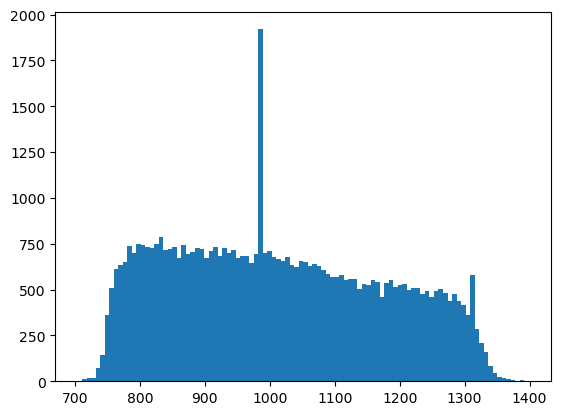

In [755]:
plt.hist(r1tof_filtered, bins=100);

[False False False ... False False False]


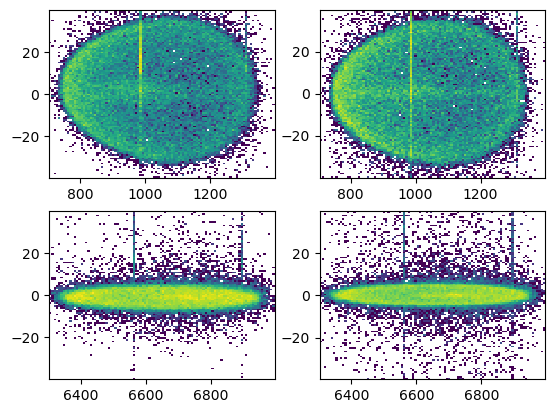

In [756]:
plt.subplot(2,2,1)
plt.hist2d(r1tof_filtered, r1x_filtered, bins=(100,100), norm=LogNorm());

plt.subplot(2,2,2)
plt.hist2d(r1tof_filtered, r1y_filtered, bins=(100,100), norm=LogNorm());

plt.subplot(2,2,3)
plt.hist2d(r2tof_filtered, r2x_filtered, bins=(100,100), norm=LogNorm());

plt.subplot(2,2,4)
plt.hist2d(r2tof_filtered, r2y_filtered, bins=(100,100), norm=LogNorm());

test = r1tof_filtered == r2tof_filtered
print(test)

In [757]:
#############
### HIT 1 ###
#############
e_TOF_0 = e1tof_filtered
e_x_0 = e1x_filtered
e_y_0 = e1y_filtered
i_TOF_0 = r1tof_filtered
i_x_0 = r1x_filtered
i_y_0 = r1y_filtered

###################################################################################
### applying rotation matrix by pi/2 to ion (x,y) hits to get detector oriented ###
###################################################################################
rot_ang = 0*np.pi/180
i_x0 = i_x_0*np.cos(rot_ang) - i_y_0*np.sin(rot_ang)
i_y0 = i_x_0*np.sin(rot_ang) + i_y_0*np.cos(rot_ang)

########################################################################################
### applying rotation matrix by pi/3 to electron (x,y) hits to get detector oriented ###
########################################################################################
#elec_det_theta = np.pi/3
elec_det_theta = 0
e_x0 = e_x_0*np.cos(elec_det_theta) - e_y_0*np.sin(elec_det_theta)
e_y0 = e_x_0*np.sin(elec_det_theta) + e_y_0*np.cos(elec_det_theta)

print(len(e_TOF_0))
print(len(e_x_0))

52508
52508


In [758]:
#############
### HIT 2 ###
#############
e_TOF_1 = e2tof_filtered
e_x_1 = e2x_filtered
e_y_1 = e2y_filtered
i_TOF_1 = r2tof_filtered
i_x_1 = r2x_filtered
i_y_1 = r2y_filtered

###################################################################################
### applying rotation matrix by pi/2 to ion (x,y) hits to get detector oriented ###
###################################################################################
i_x1 = i_x_1*np.cos(rot_ang) - i_y_1*np.sin(rot_ang)
i_y1 = i_x_1*np.sin(rot_ang) + i_y_1*np.cos(rot_ang)

########################################################################################
### applying rotation matrix by pi/3 to electron (x,y) hits to get detector oriented ###
########################################################################################
# elec_det_theta = np.pi/3
e_x1 = e_x_1*np.cos(elec_det_theta) - e_y_1*np.sin(elec_det_theta)
e_y1 = e_x_1*np.sin(elec_det_theta) + e_y_1*np.cos(elec_det_theta)

In [759]:
##########################################################
### apply TOF shift to electrons and ions if necessary ###
##########################################################
TOF_shift = -0

e_TOF0 = e_TOF_0 + TOF_shift
i_TOF0 = i_TOF_0 + TOF_shift

e_TOF1 = e_TOF_1 + TOF_shift
i_TOF1 = i_TOF_1 + TOF_shift

print(len(e_TOF_0))
print(len(e_x0))

52508
52508


694.4503908497187


C:\Users\James\AppData\Local\Temp\ipykernel_32988\4200516152.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


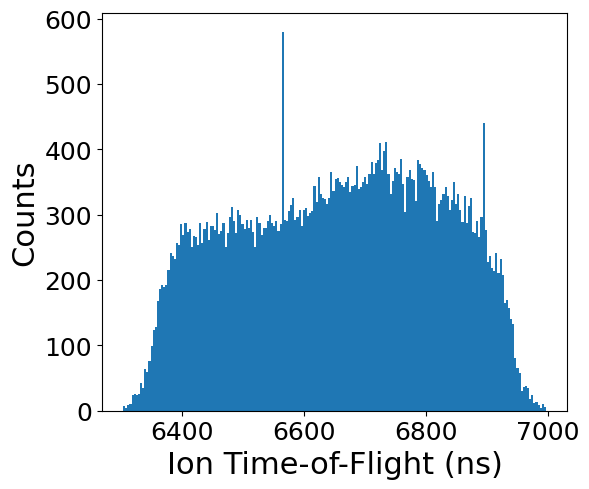

In [760]:
##################################
### make histogram of ion TOFs ###
##################################
fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.hist(i_TOF1,bins=200,histtype='stepfilled')
ax.set_xlabel('Ion Time-of-Flight (ns)',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Counts',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.tick_params(labelsize=18)
fig.tight_layout()
fig.show()

print(np.amax(i_TOF0)-np.amin(i_TOF0)) #difference in max and min TOF

693.8380347605989


C:\Users\James\AppData\Local\Temp\ipykernel_32988\2797840581.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


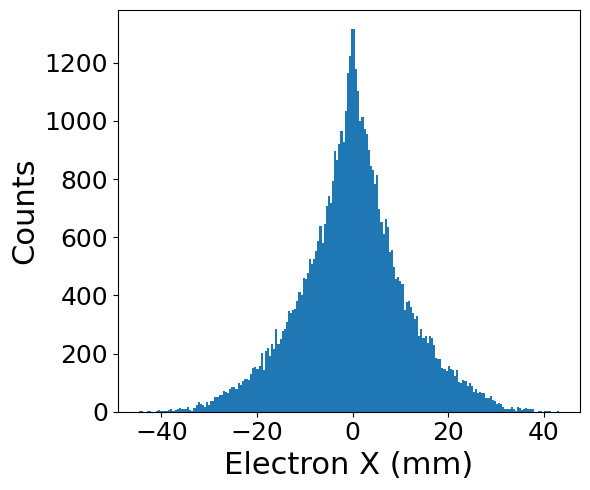

In [761]:
##################################
### make histogram of ion TOFs ###
##################################
fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.hist(e_x0,bins=200,histtype='stepfilled')
ax.set_xlabel('Electron X (mm)',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Counts',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.tick_params(labelsize=18)
fig.tight_layout()
fig.show()

print(np.amax(i_TOF1)-np.amin(i_TOF1)) #difference in max and min TOF

### PIPICO

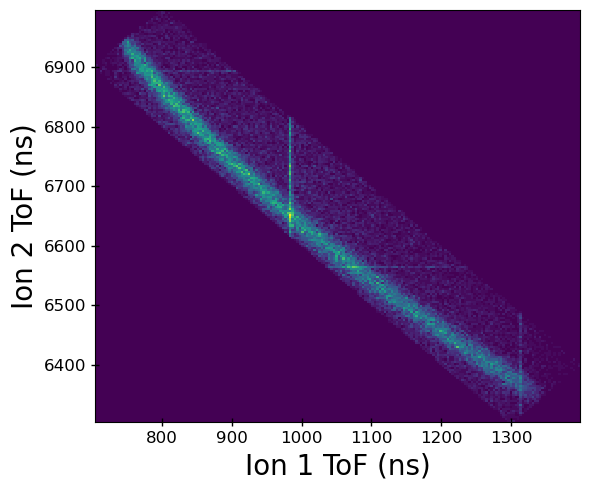

In [762]:
#%matplotlib.
fig, ax = plt.subplots(1,1,figsize=(6,5))

plt.hist2d(i_TOF0, i_TOF1, bins = (200,200));#, cmap='hsv');
ax.set_xlabel('Ion 1 ToF (ns)',fontsize=20,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Ion 2 ToF (ns)',fontsize=20,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the font size of major tick labels
ax.tick_params(axis='both', which='minor', labelsize=10)  # Adjust the font size of minor tick labels
ax.tick_params(direction='inout', length=6, width=1, colors='black', grid_color='r', grid_alpha=0.5)

fig.tight_layout()
#fig.show()

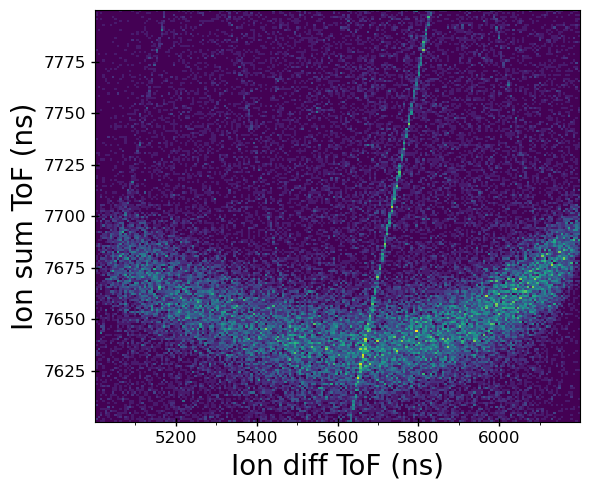

In [763]:
fig, ax = plt.subplots(1,1,figsize=(6,5))

plt.hist2d(i_TOF1-i_TOF0, i_TOF1+i_TOF0, bins = (200,200));#, cmap='hsv');
ax.set_xlabel('Ion diff ToF (ns)',fontsize=20,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Ion sum ToF (ns)',fontsize=20,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the font size of major tick labels
ax.tick_params(axis='both', which='minor', labelsize=10)  # Adjust the font size of minor tick labels
ax.tick_params(direction='inout', length=6, width=1, colors='black', grid_color='r', grid_alpha=0.5)

fig.tight_layout()
#fig.show()

## Fit the TOF Data

In [764]:
#############################################
### fit ion TOFs with normal distribution ###
#############################################
(mu_iTOF0, sigma_iTOF0) = norm.fit(i_TOF0)
i_TOF_fit0 = mu_iTOF0
print("Center of First Ion")
print(i_TOF_fit0)

(mu_iTOF1, sigma_iTOF1) = norm.fit(i_TOF1)
i_TOF_fit1 = mu_iTOF1
print("Center of Second Ion")
print(i_TOF_fit1)

print("Center of Total Ion")
print((i_TOF_fit0+i_TOF_fit1)/2)

Center of First Ion
1013.0875543120396
Center of Second Ion
6655.709864539998
Center of Total Ion
3834.398709426019


-0.0202887529771268
0.1390584427930809


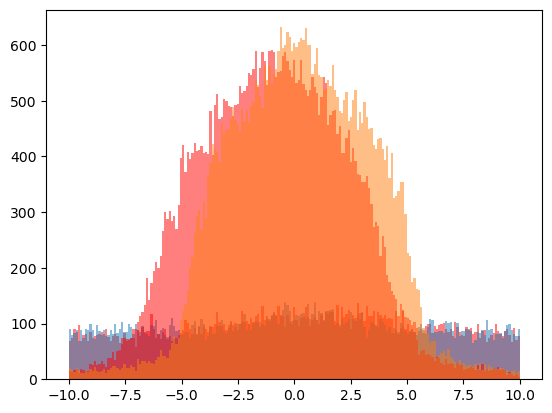

In [765]:
####################################
### histogram of ion x positions ###
####################################
ix_hist0 = plt.hist(i_x0,bins=np.linspace(-10,10,200),color='r', alpha=0.5)
ix_pairs0 = list(zip(*ix_hist0[0:2]))
i_x_offset0 = max(ix_pairs0)[1]

####################################
### histogram of ion y positions ###
####################################
iy_hist0 = plt.hist(i_y0,bins=np.linspace(-10,10,200),alpha=0.5)
iy_pairs0 = list(zip(*iy_hist0[0:2]))
i_y_offset0 = max(iy_pairs0)[1]

#####################################
### fitting electron1 x positions ###
#####################################
(mu_ex0, sigma_ex0) = norm.fit(e_x0)
e_x_offset0 = mu_ex0

#####################################
### fitting electron1 y positions ###
#####################################
(mu_ey0, sigma_ey0) = norm.fit(e_y0)
e_y_offset0 = mu_ey0

####################################
### histogram of ion x positions ###
####################################
ix_hist1 = plt.hist(i_x1,bins=np.linspace(-10,10,200),color='r',alpha=0.5)
ix_pairs1 = list(zip(*ix_hist1[0:2]))
i_x_offset1 = max(ix_pairs1)[1]

####################################
### histogram of ion y positions ###
####################################
iy_hist1 = plt.hist(i_y1,bins=np.linspace(-10,10,200),alpha=0.5)
iy_pairs1 = list(zip(*iy_hist1[0:2]))
i_y_offset1 = max(iy_pairs1)[1]

#####################################
### fitting electron2 x positions ###
#####################################
(mu_ex1, sigma_ex1) = norm.fit(e_x1)
e_x_offset1 = mu_ex1

#####################################
### fitting electron2 y positions ###
#####################################
(mu_ey1, sigma_ey1) = norm.fit(e_y1)
e_y_offset1 = mu_ey1

print(mu_ex0)
print(mu_ey0)

In [766]:
############################################################
### offset ion (x,y) hit positions to center on detector ###
############################################################
i_x0 = i_x0 - i_x_offset0
i_y0 = i_y0 - i_y_offset0

i_x1 = i_x1 - i_x_offset1
i_y1 = i_y1 - i_y_offset1

###################################################################
#### offset electron (x,y) hit positions to center on detector ####
## not always necessary and can be checked to see if beneficial ###
###################################################################
#e_x = e_x - mu_ex
#e_y = e_y - mu_ey

## Ion Fish

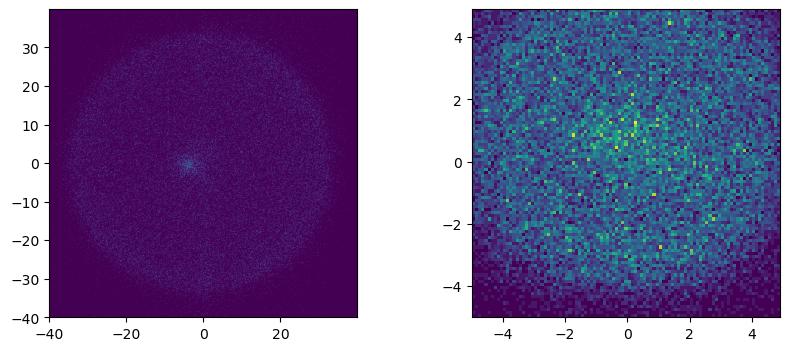

In [767]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

###########################
##### ion (x,y) hit 1 #####
###########################
pos_ix_edges = np.arange(-40,40,0.1)
pos_iy_edges = np.arange(-40,40,0.1)
H_i_pos0, ix_edges, iy_edges = np.histogram2d(i_x0,i_y0,bins=(pos_ix_edges,pos_iy_edges))
H_i_pos0 = H_i_pos0.T

ax1.imshow(H_i_pos0, origin='lower', extent=[pos_ix_edges[0], pos_ix_edges[-1], pos_iy_edges[0], pos_iy_edges[-1]],cmap='viridis')

###########################
##### ion (x,y) hit 2 #####
###########################
pos_ix_edges = np.arange(-5,5,0.1)
pos_iy_edges = np.arange(-5,5,0.1)
H_i_pos1, ix_edges, iy_edges = np.histogram2d(i_x1,i_y1,bins=(pos_ix_edges,pos_iy_edges))
H_i_pos1 = H_i_pos1.T

ax2.imshow(H_i_pos1, origin='lower', extent=[pos_ix_edges[0], pos_ix_edges[-1], pos_iy_edges[0], pos_iy_edges[-1]],cmap='viridis')

## Electron Fish

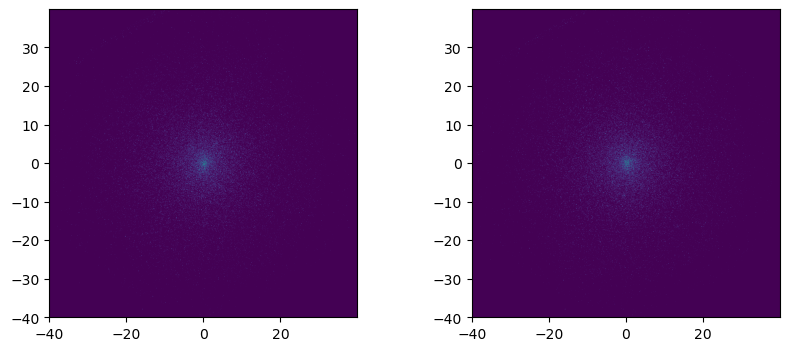

In [768]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

###########################
##### ion (x,y) hit 1 #####
###########################
pos_ix_edges = np.arange(-40,40,0.1)
pos_iy_edges = np.arange(-40,40,0.1)
H_i_pos0, ix_edges, iy_edges = np.histogram2d(e_x_0,e_y_0,bins=(pos_ix_edges,pos_iy_edges))
H_i_pos0 = H_i_pos0.T

ax1.imshow(H_i_pos0, origin='lower', extent=[pos_ix_edges[0], pos_ix_edges[-1], pos_iy_edges[0], pos_iy_edges[-1]],cmap='viridis')

###########################
##### ion (x,y) hit 2 #####
###########################
pos_ix_edges = np.arange(-40,40,0.1)
pos_iy_edges = np.arange(-40,40,0.1)
H_i_pos1, ix_edges, iy_edges = np.histogram2d(e_x1,e_y1,bins=(pos_ix_edges,pos_iy_edges))
H_i_pos1 = H_i_pos1.T

ax2.imshow(H_i_pos1, origin='lower', extent=[pos_ix_edges[0], pos_ix_edges[-1], pos_iy_edges[0], pos_iy_edges[-1]],cmap='viridis')

694.4503908497187


C:\Users\James\AppData\Local\Temp\ipykernel_32988\267293293.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


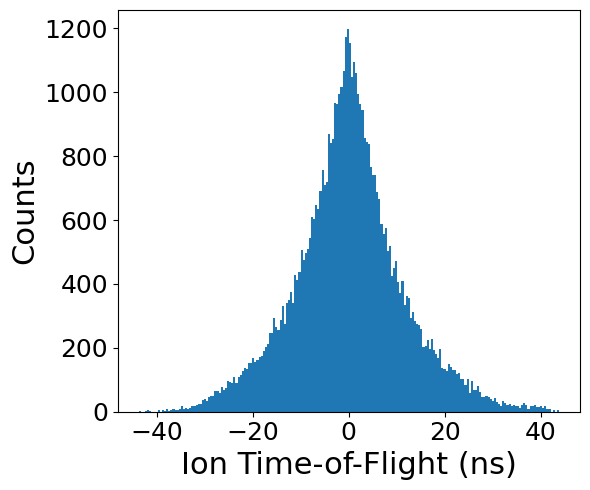

In [769]:
##################################
### make histogram of ion TOFs ###
##################################
fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.hist(e_y0,bins=200,histtype='stepfilled')
ax.set_xlabel('Ion Time-of-Flight (ns)',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Counts',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.tick_params(labelsize=18)
fig.tight_layout()
fig.show()

print(np.amax(i_TOF0)-np.amin(i_TOF0)) #difference in max and min TOF

In [770]:
len(e_TOF0)
#len(e_x0)

52508

C:\Users\James\AppData\Local\Temp\ipykernel_32988\1951256451.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


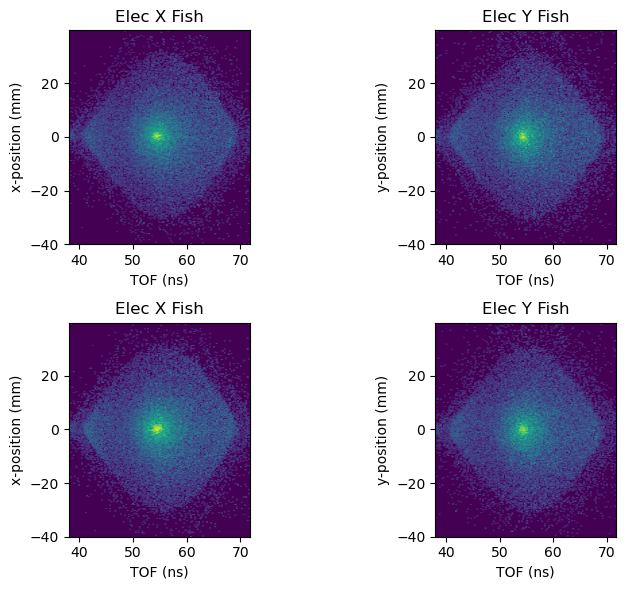

In [771]:
#############################
########### hit 1 ###########
###### 'electron fish' ######
#### (TOF,x) and (TOF,y) ####
#############################
fig, axs = plt.subplots(2,2,figsize=(8,6))

eTOF_edges = np.arange(e1tof_left_edge, e1tof_right_edge,0.25)
ex_edges = np.arange(-40,40,0.25)
ey_edges = np.arange(-40,40,0.25)

H_ex_fish, eTOF_edges, exfish_edges = np.histogram2d(e_TOF0,e_x0,bins=(eTOF_edges,ex_edges))
H_ex_fish = H_ex_fish.T

H_ey_fish, eTOF_edges, eyfish_edges = np.histogram2d(e_TOF0,e_y0,bins=(eTOF_edges,ey_edges))
H_ey_fish = H_ey_fish.T

axs[0,0].imshow(H_ex_fish, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], exfish_edges[0], exfish_edges[-1]],aspect=1/2,cmap='viridis',norm=PowerNorm(gamma=1/2))
axs[0,0].set_title('Elec X Fish')
axs[0,0].set_xlabel('TOF (ns)')
axs[0,0].set_ylabel('x-position (mm)')
axs[0,1].imshow(H_ey_fish, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], eyfish_edges[0], eyfish_edges[-1]],aspect=1/2,cmap='viridis',norm=PowerNorm(gamma=1/2))
axs[0,1].set_title('Elec Y Fish')
axs[0,1].set_xlabel('TOF (ns)')
axs[0,1].set_ylabel('y-position (mm)')


H_ex_fish, eTOF_edges, exfish_edges = np.histogram2d(e_TOF1,e_x1,bins=(eTOF_edges,ex_edges))
H_ex_fish = H_ex_fish.T

H_ey_fish, eTOF_edges, eyfish_edges = np.histogram2d(e_TOF1,e_y1,bins=(eTOF_edges,ey_edges))
H_ey_fish = H_ey_fish.T

axs[1,0].imshow(H_ex_fish, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], exfish_edges[0], exfish_edges[-1]],aspect=25/50,cmap='viridis',norm=PowerNorm(gamma=1/2))
axs[1,0].set_title('Elec X Fish')
axs[1,0].set_xlabel('TOF (ns)')
axs[1,0].set_ylabel('x-position (mm)')
axs[1,1].imshow(H_ey_fish, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], eyfish_edges[0], eyfish_edges[-1]],aspect=25/50,cmap='viridis',norm=PowerNorm(gamma=1/2))
axs[1,1].set_title('Elec Y Fish')
axs[1,1].set_xlabel('TOF (ns)')
axs[1,1].set_ylabel('y-position (mm)')

fig.tight_layout()
fig.show()

C:\Users\James\AppData\Local\Temp\ipykernel_32988\1807431393.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


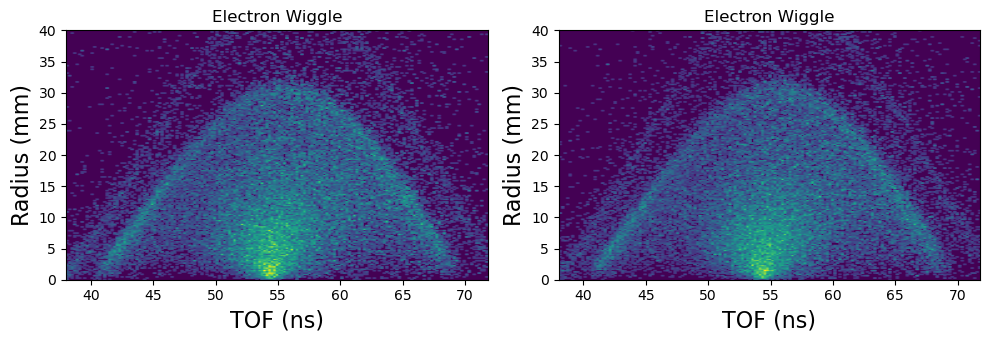

In [772]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

###############################
############ hit 1 ############
###### 'electron wiggle' ######
########### (TOF,r) ###########
###############################

### compute radius for (x,y) hit position ###
e_rad0 = np.sqrt(e_x0**2 + e_y0**2)

eTOF_edges = np.arange(e1tof_left_edge,e1tof_right_edge,0.2)
ewiggle_edges = np.arange(0,40.2,0.2)

H_e0_wiggle0, eTOF_edges, ewiggle_edges = np.histogram2d(e_TOF0,e_rad0,bins=(eTOF_edges,ewiggle_edges))
H_e0_wiggle0 = H_e0_wiggle0.T

ax1.imshow(H_e0_wiggle0, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], ewiggle_edges[0], ewiggle_edges[-1]],aspect=20/40,cmap='viridis',norm=PowerNorm(gamma=1/2))
ax1.set_title('Electron Wiggle')
ax1.set_xlabel('TOF (ns)', fontsize=16)
ax1.set_ylabel('Radius (mm)', fontsize=16)

###############################
############ hit 2 ############
###### 'electron wiggle' ######
########### (TOF,r) ###########
###############################

### compute radius for (x,y) hit position ###
e_rad1 = np.sqrt(e_x1**2 + e_y1**2)

eTOF_edges = np.arange(e1tof_left_edge,e1tof_right_edge,0.2)
ewiggle_edges = np.arange(0,40.2,0.2)

H_e0_wiggle1, eTOF_edges, ewiggle_edges = np.histogram2d(e_TOF1,e_rad1,bins=(eTOF_edges,ewiggle_edges))
H_e0_wiggle1 = H_e0_wiggle1.T

ax2.imshow(H_e0_wiggle1, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], ewiggle_edges[0], ewiggle_edges[-1]],aspect=20/40,cmap='viridis',norm=PowerNorm(gamma=1/2))
ax2.set_title('Electron Wiggle')
ax2.set_xlabel('TOF (ns)', fontsize=16)
ax2.set_ylabel('Radius (mm)', fontsize=16)

fig.tight_layout()
fig.show()

In [773]:
##############################################################
##### correct electron hit 1 E x B drift in spectrometer #####
########## apply same correction to electron hit 2 ###########
##############################################################
wiggles_tof_ex = [38, 72, 1.0, 1.0] #node positions in TOF is what changes
wiggles_tof_ey = [38, 72, 0.0, -1.0]

ex_corr = np.polyfit(wiggles_tof_ex[0:2], wiggles_tof_ex[2:], 1)
px = np.poly1d(ex_corr)
ey_corr = np.polyfit(wiggles_tof_ey[0:2], wiggles_tof_ey[2:], 1)
py = np.poly1d(ey_corr)

e_x0 = e_x0 - px(e_TOF0)
e_y0 = e_y0 - py(e_TOF0)

e_x1 = e_x1 - px(e_TOF1)
e_y1 = e_y1 - py(e_TOF1)

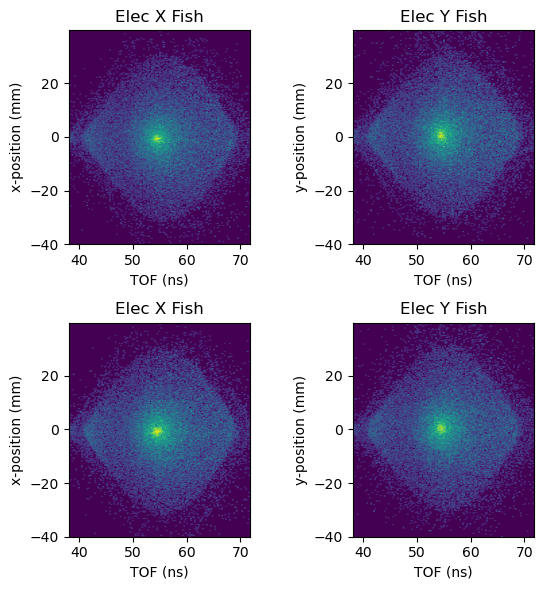

In [774]:
###############################
### corrected electron fish ###
###############################
fig, axs = plt.subplots(2,2,figsize=(6,6), dpi=100)

#### Hit 1 ####
eTOF_edges = np.arange(e1tof_left_edge,e1tof_right_edge,0.25)
#eTOF_edges = np.arange(42,68,0.25)

ex_edges = np.arange(-40,40,0.25)
ey_edges = np.arange(-40,40,0.25)

H_ex_fish, eTOF_edges, exfish_edges = np.histogram2d(e_TOF0,e_x0,bins=(eTOF_edges,ex_edges))
H_ex_fish = H_ex_fish.T

H_ey_fish, eTOF_edges, eyfish_edges = np.histogram2d(e_TOF0,e_y0,bins=(eTOF_edges,ey_edges))
H_ey_fish = H_ey_fish.T

axs[0,0].imshow(H_ex_fish, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], exfish_edges[0], exfish_edges[-1]],aspect=1/2,cmap='viridis',norm=PowerNorm(gamma=1/2))
axs[0,0].set_title('Elec X Fish')
axs[0,0].set_xlabel('TOF (ns)')
axs[0,0].set_ylabel('x-position (mm)')
axs[0,1].imshow(H_ey_fish, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], eyfish_edges[0], eyfish_edges[-1]],aspect=1/2,cmap='viridis',norm=PowerNorm(gamma=1/2))
axs[0,1].set_title('Elec Y Fish')
axs[0,1].set_xlabel('TOF (ns)')
axs[0,1].set_ylabel('y-position (mm)')

### Hit 2 ####
H_ex_fish, eTOF_edges, exfish_edges = np.histogram2d(e_TOF1,e_x1,bins=(eTOF_edges,ex_edges))
H_ex_fish = H_ex_fish.T

H_ey_fish, eTOF_edges, eyfish_edges = np.histogram2d(e_TOF1,e_y1,bins=(eTOF_edges,ey_edges))
H_ey_fish = H_ey_fish.T

axs[1,0].imshow(H_ex_fish, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], exfish_edges[0], exfish_edges[-1]],aspect=1/2,cmap='viridis',norm=PowerNorm(gamma=1/2))
axs[1,0].set_title('Elec X Fish')
axs[1,0].set_xlabel('TOF (ns)')
axs[1,0].set_ylabel('x-position (mm)')
axs[1,1].imshow(H_ey_fish, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], eyfish_edges[0], eyfish_edges[-1]],aspect=1/2,cmap='viridis',norm=PowerNorm(gamma=1/2))
axs[1,1].set_title('Elec Y Fish')
axs[1,1].set_xlabel('TOF (ns)')
axs[1,1].set_ylabel('y-position (mm)')

fig.tight_layout()
#fig.show()

C:\Users\James\AppData\Local\Temp\ipykernel_32988\2622207827.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


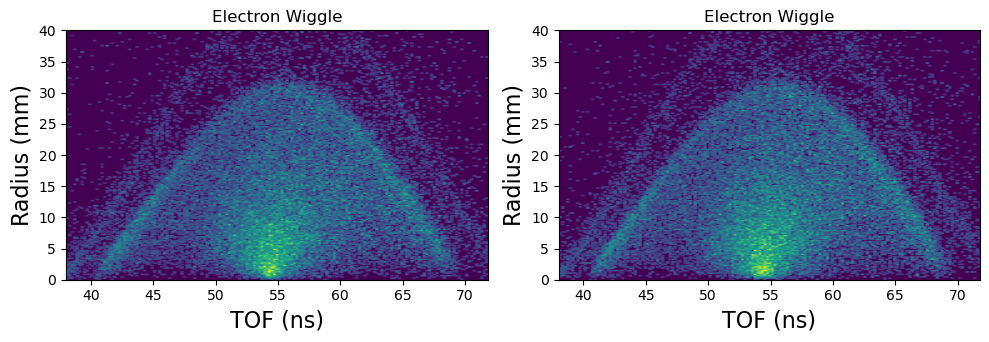

In [775]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

###############################
############ hit 1 ############
###### 'Corrected electron wiggle' ######
########### (TOF,r) ###########
###############################

### compute radius for (x,y) hit position ###
e_rad0 = np.sqrt(e_x0**2 + e_y0**2)

eTOF_edges = np.arange(e1tof_left_edge,e1tof_right_edge,0.2)
ewiggle_edges = np.arange(0,40.2,0.2)

H_e0_wiggle0, eTOF_edges, ewiggle_edges = np.histogram2d(e_TOF0,e_rad0,bins=(eTOF_edges,ewiggle_edges))
H_e0_wiggle0 = H_e0_wiggle0.T

ax1.imshow(H_e0_wiggle0, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], ewiggle_edges[0], ewiggle_edges[-1]],aspect=20/40,cmap='viridis',norm=PowerNorm(gamma=1/2))
ax1.set_title('Electron Wiggle')
ax1.set_xlabel('TOF (ns)', fontsize=16)
ax1.set_ylabel('Radius (mm)', fontsize=16)

###############################
############ hit 2 ############
###### 'Corrected electron wiggle' ######
########### (TOF,r) ###########
###############################

### compute radius for (x,y) hit position ###
e_rad1 = np.sqrt(e_x1**2 + e_y1**2)

eTOF_edges = np.arange(e1tof_left_edge,e1tof_right_edge,0.2)
ewiggle_edges = np.arange(0,40.2,0.2)

H_e0_wiggle1, eTOF_edges, ewiggle_edges = np.histogram2d(e_TOF1,e_rad1,bins=(eTOF_edges,ewiggle_edges))
H_e0_wiggle1 = H_e0_wiggle1.T

ax2.imshow(H_e0_wiggle1, origin='lower', extent=[eTOF_edges[0], eTOF_edges[-1], ewiggle_edges[0], ewiggle_edges[-1]],aspect=20/40,cmap='viridis',norm=PowerNorm(gamma=1/2))
ax2.set_title('Electron Wiggle')
ax2.set_xlabel('TOF (ns)', fontsize=16)
ax2.set_ylabel('Radius (mm)', fontsize=16)

fig.tight_layout()
fig.show()

## Ion Fish

C:\Users\James\AppData\Local\Temp\ipykernel_32988\563335114.py:12: RuntimeWarning: divide by zero encountered in log
  H_ix_fish = np.log(H_ix_fish.T)
C:\Users\James\AppData\Local\Temp\ipykernel_32988\563335114.py:15: RuntimeWarning: divide by zero encountered in log
  H_iy_fish = np.log(H_iy_fish.T)


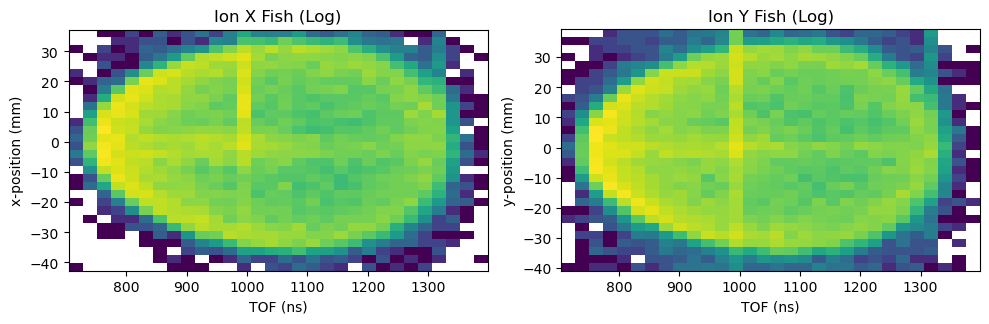

In [776]:
##########################
########## hit 1 #########
### corrected ion fish ###
##########################
fig1, (ax11, ax22) = plt.subplots(1, 2, figsize=(10, 10), dpi=100)  # Larger figure size

iTOF_edges = np.arange(r1tof_left_edge, r1tof_right_edge, 2.0)
ix_edges = np.arange(-30, 30, 0.1)
iy_edges = np.arange(-30, 30, 0.1)

H_ix_fish, iTOF_edges, ixfish_edges = np.histogram2d(i_TOF0, i_x0, bins=(30, 30))
H_ix_fish = np.log(H_ix_fish.T)

H_iy_fish, iTOF_edges, iyfish_edges = np.histogram2d(i_TOF0, i_y0, bins=(30, 30))
H_iy_fish = np.log(H_iy_fish.T)

ax11.imshow(H_ix_fish, origin='lower', extent=[iTOF_edges[0], iTOF_edges[-1], ixfish_edges[0], ixfish_edges[-1]], aspect=5/1, cmap='viridis')
ax11.set_title('Ion X Fish (Log)')
ax11.set_xlabel('TOF (ns)')
ax11.set_ylabel('x-position (mm)')

ax22.imshow(H_iy_fish, origin='lower', extent=[iTOF_edges[0], iTOF_edges[-1], iyfish_edges[0], iyfish_edges[-1]], aspect=5/1, cmap='viridis')
ax22.set_title('Ion Y Fish (Log)')
ax22.set_xlabel('TOF (ns)')
ax22.set_ylabel('y-position (mm)')

fig1.tight_layout()
plt.show()

C:\Users\James\AppData\Local\Temp\ipykernel_32988\1754790225.py:12: RuntimeWarning: divide by zero encountered in log
  H_ix_fish = np.log(H_ix_fish.T)
C:\Users\James\AppData\Local\Temp\ipykernel_32988\1754790225.py:15: RuntimeWarning: divide by zero encountered in log
  H_iy_fish = np.log(H_iy_fish.T)
C:\Users\James\AppData\Local\Temp\ipykernel_32988\1754790225.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


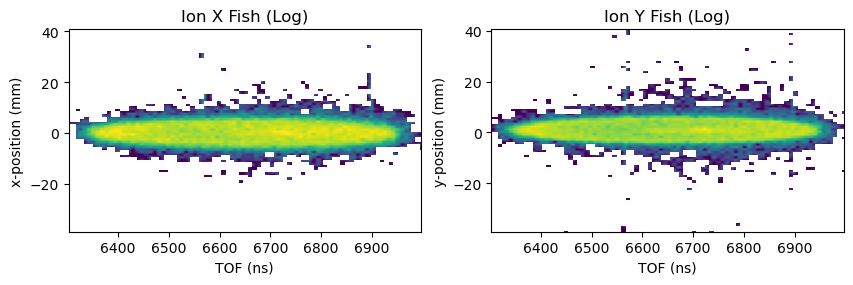

In [777]:
##########################
########## hit 2 #########
### corrected ion fish ###
##########################
fig1, (ax11, ax22) = plt.subplots(1,2,figsize=(10,10), dpi=100)

iTOF_edges = np.arange(r2tof_left_edge,r2tof_right_edge,2.0)
ix_edges = np.arange(-30,30,0.1)
iy_edges = np.arange(-30,30,0.1)

H_ix_fish, iTOF_edges, ixfish_edges = np.histogram2d(i_TOF1,i_x1,bins=(80,80))
H_ix_fish = np.log(H_ix_fish.T)

H_iy_fish, iTOF_edges, iyfish_edges = np.histogram2d(i_TOF1,i_y1,bins=(80,80))
H_iy_fish = np.log(H_iy_fish.T)

ax11.imshow(H_ix_fish, origin='lower', extent=[iTOF_edges[0], iTOF_edges[-1], ixfish_edges[0], ixfish_edges[-1]],aspect = 5/1,cmap='viridis')
ax11.set_title('Ion X Fish (Log)')
ax11.set_xlabel('TOF (ns)')
ax11.set_ylabel('x-position (mm)')
ax22.imshow(H_iy_fish, origin='lower', extent=[iTOF_edges[0], iTOF_edges[-1], iyfish_edges[0], iyfish_edges[-1]],aspect = 5/1,cmap='viridis')
ax22.set_title('Ion Y Fish (Log)')
ax22.set_xlabel('TOF (ns)')
ax22.set_ylabel('y-position (mm)')

#fig1.tight_layout()
fig1.show()

# Transforming from (x,y,TOF) to (px,py,pz)

### We now begin steps to convert from raw measured data to momentum distributions

## Functions

In [778]:
##############################################################
### function for computing particle velocity distributions ###
##############################################################

def NEW_v(acc_1, acc_2, acc_3, acc1_length, acc2_length, acc3_length, velo, tof):

    if acc_2 != 0.0 and  acc2_length != 0.0:
        a2_term = (-np.sqrt(2.0*acc_1*acc1_length + velo**2) + 
                   np.sqrt(2.0*acc_1*acc1_length + 2.0*acc_2*acc2_length + velo**2))/acc_2    
    elif acc2_length != 0.0 and acc_2 == 0.0:
        a2_term = acc2_length/np.sqrt(2*acc_1*acc1_length + velo**2)    
    else:
        a2_term = 0.0

    if acc_3 != 0.0 and  acc3_length != 0.0:
        a3_term = (-np.sqrt(2.0*acc_1*acc1_length + 2.0*acc_2*acc2_length + velo**2) + 
                   np.sqrt(2.0*acc_1*acc1_length + 2.0*acc_2*acc2_length + 2.0*acc_3*acc3_length + velo**2))/acc_3   
    elif acc3_length != 0.0 and acc_3 == 0.0:
        a3_term = acc3_length/np.sqrt(2*acc_1*acc1_length + 2*acc_2*acc2_length + velo**2)
    else:
        a3_term = 0.0

    t_function = -tof + (-velo + np.sqrt(2.0*acc_1*acc1_length + velo**2))/acc_1 + a2_term + a3_term 
    v1 = velo*(1.01)

    if acc_2 != 0.0 and  acc2_length != 0.0:
        a2_term = (-np.sqrt(2.0*acc_1*acc1_length + v1**2) + 
                   np.sqrt(2.0*acc_1*acc1_length + 2.0*acc_2*acc2_length + v1**2))/acc_2    
    elif acc2_length != 0.0 and acc_2 == 0.0:
        a2_term = acc2_length/np.sqrt(2*acc_1*acc1_length + v1**2)   
    else:
        a2_term = 0.0

    if acc_3 != 0.0 and  acc3_length != 0.0:
        a3_term = (-np.sqrt(2.0*acc_1*acc1_length + 2.0*acc_2*acc2_length + v1**2) + 
                   np.sqrt(2.0*acc_1*acc1_length + 2.0*acc_2*acc2_length + 2.0*acc_3*acc3_length + v1**2))/acc_3    
    elif acc3_length != 0. and acc_3 == 0.0:
        a3_term = acc3_length/np.sqrt(2*acc_1*acc1_length + 2*acc_2*acc2_length + v1**2) 
    else:
        a3_term = 0.0

    Dt_function_dv = ( (-tof + (-v1 + np.sqrt(2.0*acc_1*acc1_length + v1**2)) / acc_1 
                        + a2_term + a3_term) - t_function ) / (v1 - velo) 
    return velo - t_function / Dt_function_dv

In [779]:

def tof2mom_3accel(tof_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge_au, mass_amu):
    E_Field_au_over_si = 1.0 / 5.1421e11 #au * m / V
    length_au_over_m = 1.0 / 5.2917720859e-11 #au / m
    time_au_over_s = 1.0 / 2.418884326505e-17 #au / s
    AUmass_over_AMU = 1.660538782e-27 / 9.10938215e-31 #(au / kg) * (kg / amu)

    t = (tof_ns * 1e-9) * time_au_over_s
    mass = mass_amu * AUmass_over_AMU
    q = charge_au
    acc1_length = acc1mm * 0.001 * length_au_over_m
    acc2_length = acc2mm * 0.001 * length_au_over_m
    acc3_length = acc3mm * 0.001 * length_au_over_m
    Efield1_Vau = Efield1_Vpcm * 100.0 * E_Field_au_over_si
    Efield2_Vau = Efield2_Vpcm * 100.0 * E_Field_au_over_si
    Efield3_Vau = Efield3_Vpcm * 100.0 * E_Field_au_over_si

    acc1 = (Efield1_Vau * q) / mass
    acc2 = (Efield2_Vau * q) / mass
    acc3 = (Efield3_Vau * q) / mass

    acc1_temp = np.where(acc1 != 0, acc1, 0.001)
    acc2_temp = np.where(acc2 != 0, acc2, 0.001)
    acc3_temp = np.where(acc3 != 0, acc3, 0.001)

    v = np.sqrt(2.0) * np.sqrt(acc1_temp * acc1_length) - \
        (np.sqrt(2.0) * acc1_temp * np.sqrt(acc1_temp * acc1_length) / acc2_temp) + \
        (np.sqrt(2.0) * acc1_temp * np.sqrt(acc1_temp * acc1_length + acc2_temp * acc2_length) / acc2_temp) - \
        (np.sqrt(2.0) * acc1_temp * np.sqrt(acc1_temp * acc1_length + acc2_temp * acc2_length) / acc3_temp) + \
        (np.sqrt(2.0) * acc1_temp * np.sqrt(acc1_temp * acc1_length + acc2_temp * acc2_length + acc3_temp * acc3_length) / acc3_temp) - \
        acc1_temp * t

    for i in range(len(tof_ns)):
        new_v = 0.0
        shift_counter = 1
        for j in range(50):
            new_v = NEW_v(acc1, acc2, acc3, acc1_length, acc2_length, acc3_length, v[i], t[i])

            if np.isinf(new_v) == 1:
                new_v = v[i] * (1.0 + 2.0 ** shift_counter / 1000.0)
                shift_counter += 1
            else:
                shift_counter = 1

            if np.abs((new_v * mass - v[i] * mass) / (v[i] * mass)) < 1e-6:
                break

            v[i] = new_v

    p_z = v * mass
    return p_z


In [780]:
def calc_px(tof_ns, x_mm, y_mm, mass_amu, charge_au, BField_ns, BField_clockwise=True):
    MEKG = 9.10938356e-31  # kg
    COULOMB = 1.602176634e-19  # C
    MASSAU = 1.66053906660e-27  # kg
    time_au_over_s = 1.0 / 2.418884326505e-17 #au / s
    dist_au_over_m = 1.0 / 5.29177210903e-11 # au / m
    mass_au_over_amu = 1.660538782e-27 / 9.10938215e-31 #(au / kg) * (kg / amu)
 
    
    #convert all to a.u.
    tof_au = tof_ns * 1e-9 * time_au_over_s
    x_au = x_mm * 1e-3 * dist_au_over_m
    y_au = y_mm * 1e-3 * dist_au_over_m
    mass_au = mass_amu * mass_au_over_amu

    if mass_amu < 1.0:
        w, a, b = 0.0, 0.0, 0.0

        m = mass_amu * MASSAU * MEKG
        q = charge_au * COULOMB
        pau = m * 300e6 / 137.

        fieldB = 2. * m * 3.14152 / (q * BField_ns * 1e-9)

        if BField_clockwise:
            fieldB = -fieldB

        w = q / m * fieldB
        a = (1. - np.cos(w * tof_ns * 1e-9)) / w
        b = (np.sin(w * tof_ns * 1e-9)) / w

        px = m * (x_mm / 1000. * b + a * y_mm / 1000.) / (a * a + b * b)
        px = px / pau
    else:
        #vau = 2.1877e+6
        px = x_au / tof_au * mass_au

    return px


In [781]:
def calc_py(tof_ns, x_mm, y_mm, mass_amu, charge_au, BField_ns, BField_clockwise=True):
    MEKG = 9.10938356e-31  # kg
    COULOMB = 1.602176634e-19  # C
    MASSAU = 1.66053906660e-27  # kg
    time_au_over_s = 1.0 / 2.418884326505e-17 #au / s
    dist_au_over_m = 1.0 / 5.29177210903e-11 # au / m
    mass_au_over_amu = 1.660538782e-27 / 9.10938215e-31 #(au / kg) * (kg / amu)
 
    #convert all to a.u.
    tof_au = tof_ns * 1e-9 * time_au_over_s
    x_au = x_mm * 1e-3 * dist_au_over_m
    y_au = y_mm * 1e-3 * dist_au_over_m
    mass_au = mass_amu * mass_au_over_amu
    
    if mass_amu < 1.0:
        w, a, b = 0.0, 0.0, 0.0

        m = mass_amu * MASSAU * MEKG
        q = charge_au * COULOMB
        pau = m * 300e6 / 137.

        fieldB = 2. * m * 3.14152 / (q * BField_ns * 1e-9)

        if BField_clockwise:
            fieldB = -fieldB

        w = q / m * fieldB
        a = (1. - np.cos(w * tof_ns * 1e-9)) / w
        b = (np.sin(w * tof_ns * 1e-9)) / w

        py = m * (-x_mm / 1000. * a + b * y_mm / 1000.) / (a * a + b * b)

        py = py / pau
    else:
        py = y_au / tof_au * mass_au

    return py


In [782]:
def calc_pze(tof_ns, x_mm, y_mm, mass_amu, charge_au, para_a, para_b, para_c, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, BField_ns, BField_clockwise=True):
    px, py, pz, E1 = 0, 0, 0, 0

    if mass_amu < 1.:
        m = mass_amu * 1.66053906660e-27  # Convert mass from atomic mass units to kg
        q = -charge_au * 1.602176634e-19  # Convert charge from atomic units to coulombs
        pau = m * 300e6 / 137.036  # Atomic unit of momentum

        fieldB = 2. * m * np.pi / (q * BField_ns * 1e-9)

        if BField_clockwise:
            fieldB = -fieldB

        w = q / m * fieldB
        a = (1. - np.cos(w * tof_ns * 1.e-9)) / w
        b = (np.sin(w * tof_ns * 1.e-9)) / w

        px = m * (x_mm / 1000. * b + a * y_mm / 1000.) / (a**2 + b**2)
        px /= pau
        py = m * (-x_mm / 1000. * a + b * y_mm / 1000.) / (a**2 + b**2)
        py /= pau

        q = -charge_au
        m = mass_amu
        E1 = Efield1_Vpcm
        pz = -tof2mom_3accel(tof_ns, acc1mm, acc2mm, acc3mm, E1, Efield2_Vpcm, Efield3_Vpcm, q, m)
        
#         for i in range(50):
#             if np.abs(para_a - para_b * np.power(para_c, (px**2 + py**2 + pz**2) * pau**2 / (2 * m[:,0] * q)) - E1) > 1e-4:
#                 E1 = para_a - para_b * np.power(para_c, (px**2 + py**2 + pz**2) * pau**2 / (2 * m * q))
#                 pz = -tof2mom_3accel(tof_ns, acc1mm, acc2mm, acc3mm, E1, Efield2_Vpcm, Efield3_Vpcm, q, m)

    return pz

In [783]:
def calc_Y0(tof1_ns, tof2_ns, y1_mm, y2_mm, mass1_amu, mass2_amu):
    Y0 = (mass1_amu * y1_mm * tof2_ns + mass2_amu * y2_mm * tof1_ns) / (mass1_amu * tof2_ns + mass2_amu * tof1_ns)
    return Y0

def calc_X0(tof1_ns, tof2_ns, x1_mm, x2_mm, mass1_amu, mass2_amu):
    X0 = (mass1_amu * x1_mm * tof2_ns + mass2_amu * x2_mm * tof1_ns) / (mass1_amu * tof2_ns + mass2_amu * tof1_ns)
    # Uncomment the following line if you want to include the effect of the jet velocity
    # X0 -= ((mass1_amu + mass2_amu) * tof2_ns * tof1_ns / (mass1_amu * tof2_ns + mass2_amu * tof1_ns)) * VJet * (1E+3 * 1E-9)
    return X0


In [784]:
import numpy as np

def calc_Z0(tof1_ns, tof2_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge1_au, charge2_au, mass1_amu, mass2_amu):
    Kg_over_AMU = 1.660538782e-27
    C_over_au = 1.602176487e-19

    acc11 = (Efield1_Vpcm * charge1_au) / (mass1_amu * (1e+2 * C_over_au / Kg_over_AMU))
    acc12 = (Efield2_Vpcm * charge1_au) / (mass1_amu * (1e+2 * C_over_au / Kg_over_AMU))
    acc13 = (Efield3_Vpcm * charge1_au) / (mass1_amu * (1e+2 * C_over_au / Kg_over_AMU))
    acc21 = (Efield1_Vpcm * charge2_au) / (mass2_amu * (1e+2 * C_over_au / Kg_over_AMU))
    acc22 = (Efield2_Vpcm * charge2_au) / (mass2_amu * (1e+2 * C_over_au / Kg_over_AMU))
    acc23 = (Efield3_Vpcm * charge2_au) / (mass2_amu * (1e+2 * C_over_au / Kg_over_AMU))

    acc11_temp = np.where(acc11 != 0., acc11, 0.001)
    acc12_temp = np.where(acc12 != 0., acc12, 0.001)
    acc13_temp = np.where(acc13 != 0., acc13, 0.001)
    acc21_temp = np.where(acc21 != 0., acc21, 0.001)
    acc22_temp = np.where(acc22 != 0., acc22, 0.001)
    acc23_temp = np.where(acc23 != 0., acc23, 0.001)

    v01 = np.where((mass1_amu == mass2_amu) & (charge1_au == charge2_au),
                   acc11_temp * (tof2_ns - tof1_ns) * 1e-9 / 2,
                   tof2mom_3accel(tof1_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge1_au, mass1_amu) /
                   (mass1_amu * Kg_over_AMU / (9.1093826e-31 * 2.1876912633e+6)))
    v02 = np.where((mass1_amu == mass2_amu) & (charge1_au == charge2_au),
                   acc21_temp * (tof1_ns - tof2_ns) * 1e-9 / 2,
                   tof2mom_3accel(tof2_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge2_au, mass2_amu) /
                   (mass2_amu * Kg_over_AMU / (9.1093826e-31 * 2.1876912633e+6)))
    v01 = (mass1_amu * v01 - mass2_amu * v02) / (2 * mass1_amu)
    v02 = (mass2_amu * v02 - mass1_amu * v01) / (2 * mass2_amu)

    Z0 = acc1mm * 1e-3
    Z0 = np.where(~np.isfinite(Z0), 50, Z0)

    new_Z0 = 0.
    Z00 = 0.
    tsum_function = 0.
    dtsum_function = 0.
    dtsum_function_pdz = 0.

    shift_counter = 1
    loop_counter = 0
    for i in range(200):
        loop_counter += 1

        Z00 = Z0 * 1.01
        tsum_function = -(tof1_ns + tof2_ns) * 1e-9 + (1. / acc11_temp) * np.sqrt(2 * acc11_temp * Z0 + v01 * v01) + (1. / acc21_temp) * np.sqrt(2 * acc21_temp * Z0 + v02 * v02)
        dtsum_function = -(tof1_ns + tof2_ns) * 1e-9 + (1. / acc11_temp) * np.sqrt(2 * acc11_temp * Z00 + v01 * v01) + (1. / acc21_temp) * np.sqrt(2 * acc21_temp * Z00 + v02 * v02)

        if np.any(acc12 != 0.) and np.any(acc2mm != 0.):
            sqrt_term1 = np.sqrt(2 * acc11_temp * Z0 + v01 * v01)
            sqrt_term2 = np.sqrt(2 * acc21_temp * Z0 + v02 * v02)
            sqrt_term3 = np.sqrt(2 * acc11_temp * Z00 + v01 * v01)
            sqrt_term4 = np.sqrt(2 * acc21_temp * Z00 + v02 * v02)

            tsum_function += ((-sqrt_term1 + np.sqrt(2 * acc12_temp * acc2mm * 1e-3 + v01 * v01)) / acc12_temp) + (
                        (-sqrt_term2 + np.sqrt(2 * acc22_temp * acc2mm * 1e-3 + v02 * v02)) / acc22_temp)
            dtsum_function += ((-sqrt_term3 + np.sqrt(2 * acc12_temp * acc2mm * 1e-3 + v01 * v01)) / acc12_temp) + (
                        (-sqrt_term4 + np.sqrt(2 * acc22_temp * acc2mm * 1e-3 + v02 * v02)) / acc22_temp)

        elif np.any(acc12 == 0.) and np.any(acc2mm != 0.):
            tsum_function += acc2mm * 1e-3 / np.sqrt(2 * acc11_temp * Z0 + v01 * v01) + acc2mm * 1e-3 / np.sqrt(2 * acc21_temp * Z0 + v02 * v02)
            dtsum_function += acc2mm * 1e-3 / np.sqrt(2 * acc11_temp * Z00 + v01 * v01) + acc2mm * 1e-3 / np.sqrt(2 * acc21_temp * Z00 + v02 * v02)

        if np.any(acc13 != 0.) and np.any(acc3mm != 0.):
            sqrt_term5 = np.sqrt(2 * acc11_temp * Z0 + 2 * acc12_temp * acc2mm * 1e-3 + v01 * v01)
            sqrt_term6 = np.sqrt(2 * acc21_temp * Z0 + 2 * acc22_temp * acc2mm * 1e-3 + v02 * v02)
            sqrt_term7 = np.sqrt(2 * acc11_temp * Z00 + 2 * acc12_temp * acc2mm * 1e-3 + v01 * v01)
            sqrt_term8 = np.sqrt(2 * acc21_temp * Z00 + 2 * acc22_temp * acc2mm * 1e-3 + v02 * v02)

            tsum_function += ((-sqrt_term5 + np.sqrt(2 * acc13_temp * acc3mm * 1e-3 + v01 * v01)) / acc13_temp) + (
                        (-sqrt_term6 + np.sqrt(2 * acc23_temp * acc3mm * 1e-3 + v02 * v02)) / acc23_temp)
            dtsum_function += ((-sqrt_term7 + np.sqrt(2 * acc13_temp * acc3mm * 1e-3 + v01 * v01)) / acc13_temp) + (
                        (-sqrt_term8 + np.sqrt(2 * acc23_temp * acc3mm * 1e-3 + v02 * v02)) / acc23_temp)

        elif np.any(acc13 == 0.) and np.any(acc3mm != 0.):
            tsum_function += acc3mm * 1e-3 / np.sqrt(2 * acc11_temp * Z0 + 2 * acc12_temp * acc2mm * 1e-3 + v01 * v01) + acc3mm * 1e-3 / np.sqrt(2 * acc21_temp * Z0 + 2 * acc22_temp * acc2mm * 1e-3 + v02 * v02)
            dtsum_function += acc3mm * 1e-3 / np.sqrt(2 * acc11_temp * Z00 + 2 * acc12_temp * acc2mm * 1e-3 + v01 * v01) + acc3mm * 1e-3 / np.sqrt(2 * acc21_temp * Z00 + 2 * acc22_temp * acc2mm * 1e-3 + v02 * v02)

        dtsum_function_pdz = (dtsum_function - tsum_function) / (Z00 - Z0)

        new_Z0 = Z0 - tsum_function / dtsum_function_pdz

        new_Z0 = np.where(~np.isfinite(new_Z0), Z0 * (1. + 2. ** shift_counter / 1000.), new_Z0)
        shift_counter = np.where(~np.isfinite(new_Z0), shift_counter + 1, 1)

        if np.all(np.abs((new_Z0 - Z0) / Z0) < 1e-5):
            break

        Z0 = new_Z0

    if np.all(shift_counter >= 200):
        return 1e50

    return Z0 * 1e+3  # [mm]


In [785]:
def calc_Z0e(tof_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge_au, mass_amu):

    v0e = tof2mom_3accel(tof_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge_au, mass_amu) / (mass_amu * Kg_over_AMU / (9.1093826e-31 * 2.1876912633e+6))

    acc1e = (Efield1_Vpcm * charge_au) / (mass_amu * (1e+2 * C_over_au / Kg_over_AMU))
    acc2e = (Efield2_Vpcm * charge_au) / (mass_amu * (1e+2 * C_over_au / Kg_over_AMU))
    acc3e = (Efield3_Vpcm * charge_au) / (mass_amu * (1e+2 * C_over_au / Kg_over_AMU))

    acc1e_temp = np.where(acc1e != 0., acc1e, 0.001)
    acc2e_temp = np.where(acc2e != 0., acc2e, 0.001)
    acc3e_temp = np.where(acc3e != 0., acc3e, 0.001)

    Z0e = acc1mm * 1e-3
    Z0e = np.where(~np.isfinite(Z0e), 50, Z0e)

    shift_counter = 1
    for i in range(100):
        Z00e = Z0e * 1.001
        t_function = -tof_ns * 1e-9 + (-v0e + np.sqrt(2 * acc1e_temp * Z0e + v0e * v0e)) / acc1e_temp
        dt_function = -tof_ns * 1e-9 + (-v0e + np.sqrt(2 * acc1e_temp * Z00e + v0e * v0e)) / acc1e_temp

        if np.any(acc2e != 0.) and np.any(acc2mm != 0.):
            sqrt_term = np.sqrt(2 * acc1e_temp * Z0e + v0e * v0e)
            t_function += np.where(acc2e != 0., (-sqrt_term + np.sqrt(2 * acc1e_temp * Z0e + 2 * acc2e_temp * acc2mm * 1e-3 + v0e * v0e)) / acc2e_temp, 0)
            sqrt_term = np.sqrt(2 * acc1e_temp * Z00e + v0e * v0e)
            dt_function += np.where(acc2e != 0., (-sqrt_term + np.sqrt(2 * acc1e_temp * Z00e + 2 * acc2e_temp * acc2mm * 1e-3 + v0e * v0e)) / acc2e_temp, 0)
        elif np.any(acc2e == 0.) and np.any(acc2mm != 0.):
            t_function += acc2mm * 1e-3 / np.sqrt(2 * acc1e_temp * Z0e + v0e * v0e)
            dt_function += acc2mm * 1e-3 / np.sqrt(2 * acc1e_temp * Z00e + v0e * v0e)

        if np.any(acc3e != 0.) and np.any(acc3mm != 0.):
            sqrt_term = np.sqrt(2 * acc1e_temp * Z0e + 2 * acc2e_temp * acc2mm * 1e-3 + v0e * v0e)
            t_function += np.where(acc3e != 0., (-sqrt_term + np.sqrt(2 * acc1e_temp * Z0e + 2 * acc2e_temp * acc2mm * 1e-3 + 2 * acc3e_temp * acc3mm * 1e-3 + v0e * v0e)) / acc3e_temp, 0)
            sqrt_term = np.sqrt(2 * acc1e_temp * Z00e + 2 * acc2e_temp * acc2mm * 1e-3 + v0e * v0e)
            dt_function += np.where(acc3e != 0., (-sqrt_term + np.sqrt(2 * acc1e_temp * Z00e + 2 * acc2e_temp * acc2mm * 1e-3 + 2 * acc3e_temp * acc3mm * 1e-3 + v0e * v0e)) / acc3e_temp, 0)
        elif np.any(acc3e == 0.) and np.any(acc3mm != 0.):
            t_function += acc3mm * 1e-3 / np.sqrt(2 * acc1e_temp * Z0e + 2 * acc2e_temp * acc2mm * 1e-3 + v0e * v0e)
            dt_function += acc3mm * 1e-3 / np.sqrt(2 * acc1e_temp * Z00e + 2 * acc2e_temp * acc2mm * 1e-3 + v0e * v0e)

        dt_function_pdz = (dt_function - t_function) / (Z00e - Z0e)

        new_Z0e = Z0e - t_function / dt_function_pdz

        new_Z0e = np.where(~np.isfinite(new_Z0e), Z0e * (1. + 2.**shift_counter / 1000.), new_Z0e)
        shift_counter = np.where(~np.isfinite(new_Z0e), shift_counter + 1, 1)

        if np.all(np.abs((new_Z0e - Z0e) / Z0e) < 1e-6):
            break

        Z0e = new_Z0e

    if np.all(shift_counter >= 100):
        return 1e50

    return Z0e * 1e+3  # [mm]


In [786]:
def calc_px_X0(tof1_ns, tof2_ns, x1_mm, x2_mm, mass1_amu, mass2_amu, charge1_au, charge2_au, BField_ns, BField_clockwise=True):
    px_X0 = 0.0
    
    if mass1_amu >= 1.0 and mass2_amu >= 1.0:
        vau = 2.1877e+6
        px_X0 = mass1_amu * mass2_amu * (x1_mm - x2_mm) * (MASSAU * 1e-3 * 1e9 / vau) / (mass1_amu * tof2_ns + mass2_amu * tof1_ns)
    
    return px_X0

def calc_px_lab(tof1_ns, tof2_ns, x1_mm, x2_mm, X0_mean, mass1_amu, mass2_amu, charge1_au, charge2_au, BField_ns, BField_clockwise=True):
    px_lab = 0.0
    
    if mass1_amu >= 1.0 and mass2_amu >= 1.0:
        vau = 2.1877e+6
        px_lab = (mass1_amu * (x1_mm - X0_mean) * (MASSAU * 1e-3 * 1e9 / vau) / tof1_ns +
                  mass2_amu * (x2_mm - X0_mean) * (MASSAU * 1e-3 * 1e9 / vau) / tof2_ns)
    
    return px_lab

def calc_py_Y0(tof1_ns, tof2_ns, y1_mm, y2_mm, mass1_amu, mass2_amu, charge1_au, charge2_au, BField_ns, BField_clockwise=True):
    py_Y0 = 0.0
    
    if mass1_amu > 1.0 and mass2_amu > 1.0:
        vau = 2.1877e+6
        py_Y0 = mass1_amu * mass2_amu * (y1_mm - y2_mm) * (MASSAU * 1e-3 * 1e9 / vau) / (mass1_amu * tof2_ns + mass2_amu * tof1_ns)
    
    return py_Y0

def calc_py_lab(tof1_ns, tof2_ns, y1_mm, y2_mm, Y0_mean, mass1_amu, mass2_amu, charge1_au, charge2_au, BField_ns, BField_clockwise=True):
    py_lab = 0.0
    
    if mass1_amu > 1.0 and mass2_amu > 1.0:
        vau = 2.1877e+6
        py_lab = (mass1_amu * (y1_mm - Y0_mean) * (MASSAU * 1e-3 * 1e9 / vau) / tof1_ns +
                  mass2_amu * (y2_mm - Y0_mean) * (MASSAU * 1e-3 * 1e9 / vau) / tof2_ns)
    
    return py_lab

def calc_pz_Z0(tof1_ns, tof2_ns, mass1_amu, mass2_amu, charge1_au, charge2_au, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm):
    Kg_over_AMU = 1.660538782e-27
    pau = 1 / (1.992851e-24)

    pz_Z0 = 0.0

    if mass1_amu == mass2_amu and charge1_au == charge2_au:
        pz_Z0 = charge1_au * Efield1_Vpcm * (tof2_ns - tof1_ns) * (1.602176487e-19 * 1e2 * 1e-9 * pau) / 2
    else:
        Z0 = calc_Z0(tof1_ns, tof2_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge1_au, charge2_au, mass1_amu, mass2_amu)
        pz_Z0 = tof2mom_3accel(tof1_ns, Z0, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge1_au, mass1_amu)

    return pz_Z0  # a.u.


def calc_pz_lab(tof1_ns, tof2_ns, Z0_mean, mass1_amu, mass2_amu, charge1_au, charge2_au, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm):
    pz_lab = 0.0
    Z0 = calc_Z0(tof1_ns, tof2_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, charge1_au, charge2_au, mass1_amu, mass2_amu)

    vau = 2.1877e+6

    pz_lab = -(Z0 - Z0_mean) * (mass1_amu * tof2_ns + mass2_amu * tof1_ns) / (tof2_ns * tof1_ns) * (MASSAU * 1e-3 * 1e9 / vau)

    return pz_lab


In [869]:
def calc_pxe_X0(tofe_ns, xe_mm, ye_mm, X0, Y0, BField_ns, BField_clockwise=True):
    pxe_X0 = 0.0

    m = 5.485799090 * 1e-4 * MASSAU * MEKG
    q = 1.0 * COULOMB
    pau = m * 300.e6 / 137.

    fieldB = 2. * m * 3.14152 / (q * BField_ns * 1e-9)

    if BField_clockwise:
        fieldB = -fieldB

    w = q / m * fieldB
    a = (1. - np.cos(w * tofe_ns * 1.e-9)) / w
    b = (np.sin(w * tofe_ns * 1.e-9)) / w

    pxe_X0 = m * ((xe_mm - X0) / 1000. * b + a * (ye_mm - Y0) / 1000.) / (a * a + b * b)
    pxe_X0 = pxe_X0 / pau

    return pxe_X0


def calc_pye_Y0(tofe_ns, xe_mm, ye_mm, X0, Y0, BField_ns, BField_clockwise=True):
    pye_Y0 = 0.0

    m = 5.485799090 * 1e-4 * MASSAU * MEKG
    q = 1.0 * COULOMB
    pau = m * 300.e6 / 137.

    fieldB = 2. * m * 3.14152 / (q * BField_ns * 1e-9)

    if BField_clockwise:
        fieldB = -fieldB

    w = q / m * fieldB
    a = (1. - np.cos(w * tofe_ns * 1.e-9)) / w
    b = (np.sin(w * tofe_ns * 1.e-9)) / w

    pye_Y0 = m * (-(xe_mm - X0) / 1000. * a + b * (ye_mm - Y0) / 1000.) / (a * a + b * b)
    pye_Y0 = pye_Y0 / pau

    return pye_Y0


def calc_pze_Z0(tofe_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm):
    m = 5.485799090 * 1e-4
    q = 1.

    pze_Z0 = -tof2mom_3accel(tofe_ns, acc1mm, acc2mm, acc3mm, Efield1_Vpcm, Efield2_Vpcm, Efield3_Vpcm, q, m)

    return pze_Z0  # a.u.


## Ion Momentum

In [870]:
######################
####### hit 1 ########
#### calculate pz ####
######################

p_z_Ar0 = tof2mom_3accel(i_TOF0, l_acc1mm, l_acc2mm, l_acc3mm, l_Efield1_Vpcm, l_Efield2_Vpcm, l_Efield3_Vpcm, q1, m1)
if number_of_fragment == 1:
    p_z_Ar1 = p_z_Ar0
else:
    p_z_Ar1 = tof2mom_3accel(i_TOF1, l_acc1mm, l_acc2mm, l_acc3mm, l_Efield1_Vpcm, l_Efield2_Vpcm, l_Efield3_Vpcm, q2, m2)



In [871]:
p_x_Ar0 = calc_px(i_TOF0, i_x0, i_y0, m1, q1, B_field_ns, True)
p_y_Ar0 = calc_py(i_TOF0, i_x0, i_y0, m1, q1, B_field_ns, True)
p_x_Ar1 = calc_px(i_TOF1, i_x1, i_y1, m2, q2, B_field_ns, True)
p_y_Ar1 = calc_py(i_TOF1, i_x1, i_y1, m2, q2, B_field_ns, True)


0.40230786954349185


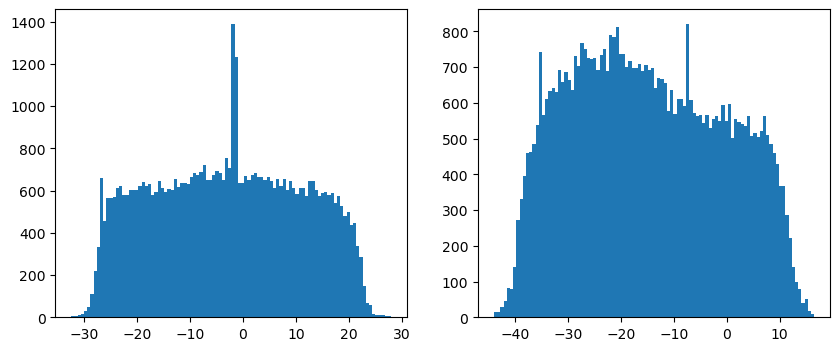

In [872]:
## Manual Adjustment
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.hist(p_z_Ar0, bins = 100);
ax2.hist(p_z_Ar1, bins = 100);

p_x_Ar0 = p_x_Ar0
p_x_Ar1 = p_x_Ar1
p_y_Ar0 = p_y_Ar0
p_y_Ar1 = p_y_Ar1
p_z_Ar0 = p_z_Ar0
p_z_Ar1 = p_z_Ar1


print(p_x_Ar0[np.argmax(p_z_Ar0)])

# p_z_Ar0 = p_z_Ar0+50
# p_z_Ar1 = p_z_Ar1-26

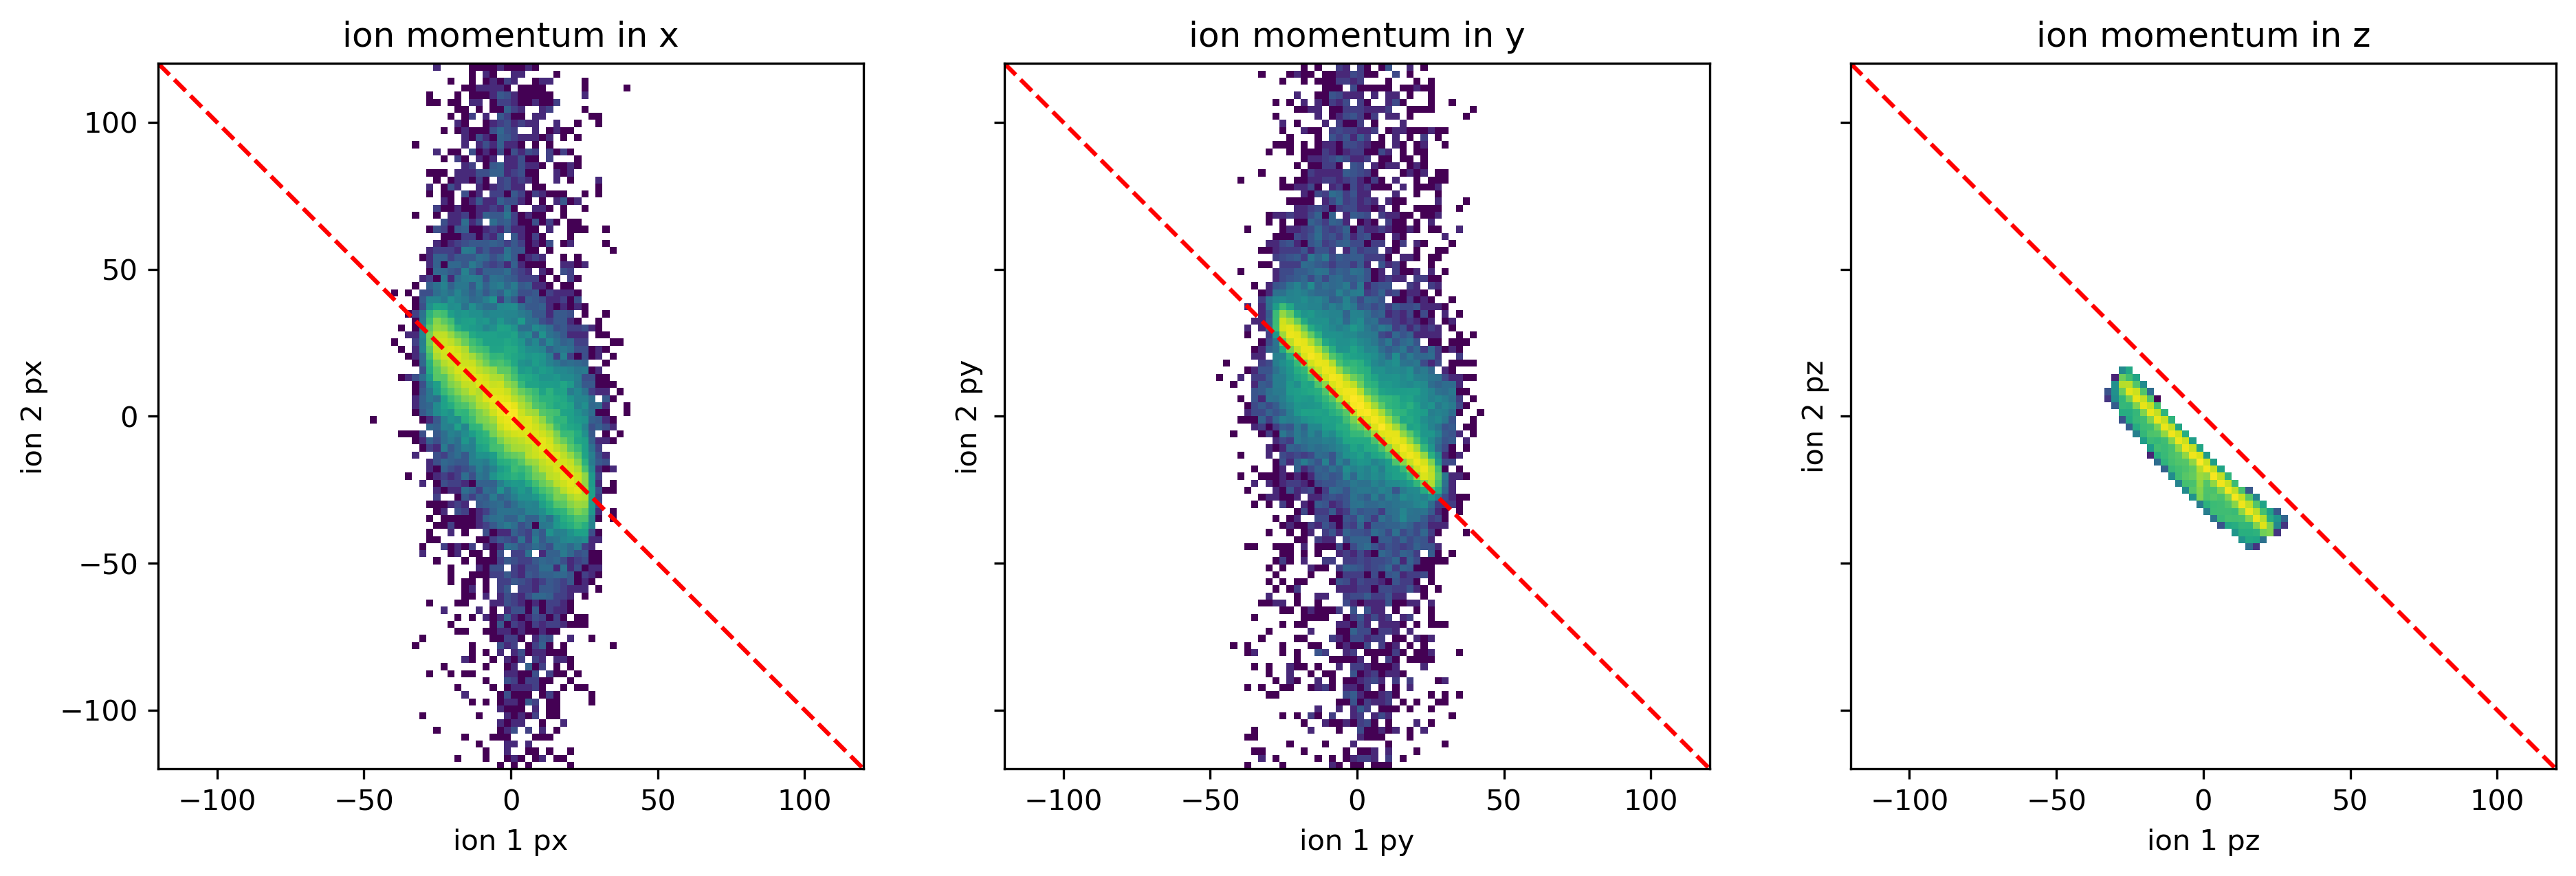

In [873]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-120, 120)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(p_x_Ar0, p_x_Ar1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('ion momentum in x')
axs[0].set_xlabel('ion 1 px')
axs[0].set_ylabel('ion 2 px')


hist2 = axs[1].hist2d(p_y_Ar0, p_y_Ar1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('ion momentum in y')
axs[1].set_xlabel('ion 1 py')
axs[1].set_ylabel('ion 2 py')

hist3 = axs[2].hist2d(p_z_Ar0, p_z_Ar1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('ion momentum in z');
axs[2].set_xlabel('ion 1 pz');
axs[2].set_ylabel('ion 2 pz');

for ax in axs:
    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

# Show the plot
plt.savefig(folder_path + "\\ion_mom_xx_yy_zz.png")

plt.show()



-2.944373053615095
-14.875627660620266
-8.910000357117681


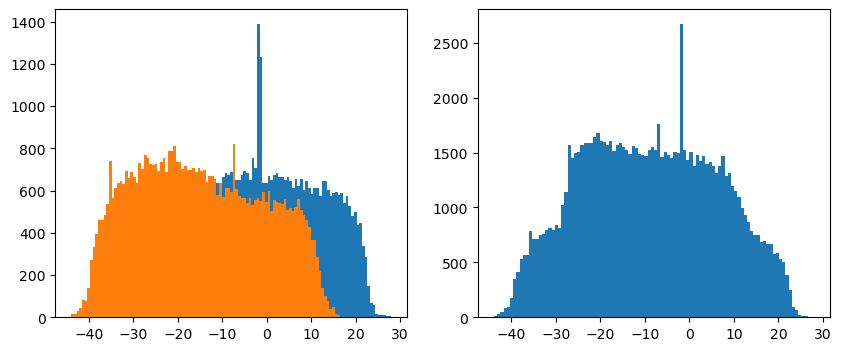

In [874]:
p_z0_mean = (sum(p_z_Ar0)/len(p_z_Ar0))
p_z1_mean = (sum(p_z_Ar1)/len(p_z_Ar1))
p_z_mean = (p_z0_mean+p_z1_mean)/2
#p_z_mean = 0
print(p_z0_mean)
print(p_z1_mean)

p_z_total = np.concatenate((p_z_Ar0, p_z_Ar1))
print(p_z_mean)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.hist(p_z_Ar0, bins = 100);
ax1.hist(p_z_Ar1, bins = 100);
ax2.hist(p_z_total, bins = 100);
p_z_Ar0 = p_z_Ar0-p_z_mean
p_z_Ar1 = p_z_Ar1-p_z_mean

# mean = np.mean(p_z_e0)
# std_dev = np.std(p_z_e0)
# threshold = 3
# z_scores = np.abs((p_z_e0 - mean) / std_dev)
# outliers = p_z_e0[z_scores > threshold]
# cleaned_data = p_z_e0[z_scores <= threshold]
# mean_without_outliers = np.mean(cleaned_data)
# p_z_e0 = p_z_e0 - mean_without_outliers

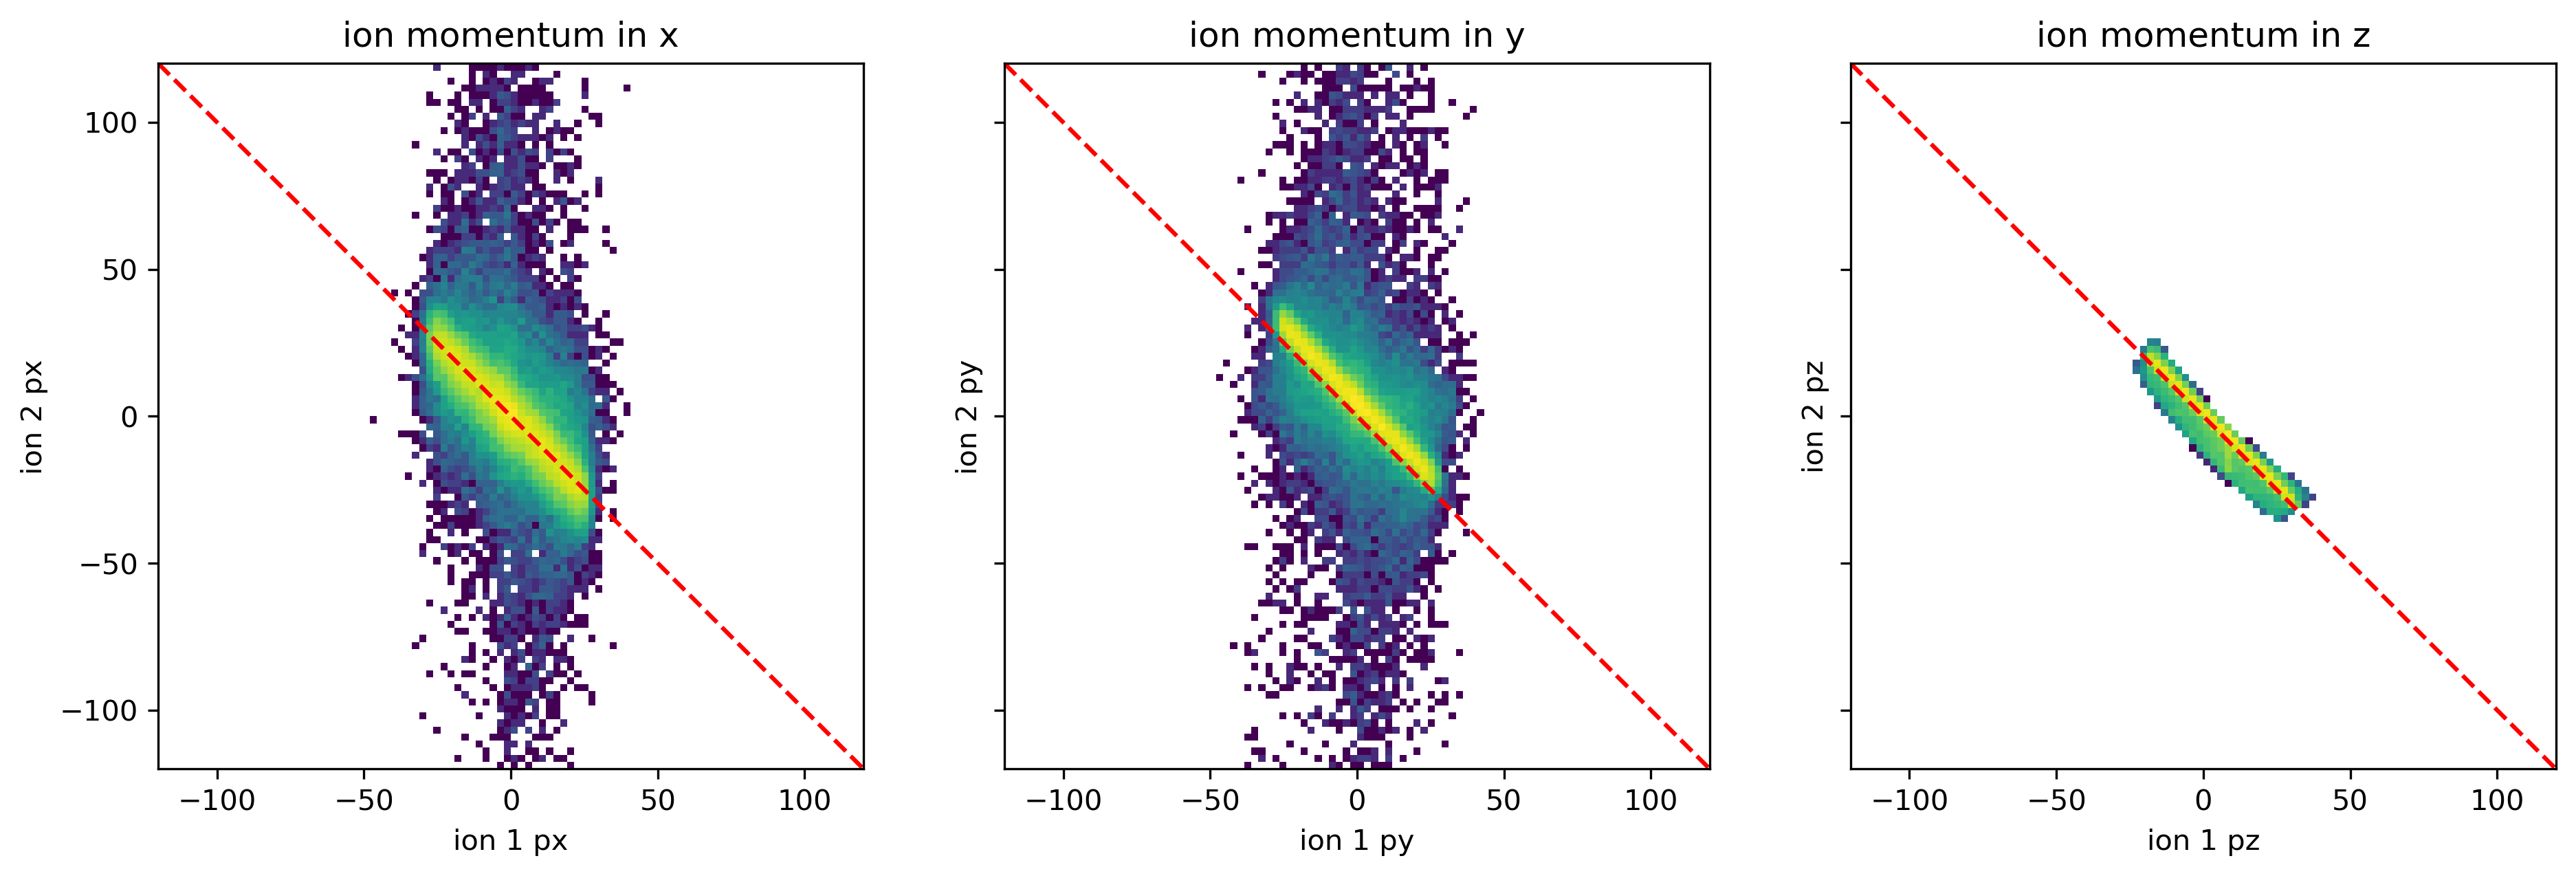

In [875]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-120, 120)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(p_x_Ar0, p_x_Ar1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('ion momentum in x')
axs[0].set_xlabel('ion 1 px')
axs[0].set_ylabel('ion 2 px')


hist2 = axs[1].hist2d(p_y_Ar0, p_y_Ar1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('ion momentum in y')
axs[1].set_xlabel('ion 1 py')
axs[1].set_ylabel('ion 2 py')

hist3 = axs[2].hist2d(p_z_Ar0, p_z_Ar1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('ion momentum in z');
axs[2].set_xlabel('ion 1 pz');
axs[2].set_ylabel('ion 2 pz');

for ax in axs:
    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

# Show the plot
plt.savefig(folder_path + "\\ion_mom_xx_yy_zz.png")

plt.show()



In [876]:
# #Center electron momentum

# mean = np.mean(p_x_Ar0)
# std_dev = np.std(p_x_Ar0)
# threshold = 1
# z_scores = np.abs((p_x_Ar0 - mean) / std_dev)
# outliers = p_x_Ar0[z_scores > threshold]
# cleaned_data = p_x_Ar0[z_scores <= threshold]
# mean_without_outliers = np.mean(cleaned_data)
# p_x_Ar0 = p_x_Ar0 - mean_without_outliers

# mean = np.mean(p_y_Ar0)
# std_dev = np.std(p_y_Ar0)
# threshold = 1
# z_scores = np.abs((p_y_Ar0 - mean) / std_dev)
# outliers = p_y_Ar0[z_scores > threshold]
# cleaned_data = p_y_Ar0[z_scores <= threshold]
# mean_without_outliers = np.mean(cleaned_data)
# p_y_Ar0 = p_y_Ar0 - mean_without_outliers

# if number_of_fragment == 1:
#     mean = np.mean(p_z_Ar0)
#     std_dev = np.std(p_z_Ar0)
#     threshold = 3
#     z_scores = np.abs((p_z_Ar0 - mean) / std_dev)
#     outliers = p_z_Ar0[z_scores > threshold]
#     cleaned_data = p_z_Ar0[z_scores <= threshold]
#     mean_without_outliers = np.mean(cleaned_data)
#     p_z_Ar0 = p_z_Ar0 - mean_without_outliers

# mean = np.mean(p_x_Ar1)
# std_dev = np.std(p_x_Ar1)
# threshold = 1
# z_scores = np.abs((p_x_Ar1 - mean) / std_dev)
# outliers = p_x_Ar1[z_scores > threshold]
# cleaned_data = p_x_Ar1[z_scores <= threshold]
# mean_without_outliers = np.mean(cleaned_data)
# p_x_Ar1 = p_x_Ar1 - mean_without_outliers

# mean = np.mean(p_y_Ar1)
# std_dev = np.std(p_y_Ar1)
# threshold = 1
# z_scores = np.abs((p_y_Ar1 - mean) / std_dev)
# outliers = p_y_Ar1[z_scores > threshold]
# cleaned_data = p_y_Ar1[z_scores <= threshold]
# mean_without_outliers = np.mean(cleaned_data)
# p_y_Ar1 = p_y_Ar1 - mean_without_outliers

# if number_of_fragment == 1:
#     mean = np.mean(p_z_Ar1)
#     std_dev = np.std(p_z_Ar1)
#     threshold = 3
#     z_scores = np.abs((p_z_Ar1 - mean) / std_dev)
#     outliers = p_z_Ar1[z_scores > threshold]
#     cleaned_data = p_z_Ar1[z_scores <= threshold]
#     mean_without_outliers = np.mean(cleaned_data)
#     p_z_Ar1 = p_z_Ar1 - mean_without_outliers



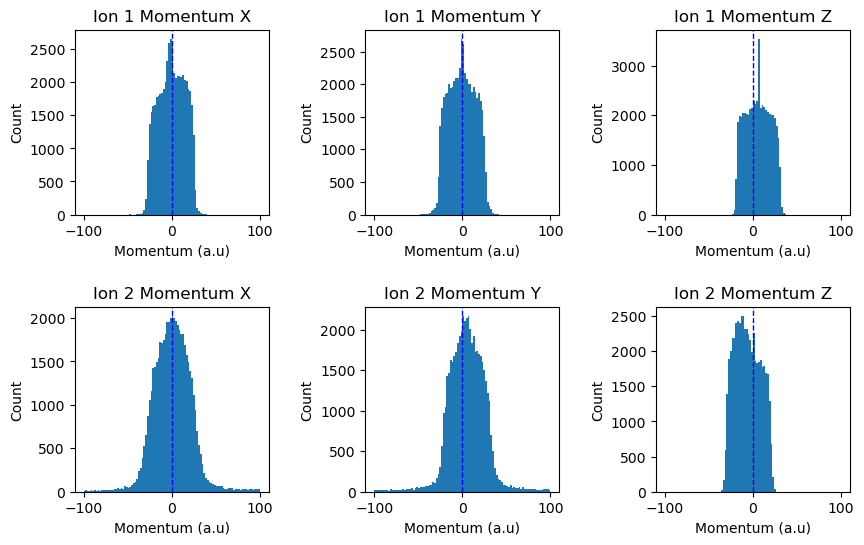

In [877]:
#######################################
#Ion MOMENTUM PLOT###################
######################################
fig, axes = plt.subplots(2,3,figsize=(10,6))
data = [p_x_Ar0, p_y_Ar0, p_z_Ar0, p_x_Ar1, p_y_Ar1, p_z_Ar1]

ranges = (-100,100)

axes[0,0].hist(p_x_Ar0, bins=(100), range=ranges);
axes[0,1].hist(p_y_Ar0, bins=(100), range=ranges);
axes[0,2].hist(p_z_Ar0, bins=(100), range=ranges);
axes[1,0].hist(p_x_Ar1, bins=(100), range=ranges);
axes[1,1].hist(p_y_Ar1, bins=(100), range=ranges);
axes[1,2].hist(p_z_Ar1, bins=(100), range=ranges);

axes[0, 0].set_title('Ion 1 Momentum X')
axes[0, 1].set_title('Ion 1 Momentum Y')
axes[0, 2].set_title('Ion 1 Momentum Z')
axes[1, 0].set_title('Ion 2 Momentum X')
axes[1, 1].set_title('Ion 2 Momentum Y')
axes[1, 2].set_title('Ion 2 Momentum Z')

axes[0, 0].set_xlabel('Momentum (a.u)')
axes[0, 1].set_xlabel('Momentum (a.u)')
axes[0, 2].set_xlabel('Momentum (a.u)')
axes[1, 0].set_xlabel('Momentum (a.u)')
axes[1, 1].set_xlabel('Momentum (a.u)')
axes[1, 2].set_xlabel('Momentum (a.u)')

axes[0, 0].set_ylabel('Count')
axes[0, 1].set_ylabel('Count')
axes[0, 2].set_ylabel('Count')
axes[1, 0].set_ylabel('Count')
axes[1, 1].set_ylabel('Count')
axes[1, 2].set_ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

for ax in axes.flatten():
    ax.axvline(0, color='blue', linestyle='--', linewidth=1)


## Electron Momentum

In [878]:
######################
#### calculate e momentum ####
######################

p_z_e0 = calc_pze(e_TOF0, e_x0, e_y0, 0.000548, -1, 0, 0, 0, e_acc1mm, e_acc2mm, e_acc3mm, e_Efield1_Vpcm, e_Efield2_Vpcm, e_Efield3_Vpcm, B_field_ns, BField_clockwise=True)

#p_z_e0 = calc_pze(e_TOF0, e_x0, e_y0, 1/MASSAU, -1, 0, 0, 0, e_acc1mm, e_acc2mm, e_acc3mm, e_Efield1_Vpcm, e_Efield2_Vpcm, e_Efield3_Vpcm, B_field_ns, BField_clockwise=True)
if number_of_fragment == 1:
    p_z_e1 = p_z_e0
else:
    p_z_e1 = calc_pze(e_TOF1, e_x1, e_y1, 1/MASSAU, -1, 0, 0, 0, e_acc1mm, e_acc2mm, e_acc3mm, e_Efield1_Vpcm, e_Efield2_Vpcm, e_Efield3_Vpcm, B_field_ns, BField_clockwise=True)


In [879]:
p_x_e0 = calc_px(e_TOF0, e_x0, e_y0, 1/MASSAU, -1, B_field_ns, True)
p_y_e0 = calc_py(e_TOF0, e_x0, e_y0, 1/MASSAU, -1, B_field_ns, True)
p_x_e1 = calc_px(e_TOF1, e_x1, e_y1, 1/MASSAU, -1, B_field_ns, True)
p_y_e1 = calc_py(e_TOF1, e_x1, e_y1, 1/MASSAU, -1, B_field_ns, True)

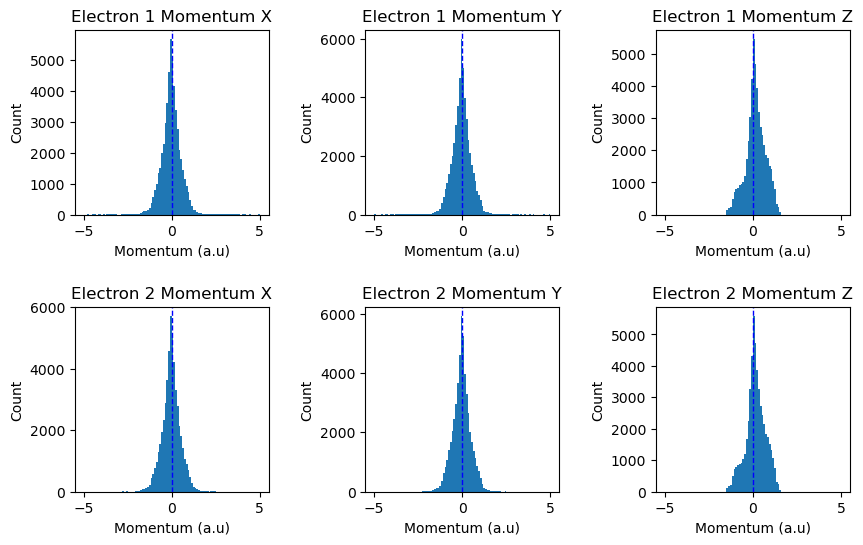

In [880]:
#######################################
#Electron MOMENTUM PLOT###################
######################################
fig, axes = plt.subplots(2,3,figsize=(10,6))
#data = [p_z_e1, p_z_e1, p_z_e1, p_z_e1, p_z_e1, p_z_e1]

ranges = (-5,5)

axes[0,0].hist(p_x_e0, bins=(100), range=ranges);
axes[0,1].hist(p_y_e0, bins=(100), range=ranges);
axes[0,2].hist(p_z_e0, bins=(100), range=ranges);
axes[1,0].hist(p_x_e1, bins=(100), range=ranges);
axes[1,1].hist(p_y_e1, bins=(100), range=ranges);
axes[1,2].hist(p_z_e1, bins=(100), range=ranges);

axes[0, 0].set_title('Electron 1 Momentum X')
axes[0, 1].set_title('Electron 1 Momentum Y')
axes[0, 2].set_title('Electron 1 Momentum Z')
axes[1, 0].set_title('Electron 2 Momentum X')
axes[1, 1].set_title('Electron 2 Momentum Y')
axes[1, 2].set_title('Electron 2 Momentum Z')

axes[0, 0].set_xlabel('Momentum (a.u)')
axes[0, 1].set_xlabel('Momentum (a.u)')
axes[0, 2].set_xlabel('Momentum (a.u)')
axes[1, 0].set_xlabel('Momentum (a.u)')
axes[1, 1].set_xlabel('Momentum (a.u)')
axes[1, 2].set_xlabel('Momentum (a.u)')

axes[0, 0].set_ylabel('Count')
axes[0, 1].set_ylabel('Count')
axes[0, 2].set_ylabel('Count')
axes[1, 0].set_ylabel('Count')
axes[1, 1].set_ylabel('Count')
axes[1, 2].set_ylabel('Count')

for ax in axes.flatten():
    #ax.set_aspect('equal')
    #ax.set_xlim(-120, 120)
    #ax.set_ylim(-120, 120)
    #ax.axhline(0, color='blue', linestyle='--', linewidth=1)
    ax.axvline(0, color='blue', linestyle='--', linewidth=1)
    #circle = Circle((0, 0), radius=90, color='red', fill=False, linestyle='dashed', linewidth=1)
    #ax.add_patch(circle)

#ax2.axvline(mu_i0_p_x1,c='r',ls='--')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [881]:
# e_X0 = calc_X0(e_TOF0, e_TOF1, e_x0, e_x1, 1/MASSAU, 1/MASSAU)
# e_Y0 = calc_Y0(e_TOF0, e_TOF1, e_y0, e_y1, 1/MASSAU, 1/MASSAU)
# e_px_X0 = calc_pxe_X0(e_TOF0, e_x0, e_y0, e_X0, e_Y0, B_field_ns, BField_clockwise=True)
# e_py_Y0 = calc_pye_Y0(e_TOF0, e_x0, e_y0, e_X0, e_Y0, B_field_ns, BField_clockwise=True)

In [882]:
# e_pz_Z0 = calc_pze_Z0(e_TOF0, e_acc1mm, e_acc2mm, e_acc3mm, e_Efield1_Vpcm, e_Efield2_Vpcm, e_Efield3_Vpcm)
# e_Z0 = calc_Z0e(e_TOF0, e_acc1mm, e_acc2mm, e_acc3mm, e_Efield1_Vpcm, e_Efield2_Vpcm, e_Efield3_Vpcm, 1, 1/MASSAU)

In [883]:
#Center electron momentum

mean = np.mean(p_x_e0)
std_dev = np.std(p_x_e0)
threshold = 3
z_scores = np.abs((p_x_e0 - mean) / std_dev)
outliers = p_x_e0[z_scores > threshold]
cleaned_data = p_x_e0[z_scores <= threshold]
mean_without_outliers = np.mean(cleaned_data)
p_x_e0 = p_x_e0 - mean_without_outliers

mean = np.mean(p_y_e0)
std_dev = np.std(p_y_e0)
threshold = 3
z_scores = np.abs((p_y_e0 - mean) / std_dev)
outliers = p_y_e0[z_scores > threshold]
cleaned_data = p_y_e0[z_scores <= threshold]
mean_without_outliers = np.mean(cleaned_data)
p_y_e0 = p_y_e0 - mean_without_outliers

mean = np.mean(p_z_e0)
std_dev = np.std(p_z_e0)
threshold = 3
z_scores = np.abs((p_z_e0 - mean) / std_dev)
outliers = p_z_e0[z_scores > threshold]
cleaned_data = p_z_e0[z_scores <= threshold]
mean_without_outliers = np.mean(cleaned_data)
p_z_e0 = p_z_e0 - mean_without_outliers

mean = np.mean(p_x_e1)
std_dev = np.std(p_x_e1)
threshold = 3
z_scores = np.abs((p_x_e1 - mean) / std_dev)
outliers = p_x_e1[z_scores > threshold]
cleaned_data = p_x_e1[z_scores <= threshold]
mean_without_outliers = np.mean(cleaned_data)
p_x_e1 = p_x_e1 - mean_without_outliers

mean = np.mean(p_y_e1)
std_dev = np.std(p_y_e1)
threshold = 3
z_scores = np.abs((p_y_e1 - mean) / std_dev)
outliers = p_y_e1[z_scores > threshold]
cleaned_data = p_y_e1[z_scores <= threshold]
mean_without_outliers = np.mean(cleaned_data)
p_y_e1 = p_y_e1 - mean_without_outliers

mean = np.mean(p_z_e1)
std_dev = np.std(p_z_e1)
threshold = 3
z_scores = np.abs((p_z_e1 - mean) / std_dev)
outliers = p_z_e1[z_scores > threshold]
cleaned_data = p_z_e1[z_scores <= threshold]
mean_without_outliers = np.mean(cleaned_data)
p_z_e1 = p_z_e1 - mean_without_outliers



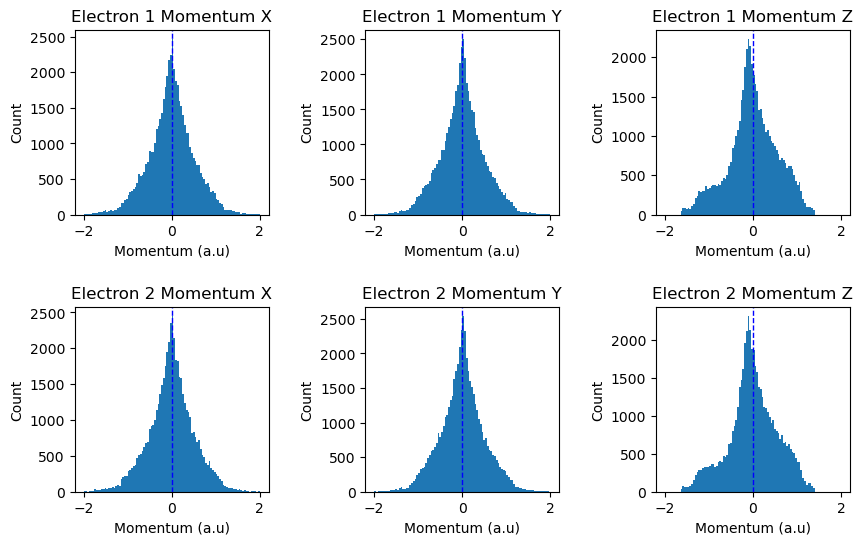

In [884]:
#######################################
#Electron MOMENTUM PLOT###################
######################################
fig, axes = plt.subplots(2,3,figsize=(10,6))
#data = [p_z_e1, p_z_e1, p_z_e1, p_z_e1, p_z_e1, p_z_e1]
xrange = (-2,2)

axes[0,0].hist(p_x_e0, bins=(100), range=xrange);
axes[0,1].hist(p_y_e0, bins=(100), range=xrange);
axes[0,2].hist(p_z_e0, bins=(100), range=xrange);
axes[1,0].hist(p_x_e1, bins=(100), range=xrange);
axes[1,1].hist(p_y_e1, bins=(100), range=xrange);
axes[1,2].hist(p_z_e1, bins=(100), range=xrange);

axes[0, 0].set_title('Electron 1 Momentum X')
axes[0, 1].set_title('Electron 1 Momentum Y')
axes[0, 2].set_title('Electron 1 Momentum Z')
axes[1, 0].set_title('Electron 2 Momentum X')
axes[1, 1].set_title('Electron 2 Momentum Y')
axes[1, 2].set_title('Electron 2 Momentum Z')

axes[0, 0].set_xlabel('Momentum (a.u)')
axes[0, 1].set_xlabel('Momentum (a.u)')
axes[0, 2].set_xlabel('Momentum (a.u)')
axes[1, 0].set_xlabel('Momentum (a.u)')
axes[1, 1].set_xlabel('Momentum (a.u)')
axes[1, 2].set_xlabel('Momentum (a.u)')

axes[0, 0].set_ylabel('Count')
axes[0, 1].set_ylabel('Count')
axes[0, 2].set_ylabel('Count')
axes[1, 0].set_ylabel('Count')
axes[1, 1].set_ylabel('Count')
axes[1, 2].set_ylabel('Count')

for ax in axes.flatten():
    #ax.set_aspect('equal')
    #ax.set_xlim(-120, 120)
    #ax.set_ylim(-120, 120)
    #ax.axhline(0, color='blue', linestyle='--', linewidth=1)
    ax.axvline(0, color='blue', linestyle='--', linewidth=1)
    #circle = Circle((0, 0), radius=90, color='red', fill=False, linestyle='dashed', linewidth=1)
    #ax.add_patch(circle)

#ax2.axvline(mu_i0_p_x1,c='r',ls='--')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [885]:
###################################
# x is flipped looking at 2d spectra
# flip the x electron
####################################
p_x_e0 = -p_x_e0
p_x_e1 = -p_x_e1


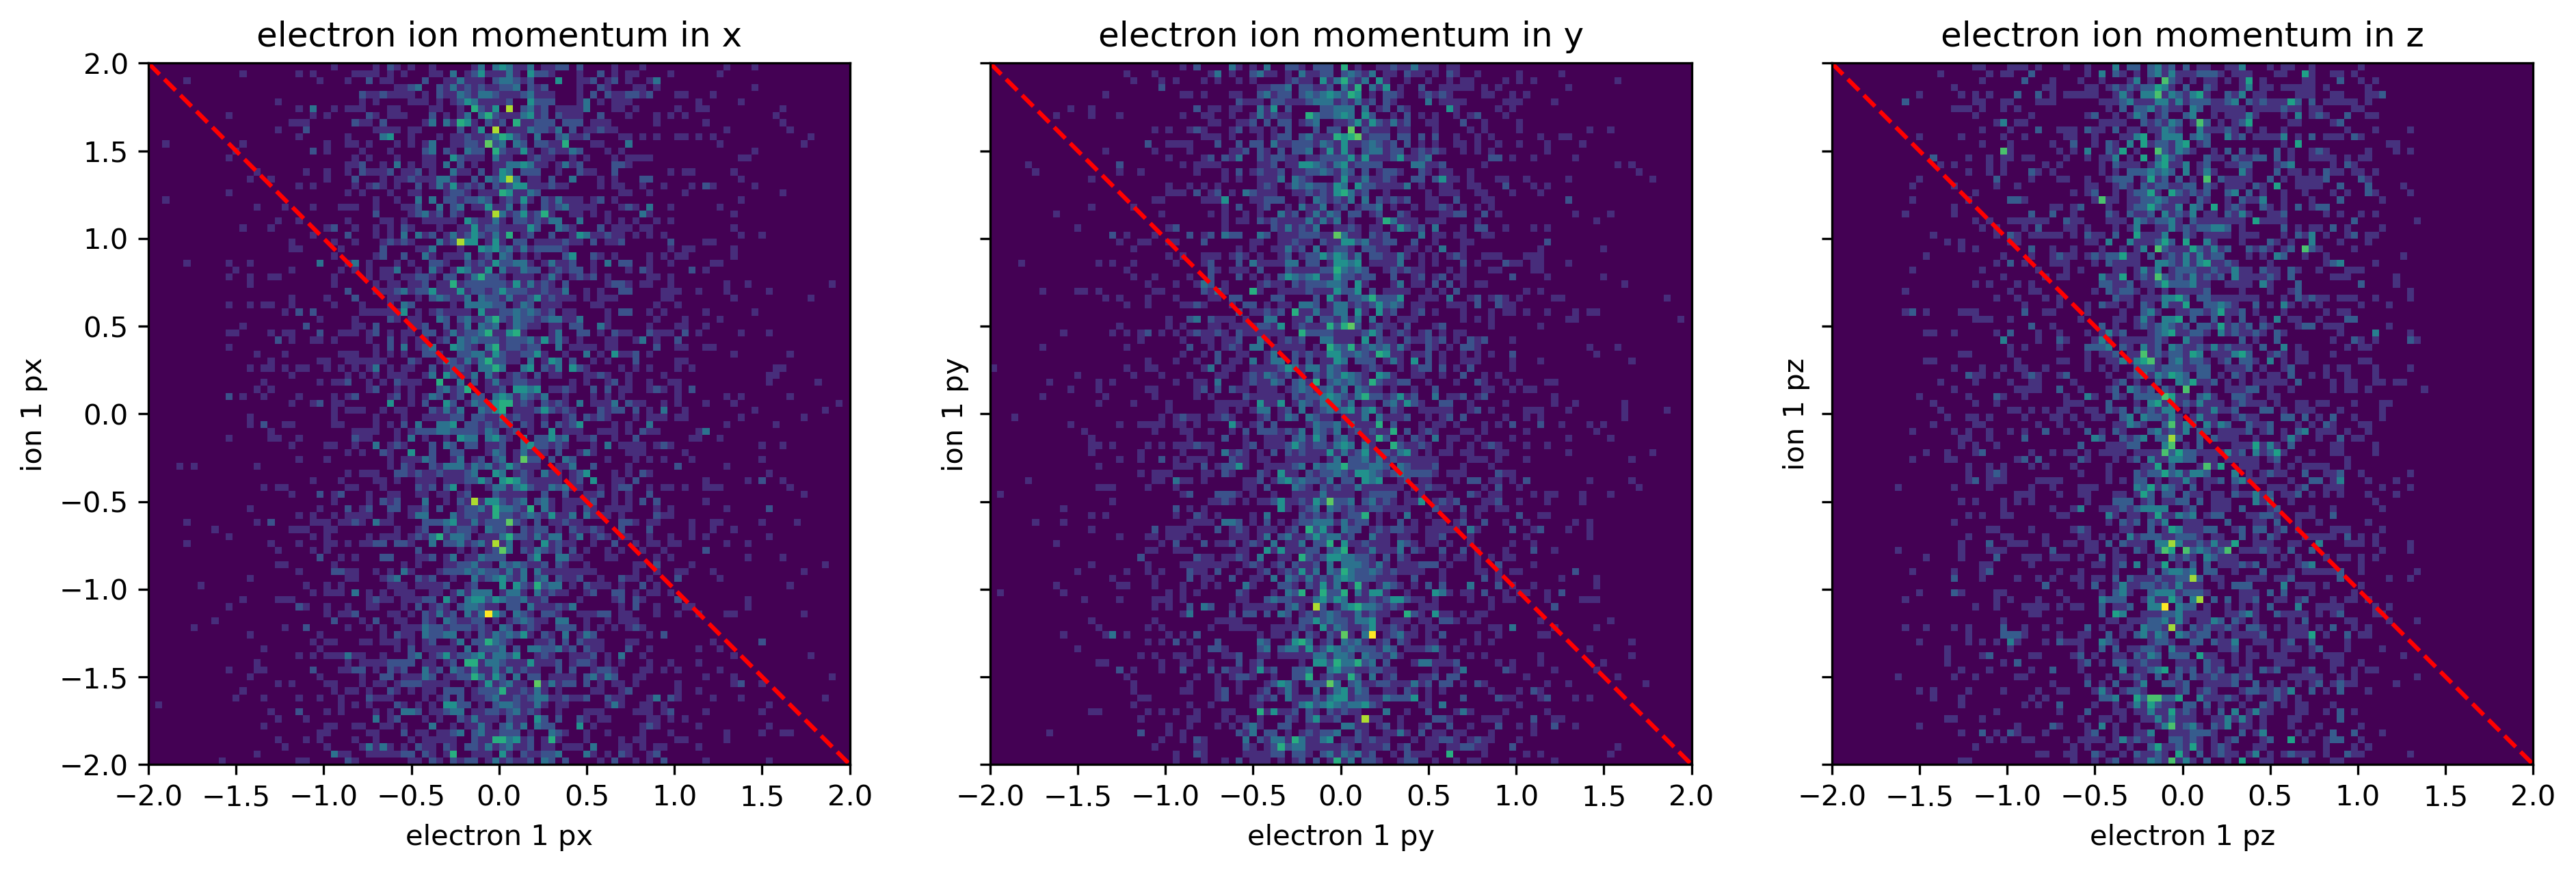

In [886]:
#######################################
#ION MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-2, 2)
y_range = (-2, 2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(p_x_e0, p_x_Ar0, bins=(100, 100), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('electron ion momentum in x')
axs[0].set_xlabel('electron 1 px')
axs[0].set_ylabel('ion 1 px')


hist2 = axs[1].hist2d(p_y_e0, p_y_Ar0, bins=(100, 100), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('electron ion momentum in y')
axs[1].set_xlabel('electron 1 py')
axs[1].set_ylabel('ion 1 py')

hist3 = axs[2].hist2d(p_z_e0, p_z_Ar0, bins=(100, 100), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('electron ion momentum in z');
axs[2].set_xlabel('electron 1 pz');
axs[2].set_ylabel('ion 1 pz');

for ax in axs:
    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

# Show the plot
plt.show()

In [887]:

# Define the file paths
if write_momentum_to_file:

    output_file = os.path.join(folder_path, "i_TOF0.txt")
    np.savetxt(output_file, i_TOF0)

    output_file = os.path.join(folder_path, "i_x0.txt")
    np.savetxt(output_file, i_x0)

    output_file = os.path.join(folder_path, "i_y0.txt")
    np.savetxt(output_file, i_y0)

    output_file = os.path.join(folder_path, "i_TOF1.txt")
    np.savetxt(output_file, i_TOF1)

    output_file = os.path.join(folder_path, "i_x1.txt")
    np.savetxt(output_file, i_x1)

    output_file = os.path.join(folder_path, "i_y1.txt")
    np.savetxt(output_file, i_y1)

    output_file = os.path.join(folder_path, "e_TOF0.txt")
    np.savetxt(output_file, e_TOF0)

    output_file = os.path.join(folder_path, "e_x0.txt")
    np.savetxt(output_file, e_x0)

    output_file = os.path.join(folder_path, "e_y0.txt")
    np.savetxt(output_file, e_y0)

    output_file = os.path.join(folder_path, "e_TOF1.txt")
    np.savetxt(output_file, e_TOF1)

    output_file = os.path.join(folder_path, "e_x1.txt")
    np.savetxt(output_file, e_x1)

    output_file = os.path.join(folder_path, "e_y1.txt")
    np.savetxt(output_file, e_y1)

    output_file = os.path.join(folder_path, "p_x_Ar0.txt")
    np.savetxt(output_file, p_x_Ar0)

    output_file = os.path.join(folder_path, "p_y_Ar0.txt")
    np.savetxt(output_file, p_y_Ar0)

    output_file = os.path.join(folder_path, "p_z_Ar0.txt")
    np.savetxt(output_file, p_z_Ar0)

    output_file = os.path.join(folder_path, "p_x_Ar1.txt")
    np.savetxt(output_file, p_x_Ar1)

    output_file = os.path.join(folder_path, "p_y_Ar1.txt")
    np.savetxt(output_file, p_y_Ar1)

    output_file = os.path.join(folder_path, "p_z_Ar1.txt")
    np.savetxt(output_file, p_z_Ar1)

    output_file = os.path.join(folder_path, "p_x_e0.txt")
    np.savetxt(output_file, p_x_e0)

    output_file = os.path.join(folder_path, "p_y_e0.txt")
    np.savetxt(output_file, p_y_e0)

    output_file = os.path.join(folder_path, "p_z_e0.txt")
    np.savetxt(output_file, p_z_e0)

    output_file = os.path.join(folder_path, "p_x_e1.txt")
    np.savetxt(output_file, p_x_e1)

    output_file = os.path.join(folder_path, "p_y_e1.txt")
    np.savetxt(output_file, p_y_e1)

    output_file = os.path.join(folder_path, "p_z_e1.txt")
    np.savetxt(output_file, p_z_e1)



# Now we enforce gates in momentum space on data to select channels and events of interest

In [888]:
#First gate
e_px0_filter = (p_x_e0 > -5) & (p_x_e0 < 5)
e_py0_filter = (p_y_e0 > -5) & (p_y_e0 < 5)
e_pz0_filter = (p_z_e0 > -5) & (p_z_e0 < 5)

e_px1_filter = (p_x_e1 > -5) & (p_x_e1 < 5)
e_py1_filter = (p_y_e1 > -5) & (p_y_e1 < 5)
e_pz1_filter = (p_z_e1 > -5) & (p_z_e1 < 5)



e_mom_filter = e_px0_filter & e_py0_filter & e_pz0_filter & e_px1_filter & e_py1_filter & e_pz1_filter

i_px0_filter = (p_x_Ar0 > -200) & (p_x_Ar0 < 200)
i_py0_filter = (p_y_Ar0 > -200) & (p_y_Ar0 < 200)
if symmetrize_ion:
    i_pz0_filter = (p_z_Ar0 > -200) & (p_z_Ar0 < 200)
else:
    i_pz0_filter = (p_z_Ar0 > -10) & (p_z_Ar0 < 200)
    
i_px1_filter = (p_x_Ar1 > -200) & (p_x_Ar1 < 200)
i_py1_filter = (p_y_Ar1 > -200) & (p_y_Ar1 < 200)
if symmetrize_ion:
    i_pz1_filter = (p_z_Ar1 > -200) & (p_z_Ar1 < 200)
else:
    i_pz1_filter = (p_z_Ar1 > -200) & (p_z_Ar1 < 10)    

i_mom_filter = i_px0_filter & i_py0_filter & i_pz0_filter & i_px1_filter & i_py1_filter & i_pz1_filter

pre_mom_filter = e_mom_filter & i_mom_filter

#print((e_py0_filtered))

### First we gate on electrons using two shells of different radius in momentum space, only accepting events which lie between. We then apply another gate that enforces momentum conservation between the electron-ion pair (longitudinal). Finally we gate on ion trasverse distributions.

In [889]:
i_pxx_filter = ((p_x_Ar0 + p_x_Ar1) >= -80) &  ((p_x_Ar0 + p_x_Ar1) <= 80)
i_pyy_filter = ((p_y_Ar0 + p_y_Ar1) >= -80) &  ((p_y_Ar0 + p_y_Ar1) <= 80)
i_pzz_filter = ((p_z_Ar0 + p_z_Ar1) >= -80) &  ((p_z_Ar0 + p_z_Ar1) <= 80)
#i filter 10 for N2 and He
e_pxx_filter = True #p_x_e0**2 +p_x_e1**2 >= 0 #  != 0) & (p_x_e1 != 0) #+ p_x_e1 >= -2) &  (p_x_e0 + p_x_e1 <= 2)
e_pyy_filter = True #p_y_e0**2 +p_y_e1**2 >= 0  #(p_y_e0 + p_y_e1 >= -2) &  (p_y_e0 + p_y_e1 <= 2)
e_pzz_filter = True #p_z_e0**2 +p_z_e1**2 >= 0  #(p_z_e0 + p_z_e1 >= -2) &  (p_z_e0 + p_z_e1 <= 2)

sum_mom_filter = i_pxx_filter & i_pyy_filter & i_pzz_filter & e_pxx_filter & e_pyy_filter & e_pzz_filter

if number_of_fragment == 1:
    sum_mom_filter = True

In [890]:
mom_x_filter = ((p_x_Ar0 + p_x_Ar1 + p_x_e0 + p_x_e1) >= -80) & ((p_x_Ar0 + p_x_Ar1 + p_x_e0 + p_x_e1) <= 80) 
mom_y_filter = ((p_y_Ar0 + p_y_Ar1 + p_y_e0 + p_y_e1) >= -80) & ((p_y_Ar0 + p_y_Ar1 + p_y_e0 + p_y_e1) <= 80) 
mom_z_filter = ((p_z_Ar0 + p_z_Ar1 + p_z_e0 + p_z_e1) >= -80) & ((p_z_Ar0 + p_z_Ar1 + p_z_e0 + p_z_e1) <= 80) 
# He 40

if number_of_fragment == 1:
    mom_x_filter = ((p_x_Ar0 + p_x_e0) >= -5) & ((p_x_Ar0 + p_x_e0) <= 5) 
    mom_y_filter = ((p_y_Ar0 + p_y_e0) >= -5) & ((p_y_Ar0 + p_y_e0) <= 5) 
    mom_z_filter = ((p_z_Ar0 + p_z_e0) >= -5) & ((p_z_Ar0 + p_z_e0) <= 5) 

mom_total_filter = mom_x_filter & mom_y_filter & mom_z_filter


In [891]:
rad_filter_i0 = (p_x_Ar0**2 + p_y_Ar0**2 + p_z_Ar0**2 <= 300**2) & (p_x_Ar0**2 + p_y_Ar0**2 + p_z_Ar0**2 >= 1**2)
rad_filter_i1 = (p_x_Ar1**2 + p_y_Ar1**2 + p_z_Ar1**2 <= 300**2) & (p_x_Ar1**2 + p_y_Ar1**2 + p_z_Ar1**2 >= 1**2)

rad_filter_e0 = (p_x_e0**2 + p_y_e0**2 + p_z_e0**2 <= 2**2) & (p_x_e0**2 + p_y_e0**2 + p_z_e0**2 >= 0.0**2)
rad_filter_e1 = (p_x_e1**2 + p_y_e1**2 + p_z_e1**2 <= 2**2) & (p_x_e1**2 + p_y_e1**2 + p_z_e1**2 >= 0.0**2)

rad_filter = rad_filter_i0 & rad_filter_i1 & rad_filter_e0 & rad_filter_e1

In [892]:
if number_of_fragment == 1:
    momentum_filter = pre_mom_filter & mom_total_filter
elif number_of_fragment == 2:
    momentum_filter = pre_mom_filter & sum_mom_filter & rad_filter

In [893]:
## James don't delete this keep it
##Filter raw data 
e_TOF0_filt = e_TOF0[momentum_filter]
e_TOF1_filt = e_TOF1[momentum_filter]
e_x0_filt = e_x0[momentum_filter]
e_y0_filt = e_y0[momentum_filter]
e_x1_filt = e_x1[momentum_filter]
e_y1_filt = e_y1[momentum_filter]

i_TOF0_filt = i_TOF0[momentum_filter]
i_TOF1_filt = i_TOF1[momentum_filter]
i_x0_filt = i_x0[momentum_filter]
i_y0_filt = i_y0[momentum_filter]
i_x1_filt = i_x1[momentum_filter]
i_y1_filt = i_y1[momentum_filter]


In [951]:
##########
#stretch
###########
#Ne
# e_stretch = [1.3,1.3,1.25]
# i_stretch = [0.99,0.99,1.05]

#He
e_stretch = [1.3,1.3,1.24]

#All others
#i_stretch = [0.99,0.99,1.05]
#H2O-CO
i_stretch = [1.05,1.05,1.]

e_shift = [0.,0.,0.025]

i_shift = [0,0,0]
# HCOOH
#i_shift = [0,0,0]

#H2O CO
#i_shift = [10,0,0]

#N2
#i_shift = [0,0,0]

#Ne
# e_shift = [0,0,0.025]
# i_shift = [2.5,1.5,0]



In [952]:
#####################################################################
#### offset ion momentum distributions to be centered on 0 #####
### scale ion transverse distribution to match longitudinal width ###
#################### since this axis is best res ####################
#####################################################################
i_px0 = p_x_Ar0[momentum_filter]* i_stretch[0] + i_shift[0]
i_py0 = p_y_Ar0[momentum_filter]* i_stretch[1] + i_shift[1]
i_pz0 = p_z_Ar0[momentum_filter]* i_stretch[2] + i_shift[2]
i_px1 = p_x_Ar1[momentum_filter]* i_stretch[0] + i_shift[0]
i_py1 = p_y_Ar1[momentum_filter]* i_stretch[1] + i_shift[1]
i_pz1 = p_z_Ar1[momentum_filter]* i_stretch[2] + i_shift[2]

#####################################################################
#### offset electron momentum distributions to be centered on 0 #####
### scale ion transverse distribution to match longitudinal width ###
#################### since this axis is best res ####################
#####################################################################
e_px0 = p_x_e0[momentum_filter]* e_stretch[0] + e_shift[0]
e_py0 = p_y_e0[momentum_filter]* e_stretch[1] + e_shift[1]
e_pz0 = p_z_e0[momentum_filter]* e_stretch[2] + e_shift[2]
e_px1 = p_x_e1[momentum_filter]* e_stretch[0] + e_shift[0]
e_py1 = p_y_e1[momentum_filter]* e_stretch[1] + e_shift[1]
e_pz1 = p_z_e1[momentum_filter]* e_stretch[2] + e_shift[2]

In [953]:
###################################################################################
### applying rotation matrix by pi/2 to ion (x,y) hits to get detector oriented ###
###################################################################################
rot_ang = 0*np.pi/180
i_px0 = i_px0*np.cos(rot_ang) - i_py0*np.sin(rot_ang)
i_py0 = i_px0*np.sin(rot_ang) + i_py0*np.cos(rot_ang)

########################################################################################
### applying rotation matrix by pi/3 to electron (x,y) hits to get detector oriented ###
########################################################################################
#elec_det_theta = np.pi/3
elec_det_theta = 0*np.pi/180
e_px0 = e_px0*np.cos(elec_det_theta) - e_py0*np.sin(elec_det_theta)
e_py0 = e_px0*np.sin(elec_det_theta) + e_py0*np.cos(elec_det_theta)

###################################################################################
### applying rotation matrix by pi/2 to ion (x,y) hits to get detector oriented ###
###################################################################################
i_px1 = i_px1*np.cos(rot_ang) - i_py1*np.sin(rot_ang)
i_py1 = i_px1*np.sin(rot_ang) + i_py1*np.cos(rot_ang)

########################################################################################
### applying rotation matrix by pi/3 to electron (x,y) hits to get detector oriented ###
########################################################################################
e_px1 = e_px1*np.cos(elec_det_theta) - e_py1*np.sin(elec_det_theta)
e_py1 = e_px1*np.sin(elec_det_theta) + e_py1*np.cos(elec_det_theta)

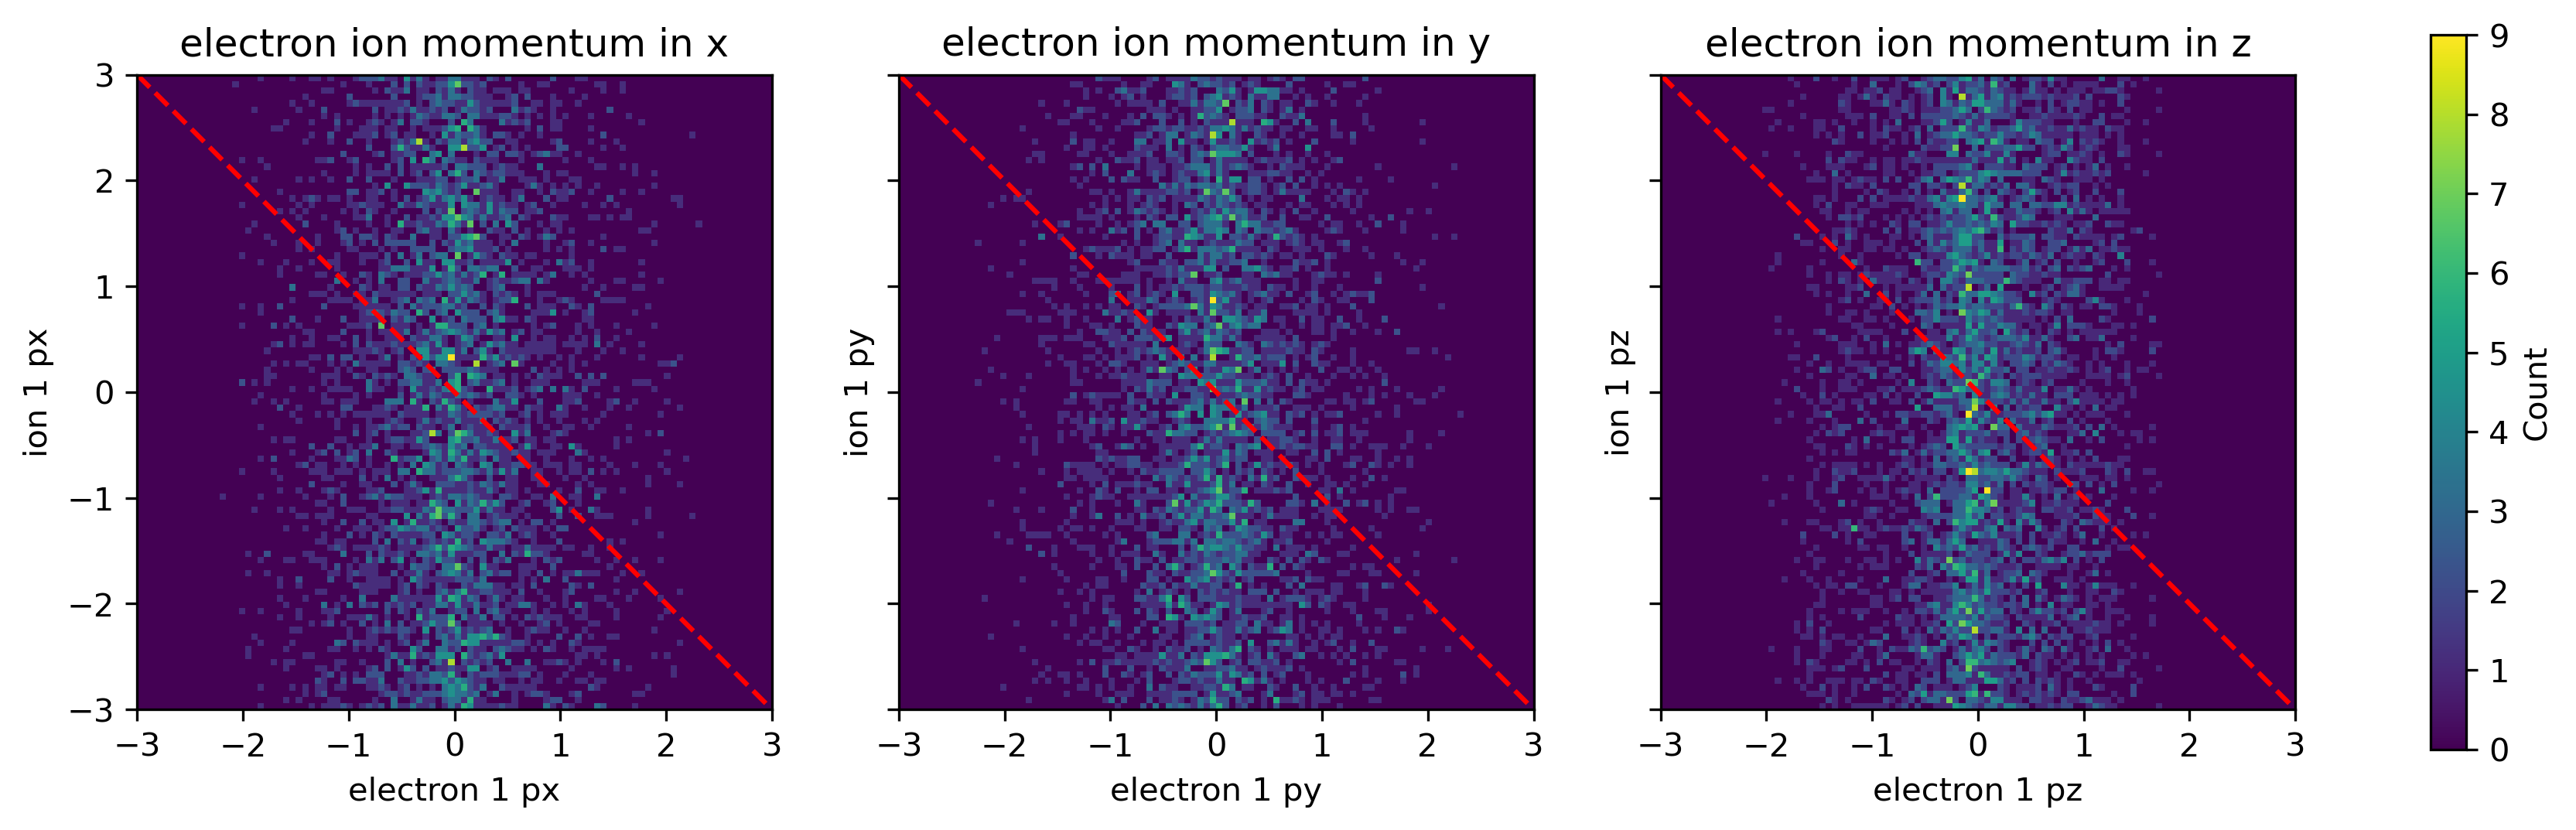

In [954]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-3, 3)
y_range = (-3, 3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, i_px0, bins=(100, 100), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('electron ion momentum in x')
axs[0].set_xlabel('electron 1 px')
axs[0].set_ylabel('ion 1 px')


hist2 = axs[1].hist2d(e_py0, i_py0, bins=(100, 100), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('electron ion momentum in y')
axs[1].set_xlabel('electron 1 py')
axs[1].set_ylabel('ion 1 py')

hist3 = axs[2].hist2d(e_pz0, i_pz0, bins=(100, 100), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('electron ion momentum in z');
axs[2].set_xlabel('electron 1 pz');
axs[2].set_ylabel('ion 1 pz');

for ax in axs:
    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

plt.colorbar(hist3[3], ax=axs.ravel().tolist(), label='Count', shrink=0.8)

# Show the plot
plt.show()

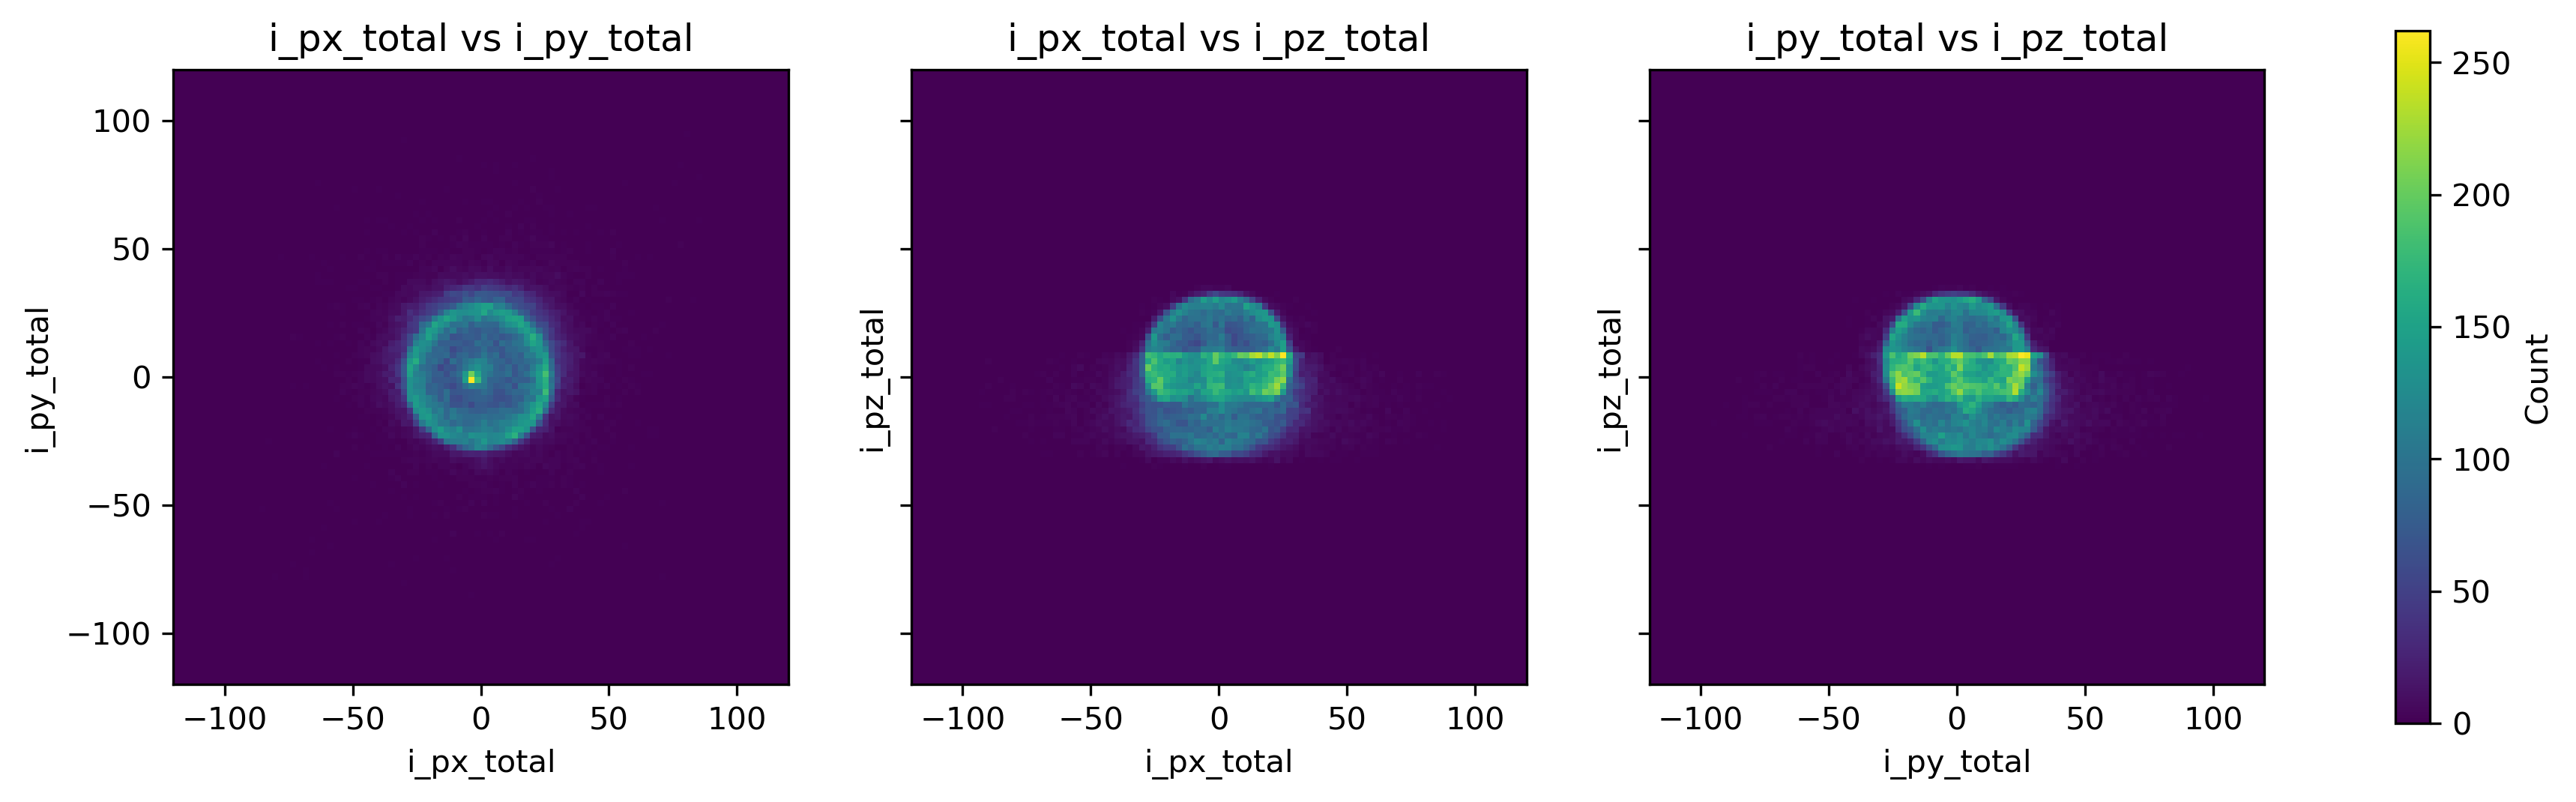

In [964]:
#######################################
#ION MOMENTUM PLOT###################
######################################
if number_of_fragment == 1:
    i_px_total = i_px0
    i_py_total = i_py0
    i_pz_total = i_pz0
elif number_of_fragment == 2:
    i_px_total = np.concatenate((i_px0, i_px1))
    i_py_total = np.concatenate((i_py0, i_py1))
    i_pz_total = np.concatenate((i_pz0, i_pz1))


# Determine the data range
x_range = (-120, 120)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(i_px_total, i_py_total, bins=(100, 100), range=[x_range, y_range])#, cmap='brg')
axs[0].set_aspect('equal')
axs[0].set_title('i_px_total vs i_py_total')
axs[0].set_xlabel('i_px_total')
axs[0].set_ylabel('i_py_total')

hist2 = axs[1].hist2d(i_px_total, i_pz_total, bins=(100, 100), range=[x_range, y_range])#, cmap='brg')
axs[1].set_aspect('equal')
axs[1].set_title('i_px_total vs i_pz_total')
axs[1].set_xlabel('i_px_total')
axs[1].set_ylabel('i_pz_total')

hist3 = axs[2].hist2d(i_py_total, i_pz_total, bins=(100, 100), range=[x_range, y_range])#, cmap='brg')
axs[2].set_aspect('equal')
axs[2].set_title('i_py_total vs i_pz_total')
axs[2].set_xlabel('i_py_total')
axs[2].set_ylabel('i_pz_total')

plt.colorbar(hist3[3], ax=axs.ravel().tolist(), label='Count', shrink=0.8)


# Add circles to each subplot
# for ax in axs:
circle = Circle((0, 0), radius=1.5, color='red', fill=False, linestyle='dashed', linewidth=2)
#axs[0].add_patch(circle)

plt.savefig(folder_path + "\\ion_mom_xy_xz_yz.png")

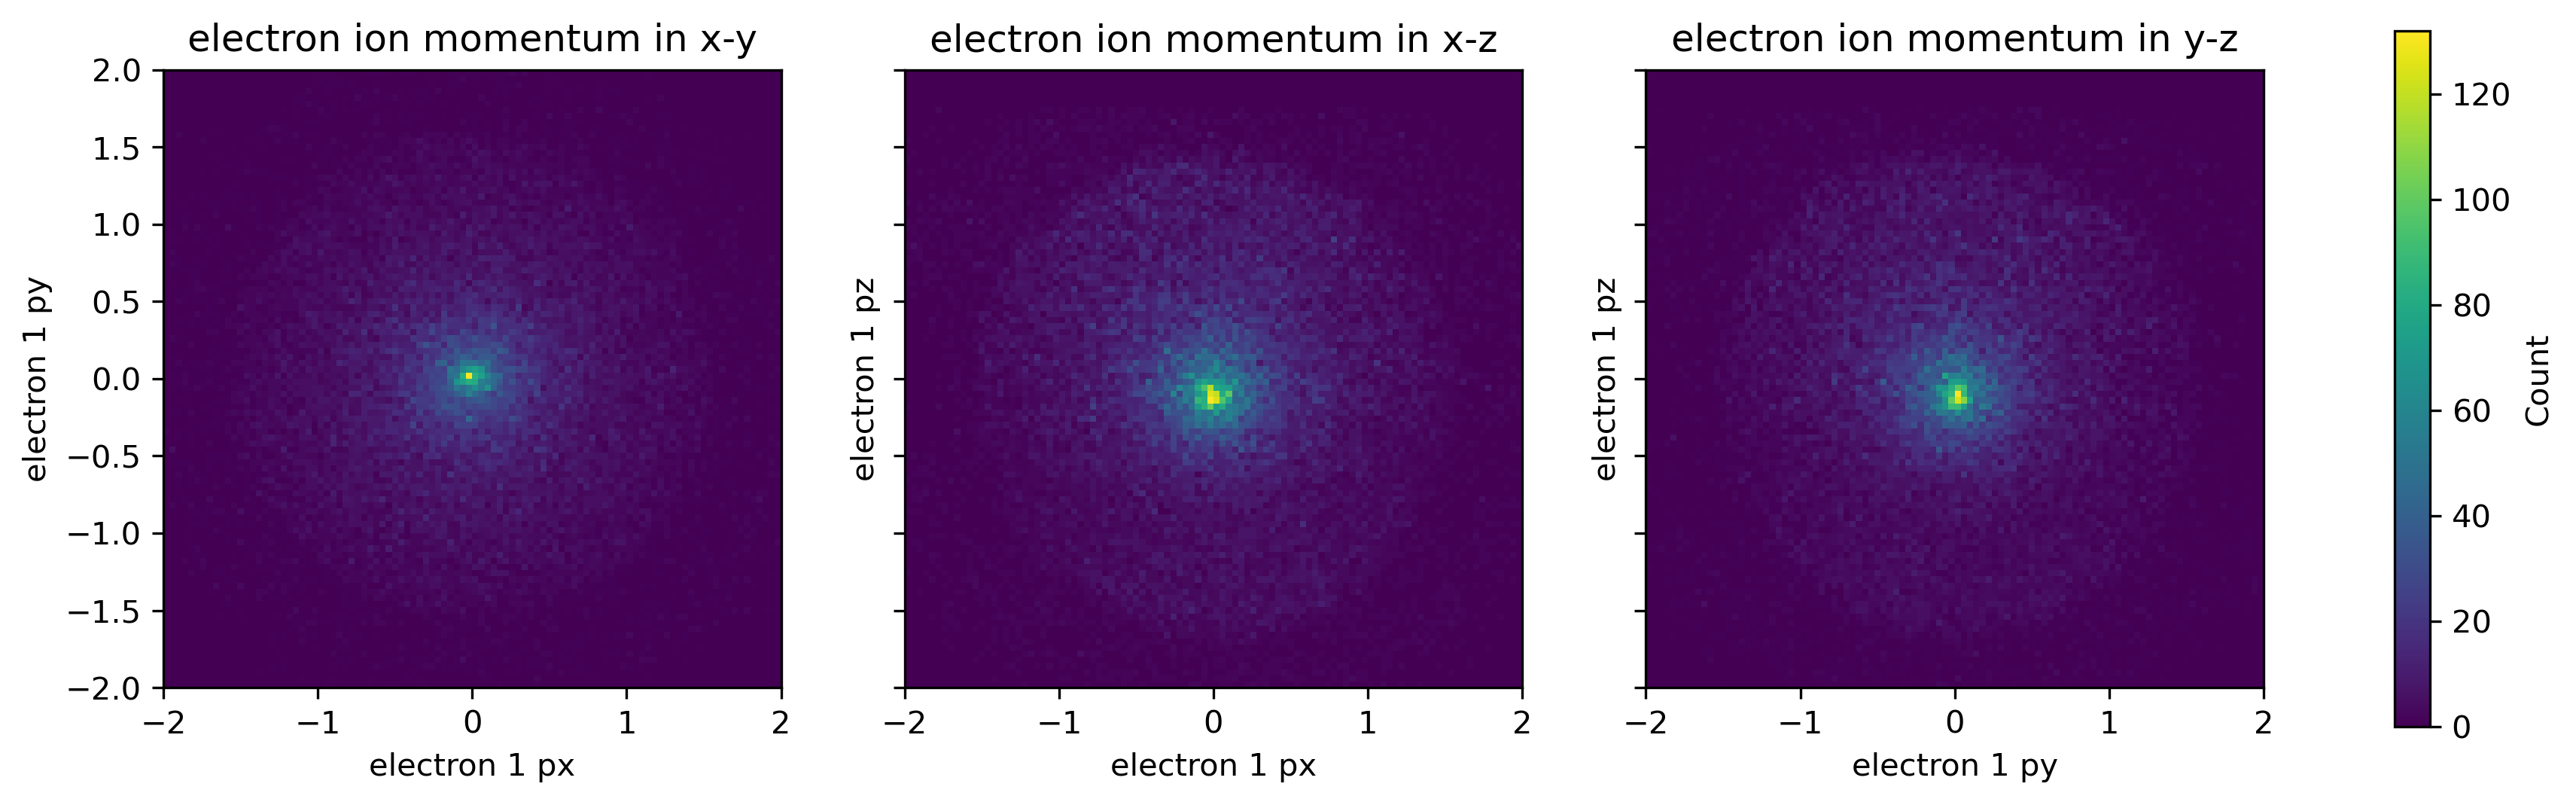

In [965]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-2, 2)
y_range = (-2, 2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, e_py0, bins=(100, 100), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('electron ion momentum in x-y')
axs[0].set_xlabel('electron 1 px')
axs[0].set_ylabel('electron 1 py')


hist2 = axs[1].hist2d(e_px0, e_pz0, bins=(100, 100), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('electron ion momentum in x-z')
axs[1].set_xlabel('electron 1 px')
axs[1].set_ylabel('electron 1 pz')

hist3 = axs[2].hist2d(e_py0, e_pz0, bins=(100, 100), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('electron ion momentum in y-z');
axs[2].set_xlabel('electron 1 py');
axs[2].set_ylabel('electron 1 pz');

#for ax in axs:
#    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

plt.colorbar(hist3[3], ax=axs.ravel().tolist(), label='Count', shrink=0.8)

# Show the plot
plt.show()

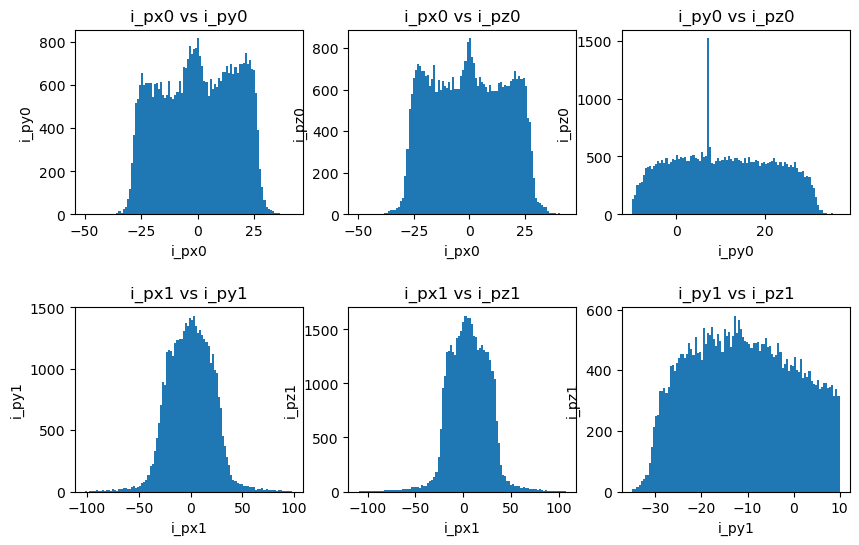

In [966]:
#######################################
#ION MOMENTUM PLOT###################
######################################
fig, axes = plt.subplots(2,3,figsize=(10,6))

axes[0,0].hist(i_px0, bins=(100));
axes[0,1].hist(i_py0, bins=(100));
axes[0,2].hist(i_pz0, bins=(100));
axes[1,0].hist(i_px1, bins=(100));
axes[1,1].hist(i_py1, bins=(100));
axes[1,2].hist(i_pz1, bins=(100));

axes[0, 0].set_title('i_px0 vs i_py0')
axes[0, 1].set_title('i_px0 vs i_pz0')
axes[0, 2].set_title('i_py0 vs i_pz0')
axes[1, 0].set_title('i_px1 vs i_py1')
axes[1, 1].set_title('i_px1 vs i_pz1')
axes[1, 2].set_title('i_py1 vs i_pz1')

axes[0, 0].set_xlabel('i_px0')
axes[0, 1].set_xlabel('i_px0')
axes[0, 2].set_xlabel('i_py0')
axes[1, 0].set_xlabel('i_px1')
axes[1, 1].set_xlabel('i_px1')
axes[1, 2].set_xlabel('i_py1')

axes[0, 0].set_ylabel('i_py0')
axes[0, 1].set_ylabel('i_pz0')
axes[0, 2].set_ylabel('i_pz0')
axes[1, 0].set_ylabel('i_py1')
axes[1, 1].set_ylabel('i_pz1')
axes[1, 2].set_ylabel('i_pz1')

plt.subplots_adjust(hspace=0.5)


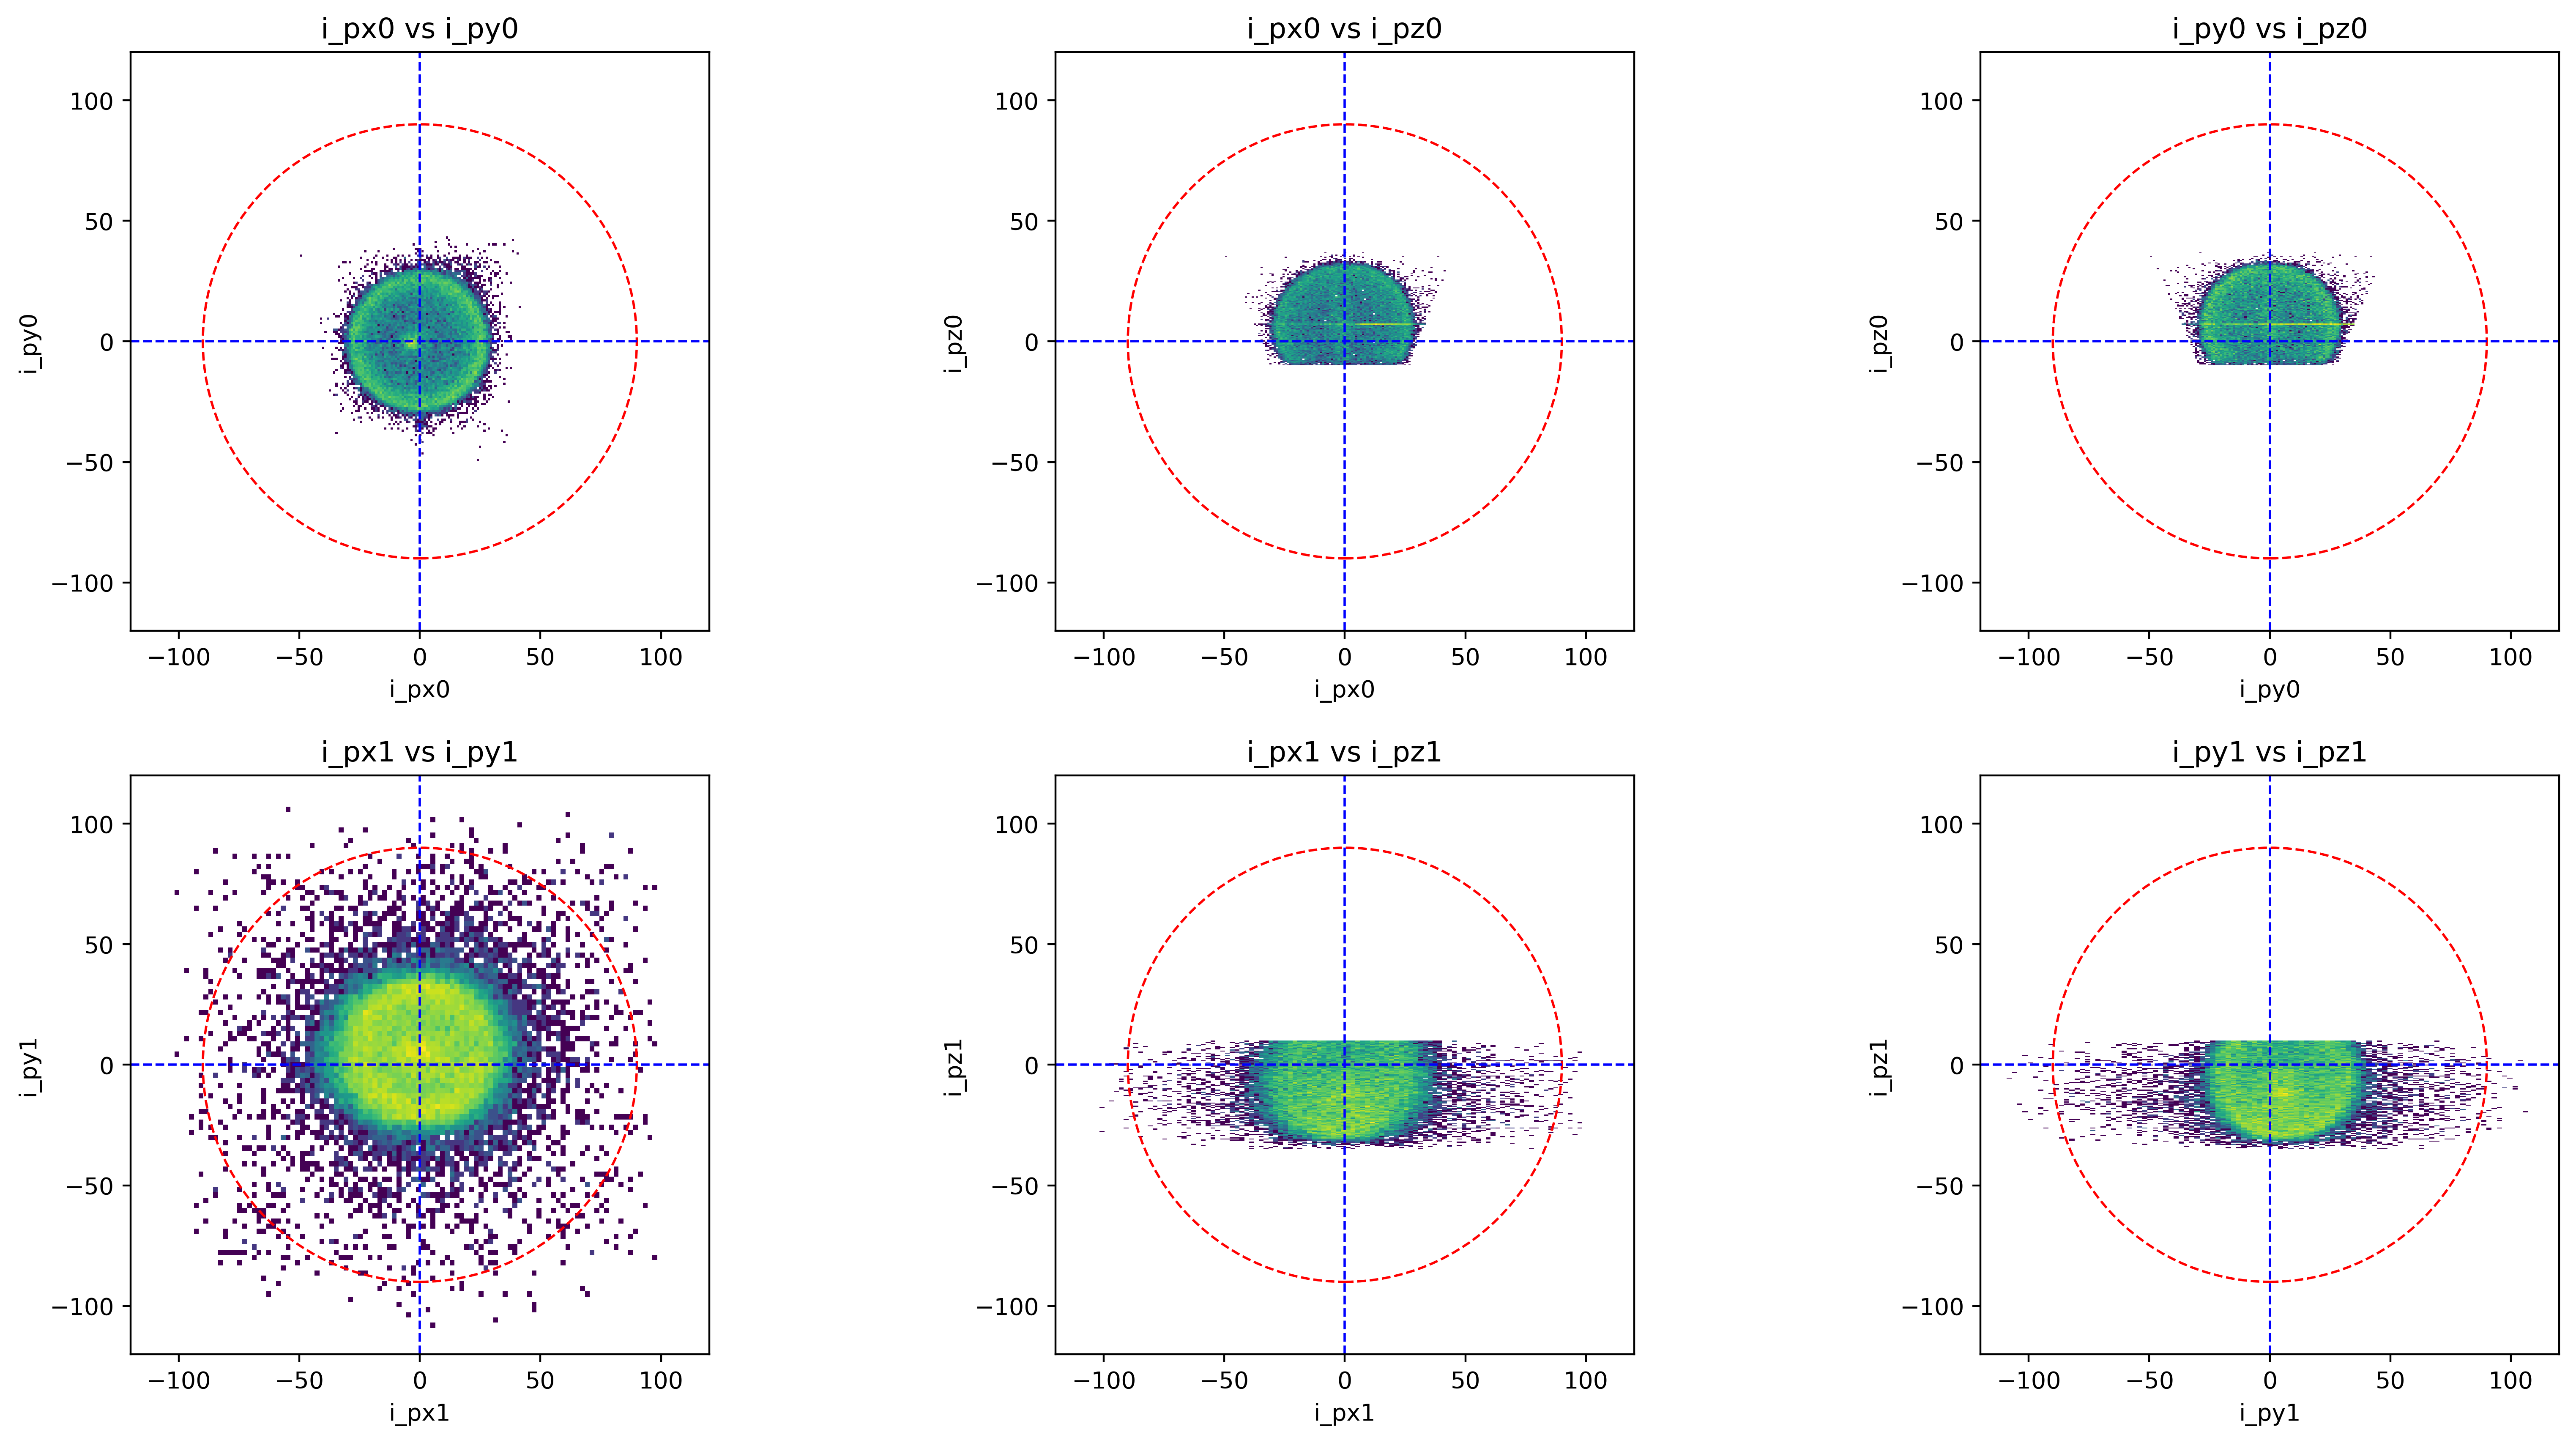

In [967]:
#######################################
#ION MOMENTUM PLOT###################
######################################
fig, axes = plt.subplots(2,3,figsize=(20,10), dpi=400)
data = [i_px0, i_py0, i_pz0, i_px1, i_py1, i_pz1]

axes[0,0].hist2d(i_px0, i_py0, bins=(100,100), norm=LogNorm());
axes[0,1].hist2d(i_px0, i_pz0, bins=(100,100), norm=LogNorm());
axes[0,2].hist2d(i_py0, i_pz0, bins=(100,100), norm=LogNorm());
axes[1,0].hist2d(i_px1, i_py1, bins=(100,100), norm=LogNorm());
axes[1,1].hist2d(i_px1, i_pz1, bins=(100,100), norm=LogNorm());
axes[1,2].hist2d(i_py1, i_pz1, bins=(100,100), norm=LogNorm());

axes[0, 0].set_title('i_px0 vs i_py0')
axes[0, 1].set_title('i_px0 vs i_pz0')
axes[0, 2].set_title('i_py0 vs i_pz0')
axes[1, 0].set_title('i_px1 vs i_py1')
axes[1, 1].set_title('i_px1 vs i_pz1')
axes[1, 2].set_title('i_py1 vs i_pz1')

axes[0, 0].set_xlabel('i_px0')
axes[0, 1].set_xlabel('i_px0')
axes[0, 2].set_xlabel('i_py0')
axes[1, 0].set_xlabel('i_px1')
axes[1, 1].set_xlabel('i_px1')
axes[1, 2].set_xlabel('i_py1')

axes[0, 0].set_ylabel('i_py0')
axes[0, 1].set_ylabel('i_pz0')
axes[0, 2].set_ylabel('i_pz0')
axes[1, 0].set_ylabel('i_py1')
axes[1, 1].set_ylabel('i_pz1')
axes[1, 2].set_ylabel('i_pz1')


for ax in axes.flatten():
    ax.set_aspect('equal')
    ax.set_xlim(-120, 120)
    ax.set_ylim(-120, 120)
    ax.axhline(0, color='blue', linestyle='--', linewidth=1)
    ax.axvline(0, color='blue', linestyle='--', linewidth=1)
    circle = Circle((0, 0), radius=90, color='red', fill=False, linestyle='dashed', linewidth=1)
    ax.add_patch(circle)

plt.subplots_adjust(hspace=0.25)


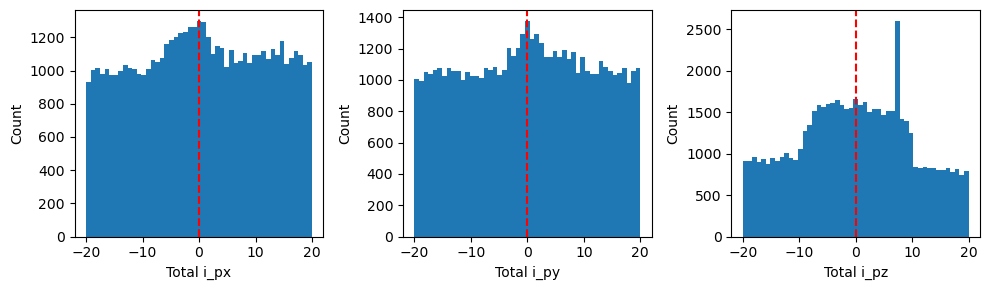

In [968]:
########################################
### ion 1 1-D momentum distributions ###
########################################

bin_left = -20
bin_right = 20

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,3))
ax1.hist((np.concatenate((i_px0,i_px1))), bins=np.linspace(bin_left,bin_right,50))
ax1.axvline(0,c='r',ls='--')
ax1.set_xlabel('Total i_px')
ax1.set_ylabel('Count')
ax2.hist((np.concatenate((i_py0,i_py1))), bins=np.linspace(bin_left,bin_right,50))
ax2.axvline(0,c='r',ls='--')
ax2.set_xlabel('Total i_py')
ax2.set_ylabel('Count')
ax3.hist((np.concatenate((i_pz0,i_pz1))), bins=np.linspace(bin_left,bin_right,50))
ax3.axvline(0,c='r',ls='--')
ax3.set_xlabel('Total i_pz')
ax3.set_ylabel('Count')

fig.tight_layout()
#fig.show()

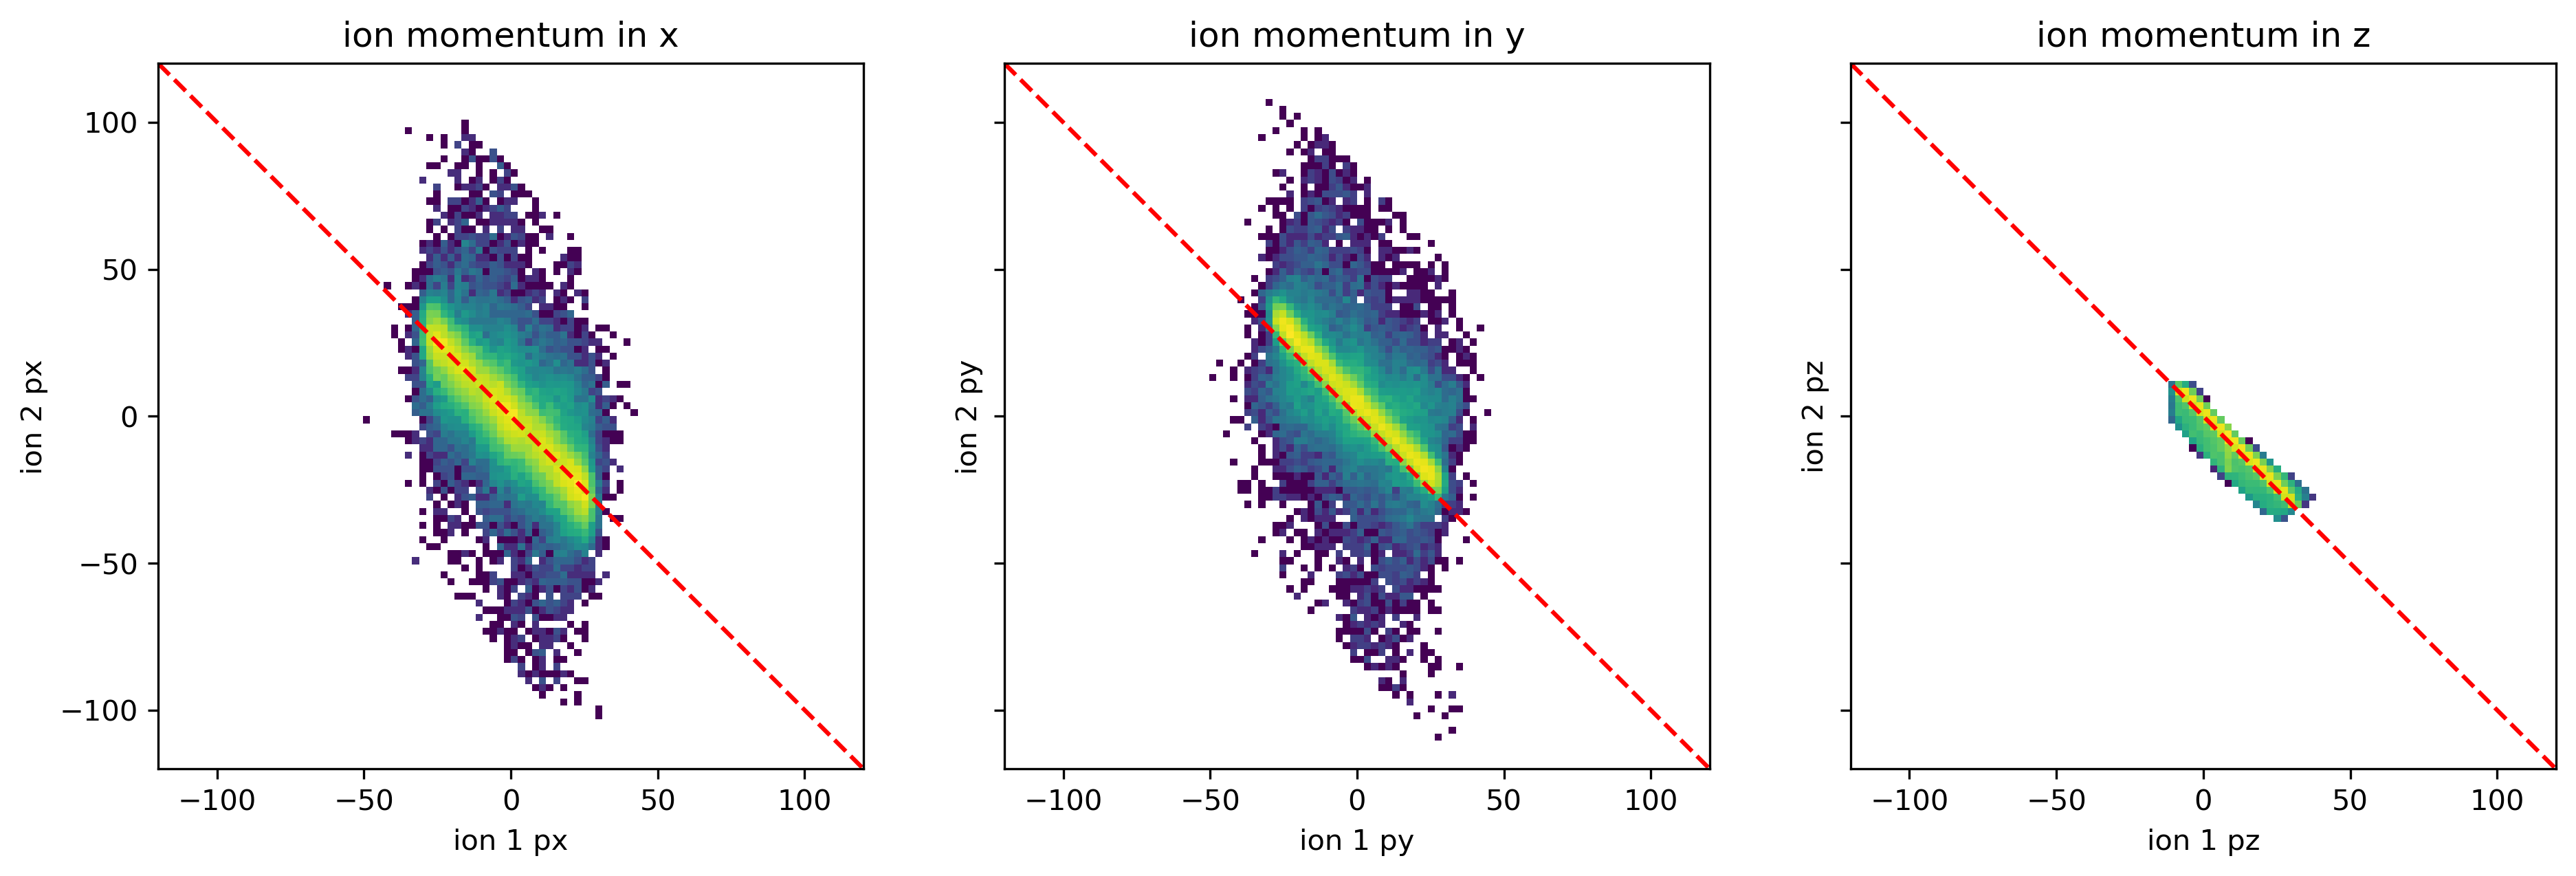

In [969]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-120, 120)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(i_px0, i_px1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('ion momentum in x')
axs[0].set_xlabel('ion 1 px')
axs[0].set_ylabel('ion 2 px')


hist2 = axs[1].hist2d(i_py0, i_py1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('ion momentum in y')
axs[1].set_xlabel('ion 1 py')
axs[1].set_ylabel('ion 2 py')

hist3 = axs[2].hist2d(i_pz0, i_pz1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('ion momentum in z');
axs[2].set_xlabel('ion 1 pz');
axs[2].set_ylabel('ion 2 pz');

for ax in axs:
    ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

# Show the plot
plt.savefig(folder_path + "\\ion_mom_xx_yy_zz.png")

plt.show()



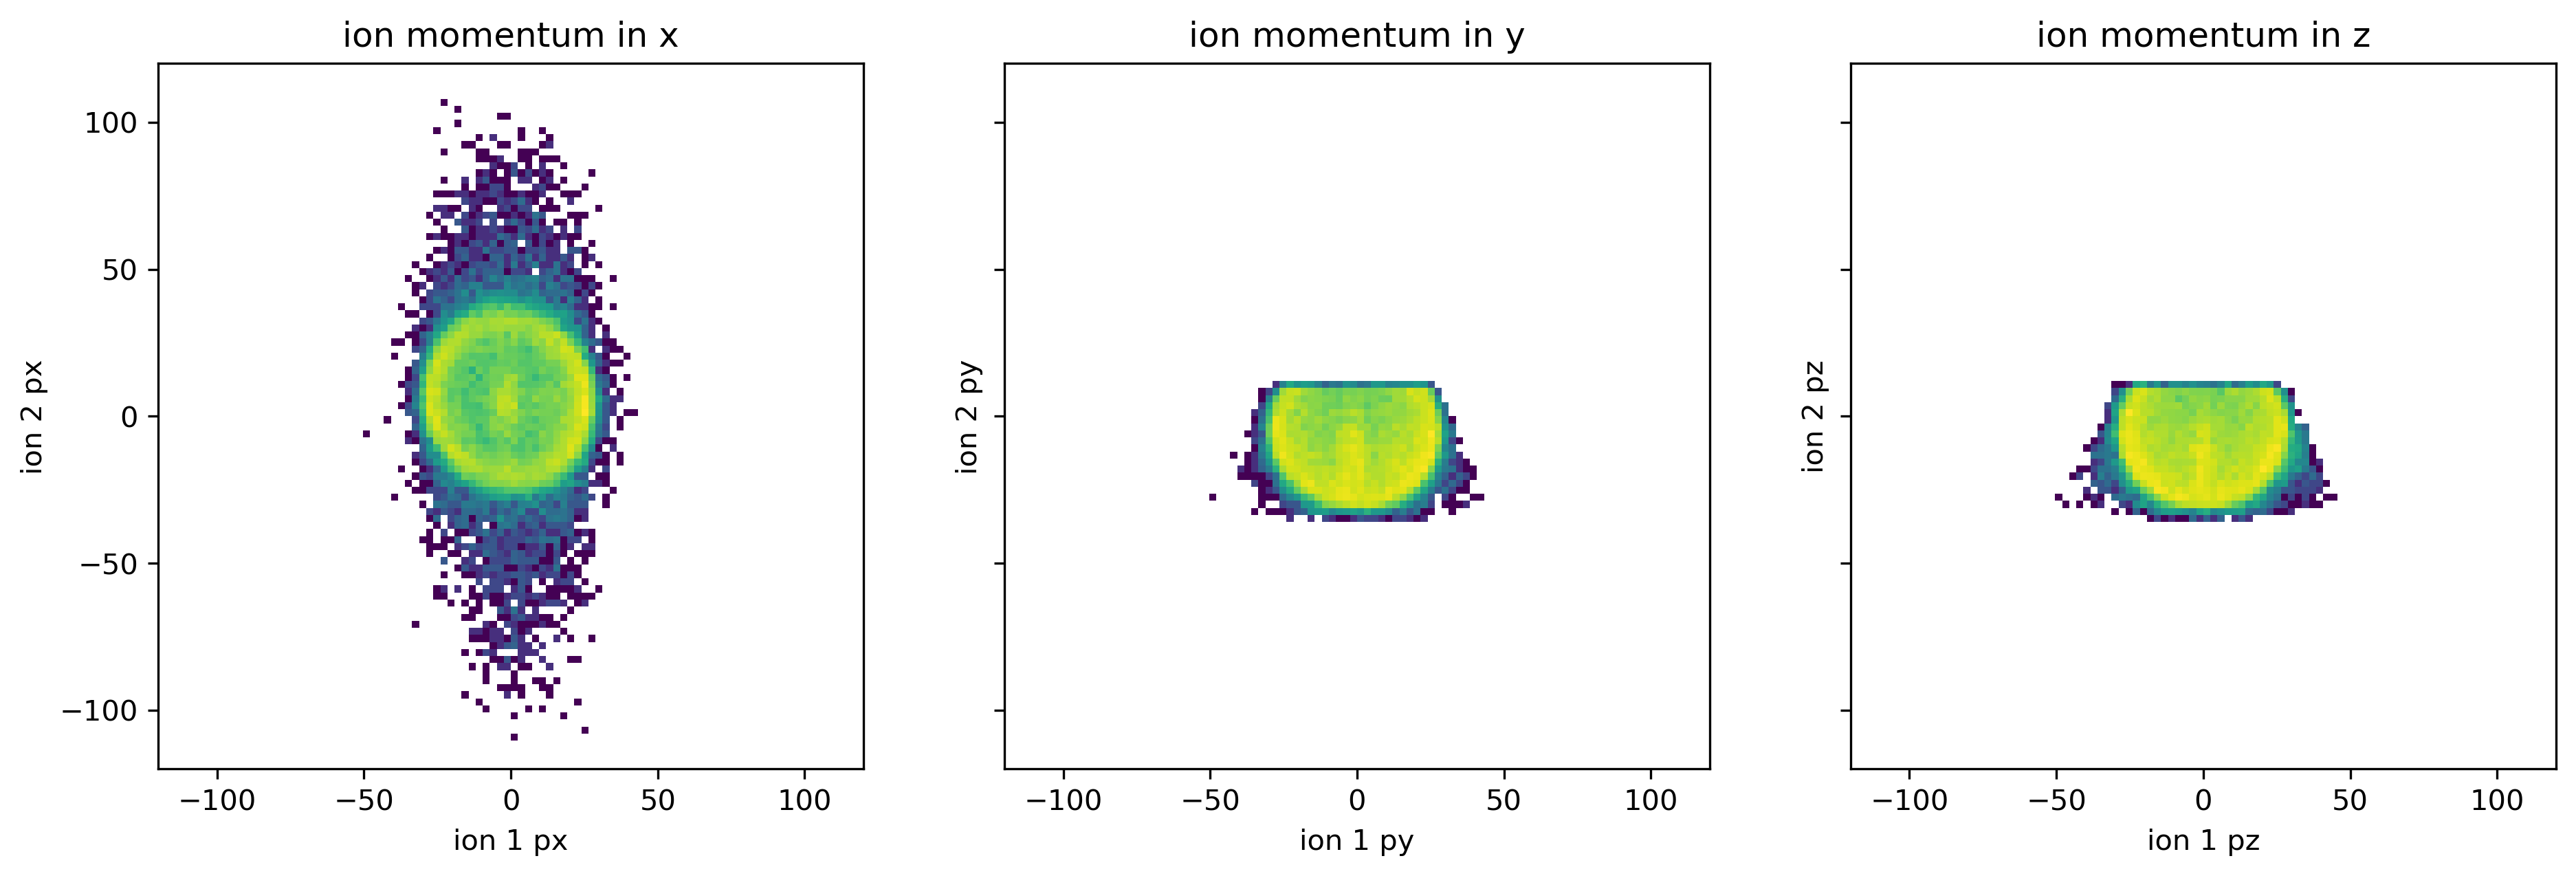

In [970]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-120, 120)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(i_px0, i_py1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('ion momentum in x')
axs[0].set_xlabel('ion 1 px')
axs[0].set_ylabel('ion 2 px')


hist2 = axs[1].hist2d(i_px0, i_pz1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('ion momentum in y')
axs[1].set_xlabel('ion 1 py')
axs[1].set_ylabel('ion 2 py')

hist3 = axs[2].hist2d(i_py0, i_pz1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('ion momentum in z');
axs[2].set_xlabel('ion 1 pz');
axs[2].set_ylabel('ion 2 pz');


# Show the plot
plt.savefig(folder_path + "\\ion_mom_xx_yy_zz.png")

plt.show()



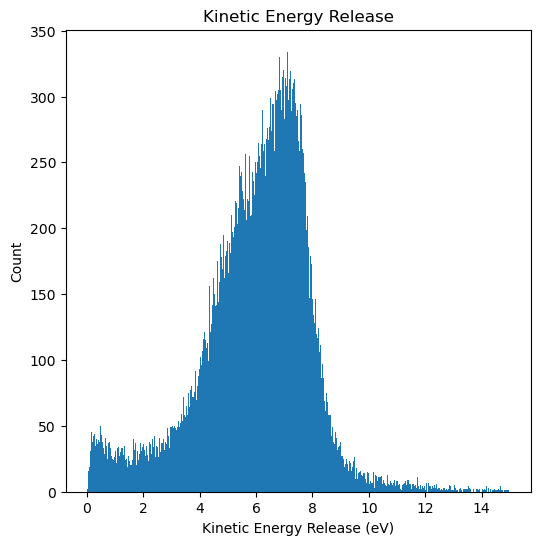

In [971]:
p1 = np.sqrt((i_px0**2+i_py0**2+i_pz0**2))
p2 = np.sqrt((i_px1**2+i_py1**2+i_pz1**2))
KE1 = p1*p1/(2*m1)/MASSAU*EVAU;
KE2 = p2*p2/(2*m2)/MASSAU*EVAU;
if number_of_fragment == 1:
    KER = KE1
elif number_of_fragment == 2: 
    KER = KE1+KE2;


plt.figure(figsize=(6, 6), dpi=100)
# KE1 = 1/(2*14)*np.sqrt((i_px0**2+i_py0**2+i_pz0**2))
# KE2 = 1/(2*14)*np.sqrt((i_px1**2+i_py1**2+i_pz1**2))
# KER = (KE1+KE2)
plt.hist(KER,bins=500, range=(0,15));

# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Count');
plt.title('Kinetic Energy Release');

plt.savefig(folder_path + "\\ion_KER.png")

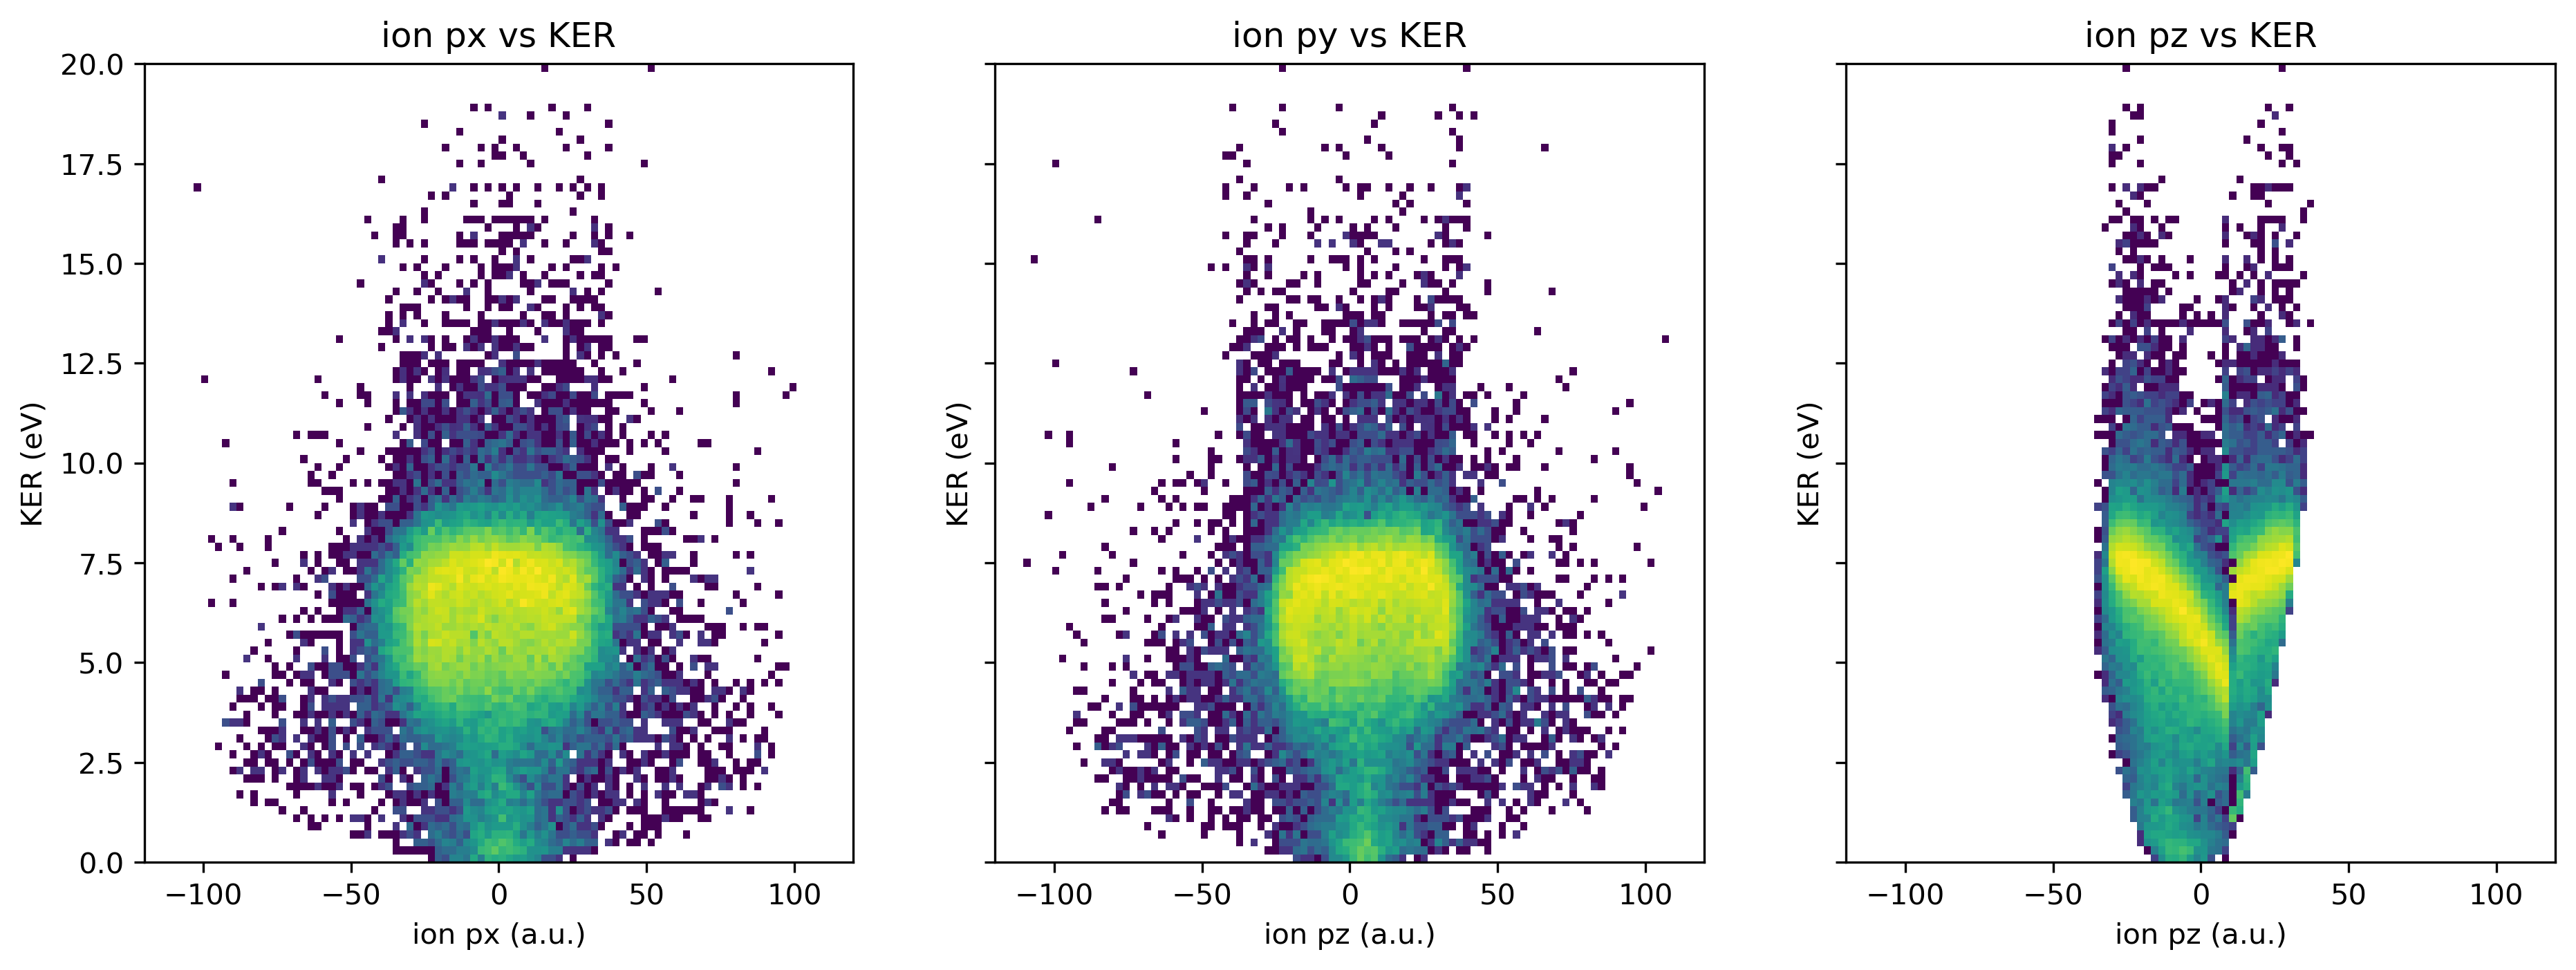

In [972]:
#######################################
#ION MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-120, 120)
y_range = (0, 20)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(i_px0, KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist1 = axs[0].hist2d(i_px1, KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[0].set_aspect('equal')
axs[0].set_title('ion px vs KER');
axs[0].set_xlabel('ion px (a.u.)');
axs[0].set_ylabel('KER (eV)');


hist2 = axs[1].hist2d(i_py0, KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist2 = axs[1].hist2d(i_py1, KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[1].set_aspect('equal')
axs[1].set_title('ion py vs KER');
axs[1].set_xlabel('ion pz (a.u.)');
axs[1].set_ylabel('KER (eV)');

hist3 = axs[2].hist2d(i_pz0, KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist3 = axs[2].hist2d(i_pz1, KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[2].set_aspect('equal')
axs[2].set_title('ion pz vs KER');
axs[2].set_xlabel('ion pz (a.u.)');
axs[2].set_ylabel('KER (eV)');

plt.savefig(folder_path+"\\ion_mom_vs_KER.png")

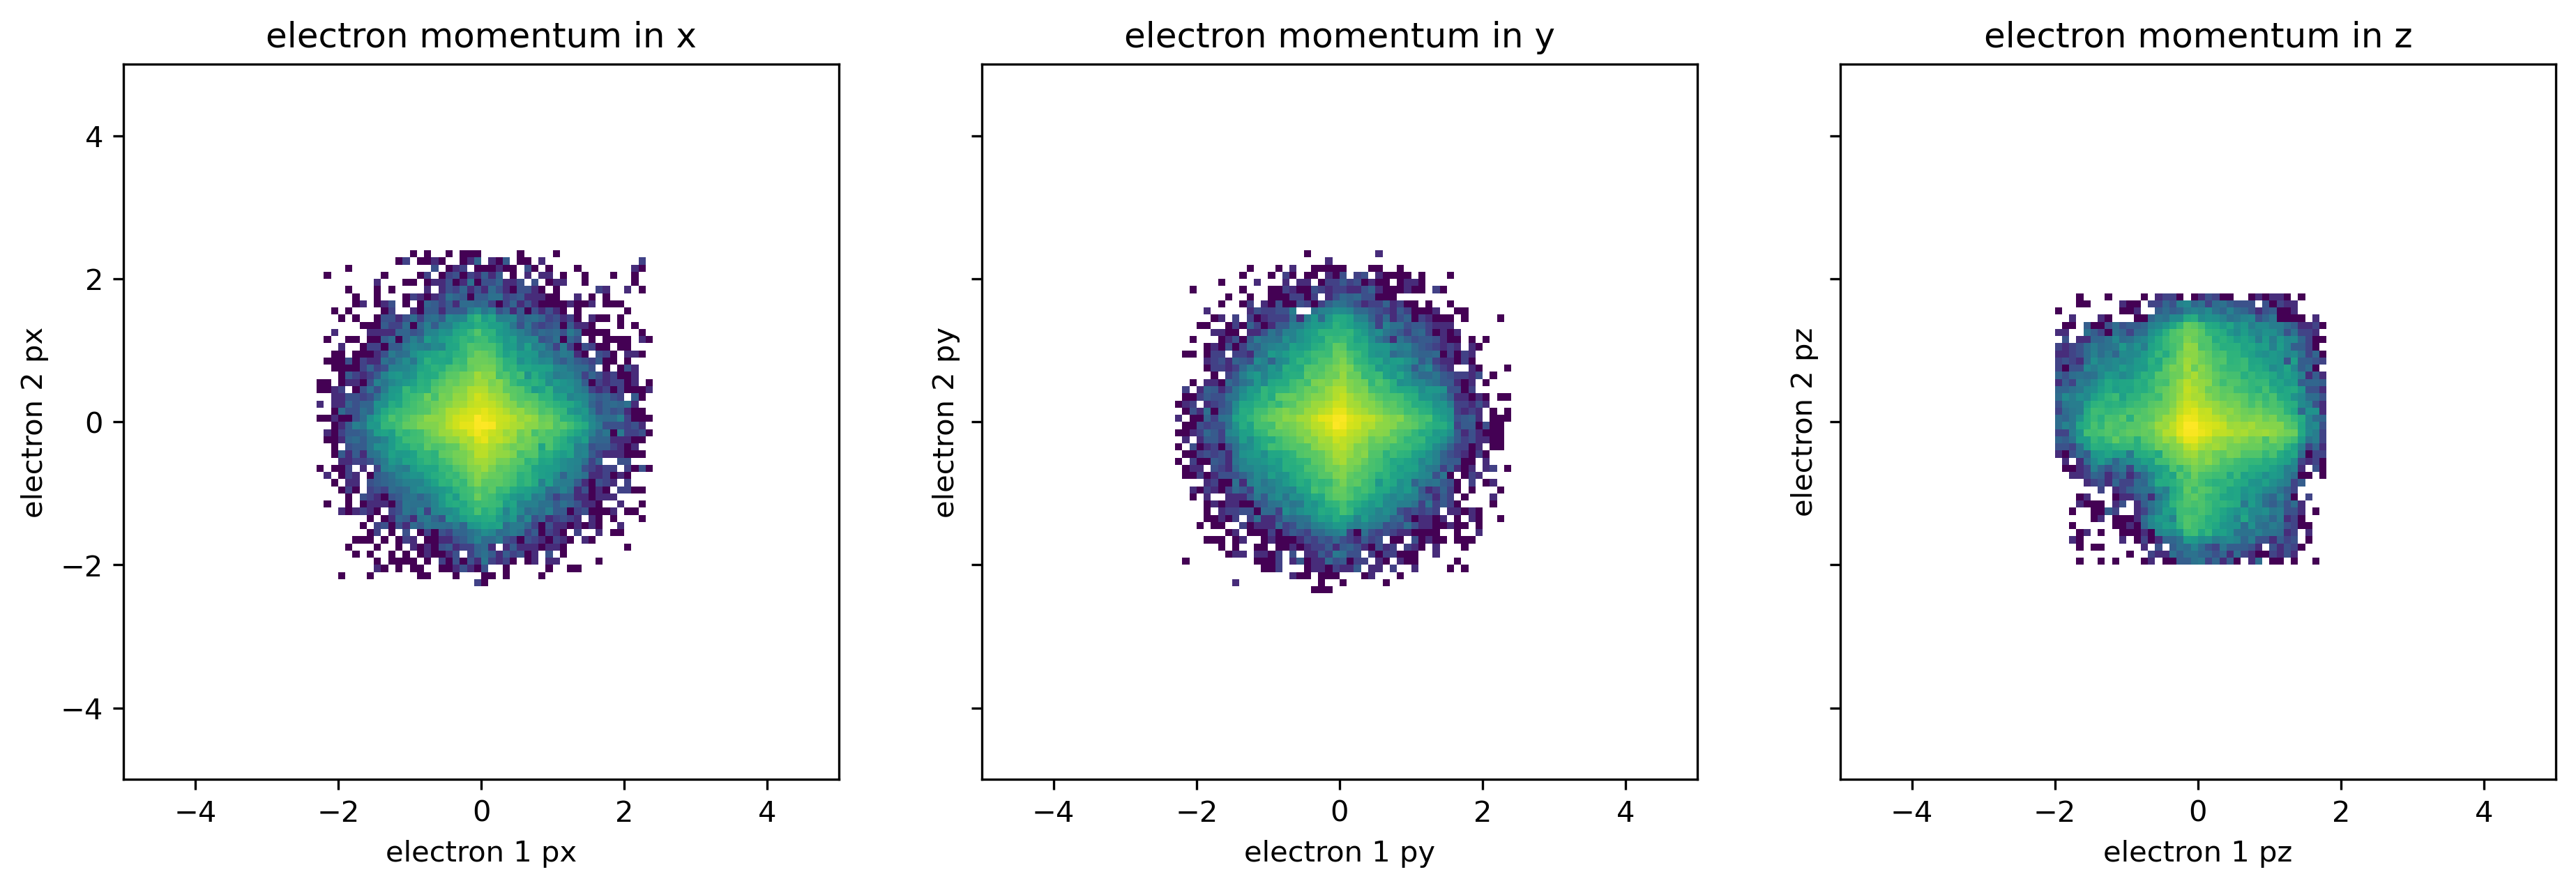

In [973]:
#######################################
#ION MOMENTUM PLOT###################
######################################
# Determine the data range
x_range = (-5, 5)
y_range = (-5, 5)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, e_px1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[0].set_aspect('equal')
axs[0].set_title('electron momentum in x')
axs[0].set_xlabel('electron 1 px')
axs[0].set_ylabel('electron 2 px')


hist2 = axs[1].hist2d(e_py0, e_py1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[1].set_aspect('equal')
axs[1].set_title('electron momentum in y')
axs[1].set_xlabel('electron 1 py')
axs[1].set_ylabel('electron 2 py')

hist3 = axs[2].hist2d(e_pz0, e_pz1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
axs[2].set_aspect('equal');
axs[2].set_title('electron momentum in z');
axs[2].set_xlabel('electron 1 pz');
axs[2].set_ylabel('electron 2 pz');

#for ax in axs:
    #ax.plot([x_range[0], x_range[1]], [y_range[1], y_range[0]], color='red', linestyle='--')

# Show the plot
plt.show()

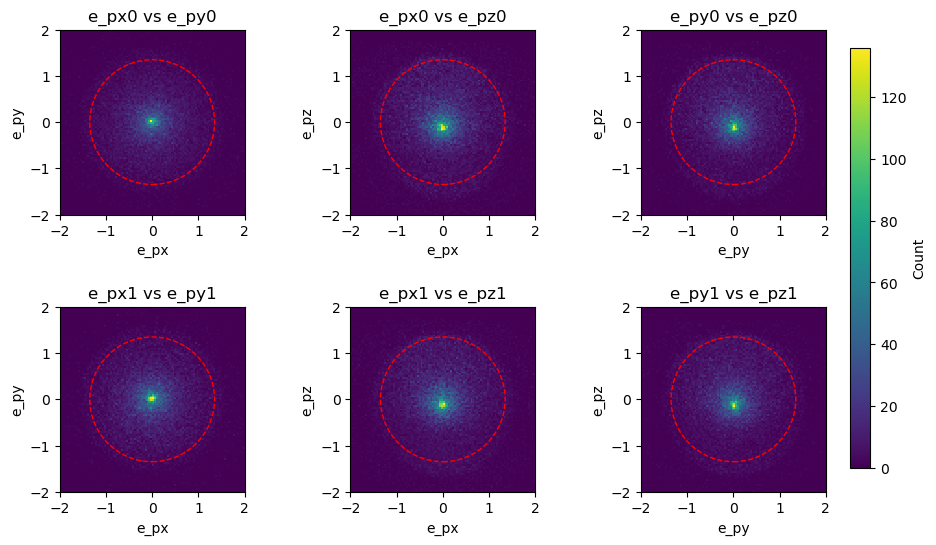

In [974]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Assuming e_px0, e_py0, e_pz0, e_px1, e_py1, e_pz1 are defined

x_range = (-2, 2)
y_range = (-2, 2)

hist_kwargs = {
    'bins': (100, 100),
    'range': [x_range, y_range]
}

data_list = [
    (e_px0, e_py0), (e_px0, e_pz0), (e_py0, e_pz0),
    (e_px1, e_py1), (e_px1, e_pz1), (e_py1, e_pz1)
]

titles = [
    'e_px0 vs e_py0', 'e_px0 vs e_pz0', 'e_py0 vs e_pz0',
    'e_px1 vs e_py1', 'e_px1 vs e_pz1', 'e_py1 vs e_pz1'
]

# Collect all histogram counts
all_counts = []
for (data_x, data_y) in data_list:
    counts, _, _ = np.histogram2d(data_x, data_y, **hist_kwargs)
    all_counts.extend(counts.ravel())

# Calculate the maximum count
max_count = max(all_counts)

for ax, (data_x, data_y), title in zip(axes.flatten(), data_list, titles):
    hist = ax.hist2d(data_x, data_y, **hist_kwargs)
    ax.set_aspect('equal')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('e_px' if 'px' in title else 'e_py' if 'py' in title else 'e_pz')
    ax.set_ylabel('e_pz' if 'pz' in title else 'e_py' if 'py' in title else 'e_px')
    ax.set_title(title)
    circle = Circle((0, 0), radius=1.35, color='red', fill=False, linestyle='dashed', linewidth=1)
    ax.add_patch(circle)

# Create a color bar with a separate axis
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(hist[3], cax=cax, label='Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.savefig(folder_path + "\\e_mom_xyz.png")
plt.show()


[22.86282234 55.19173753 16.2206089  ... 10.3374779  23.2094342
  0.21365275]


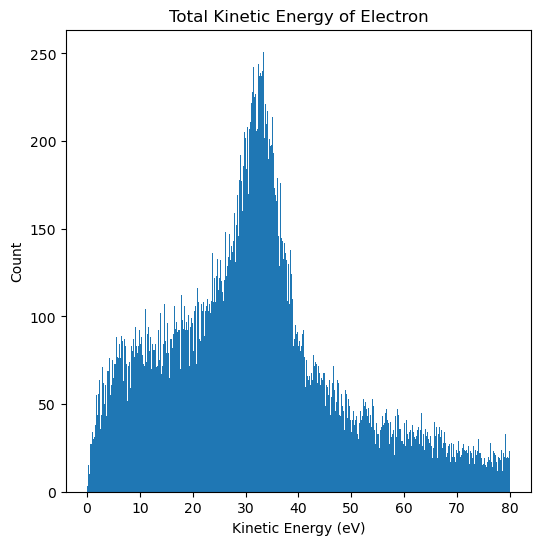

In [975]:
KEe1 = 27.2114*(e_px0**2+e_py0**2+e_pz0**2)/2;
if number_of_fragment == 1:
    KEe2 = KEe1*0
else:
    KEe2 = 27.2114*(e_px1**2+e_py1**2+e_pz1**2)/2;
KERe = KEe1+KEe2;

#total_KEe = 27.2114*(total_e_px**2+total_e_py**2+total_e_pz**2)/2;

plt.figure(figsize=(6, 6), dpi=100);
plt.hist(KERe,bins=500, range=(0,80));
print(KEe2);
# Add labels and title
plt.xlabel('Kinetic Energy (eV)');
plt.ylabel('Count');
plt.title('Total Kinetic Energy of Electron');
#plt.axvline(22,c='r',ls='--')


len(KEe1)
plt.savefig(folder_path+"\\KEe.png")

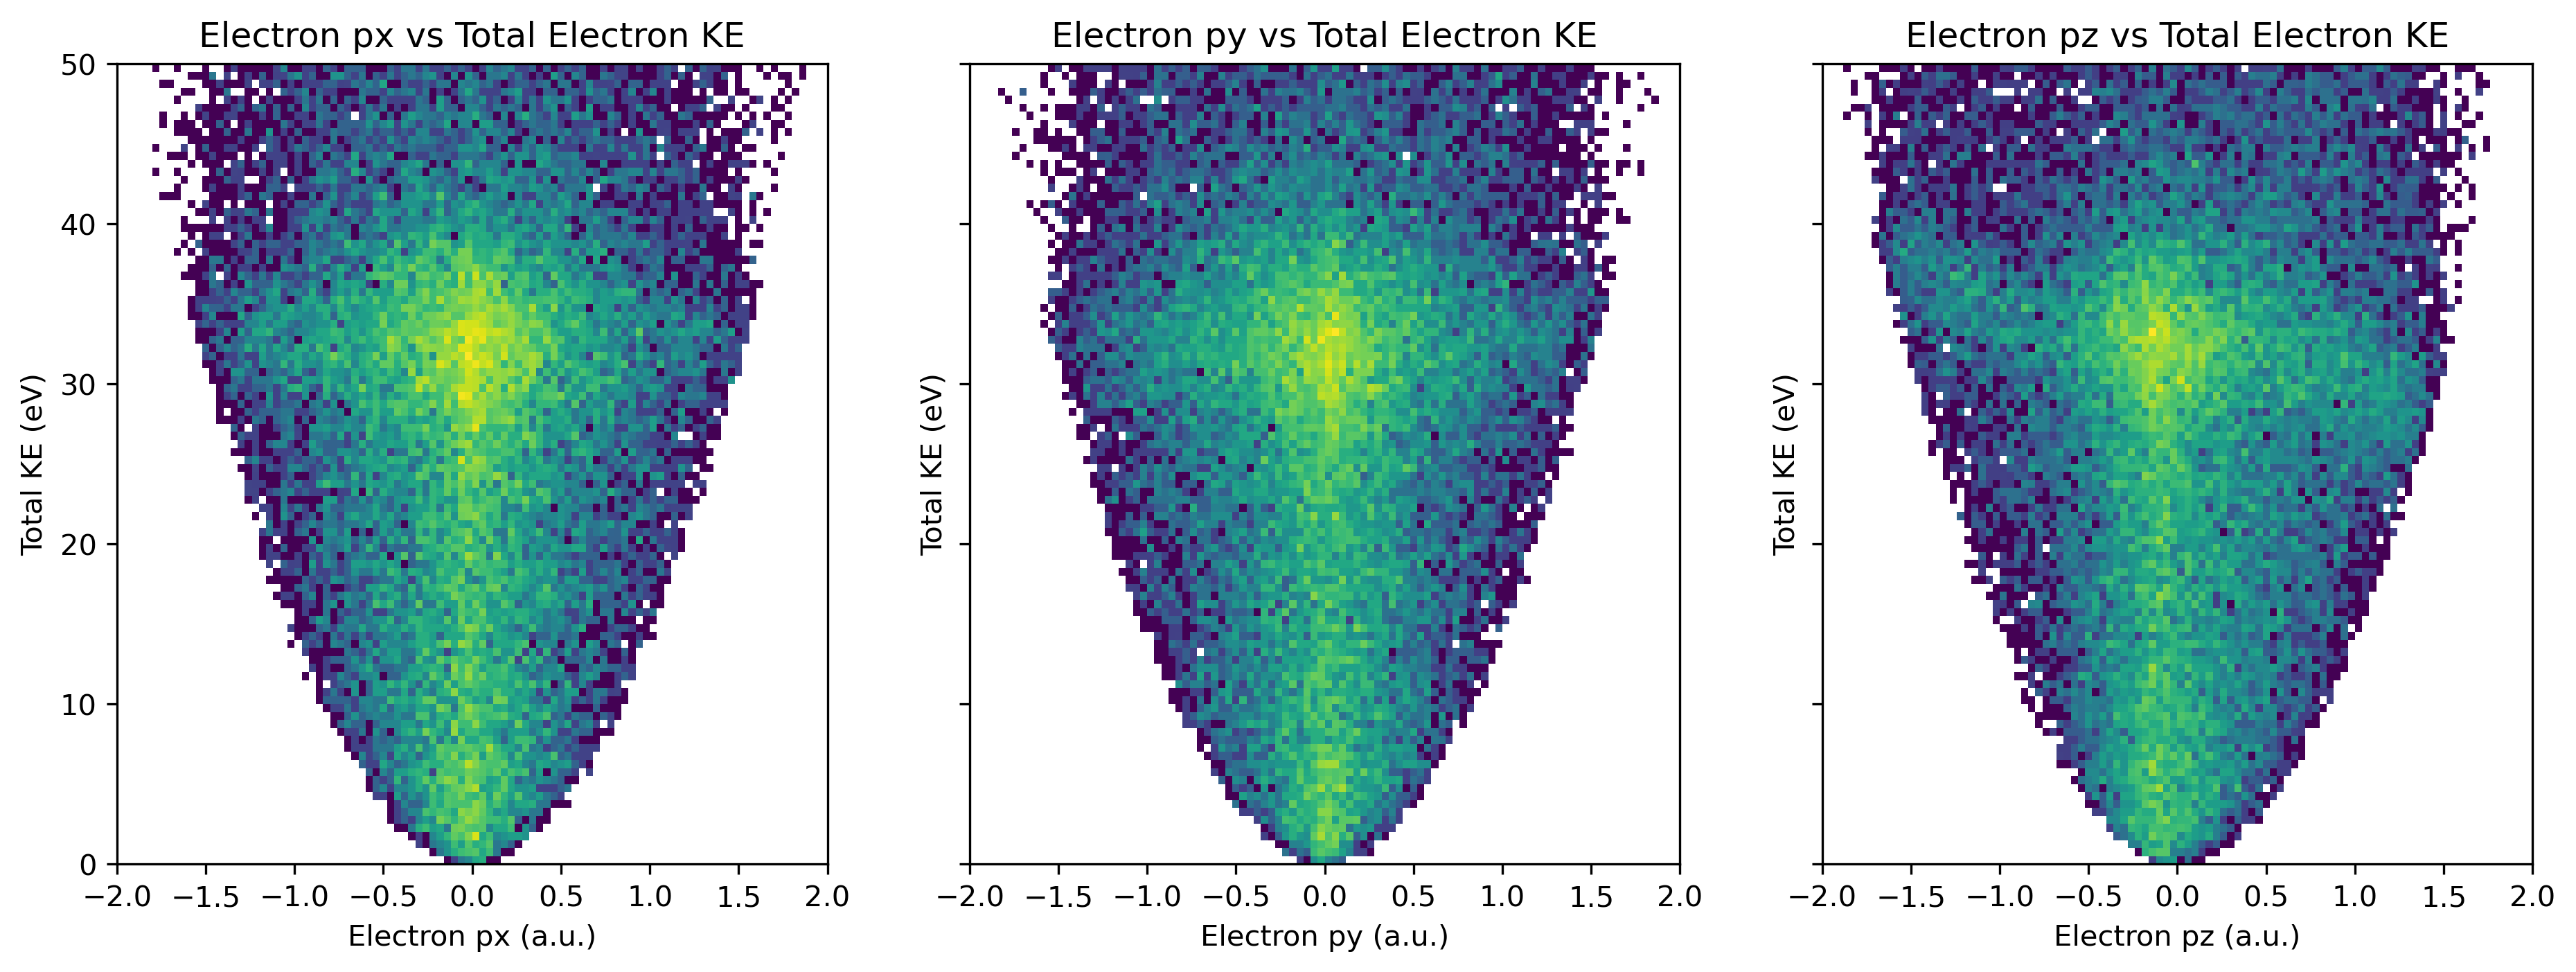

In [976]:
#######################################
#ION MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-2, 2)
y_range = (0, 50)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist1 = axs[0].hist2d(e_px1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[0].set_aspect('equal')
axs[0].set_title('Electron px vs Total Electron KE');
axs[0].set_xlabel('Electron px (a.u.)');
axs[0].set_ylabel('Total KE (eV)');


hist2 = axs[1].hist2d(e_py0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist2 = axs[1].hist2d(e_py1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[1].set_aspect('equal')
axs[1].set_title('Electron py vs Total Electron KE');
axs[1].set_xlabel('Electron py (a.u.)');
axs[1].set_ylabel('Total KE (eV)');

hist3 = axs[2].hist2d(e_pz0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist3 = axs[2].hist2d(e_pz1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[2].set_aspect('equal')
axs[2].set_title('Electron pz vs Total Electron KE');
axs[2].set_xlabel('Electron pz (a.u.)');
axs[2].set_ylabel('Total KE (eV)');

plt.savefig(folder_path+"\\e_mom_vs_KERe.png")

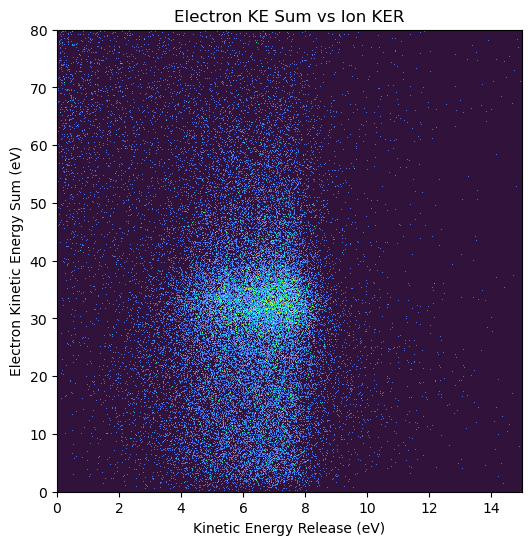

In [977]:
x_range = (0,15);
y_range = (0,80);

plt.figure(figsize=(6, 6), dpi=100);

#plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range], norm=LogNorm());
if number_of_fragment == 2:
    plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range],cmap='turbo');#, norm=LogNorm());
elif number_of_fragment == 1:
    plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range],cmap='turbo');
# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Electron Kinetic Energy Sum (eV)');
plt.title('Electron KE Sum vs Ion KER');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));
plt.savefig(folder_path+"\\KEe_vs_KER.png")

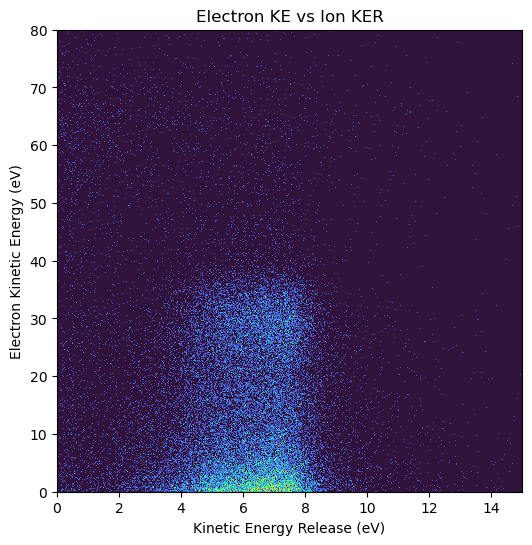

In [978]:
x_range = (0,15);
y_range = (0,80);

plt.figure(figsize=(6, 6), dpi=100);

#plt.hist2d(KER, KERe,bins=(500, 500), range=[x_range,y_range], norm=LogNorm());
if number_of_fragment == 2:
    plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
    plt.hist2d(KER, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
elif number_of_fragment == 1:
    plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
    
# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Electron Kinetic Energy (eV)');
plt.title('Electron KE vs Ion KER');
#plt.axvline(28,c='r',ls='--')


#plt.hist2d(KER, KERe, bins=(100,100));
plt.savefig(folder_path+"\\KEe_vs_KER.png")

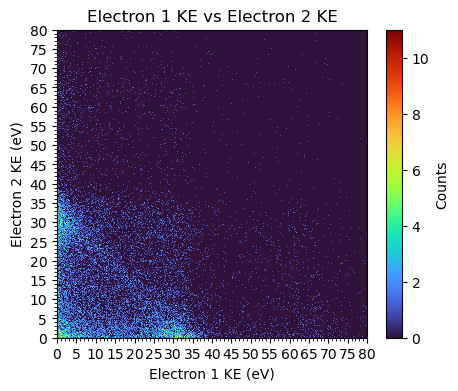

In [979]:
x_range = (0,80);
y_range = (0,80);


plt.figure(figsize=(5,4), dpi=100);
plt.hist2d(KEe1, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
# Add labels and title
plt.xlabel('Electron 1 KE (eV)');
plt.ylabel('Electron 2 KE (eV)');
plt.title('Electron 1 KE vs Electron 2 KE');
#ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the font size of major tick labels
#ax.tick_params(axis='both', which='minor', labelsize=10)  # Adjust the font size of minor tick labels
#ax.tick_params(direction='inout', length=6, width=1, colors='black', grid_color='r', grid_alpha=0.5)
#plt.axvline(28,c='r',ls='--')
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.colorbar(label='Counts')
#plt.hist2d(KER, KERe, bins=(100,100));


In [980]:
e_px0_b4 = e_px0
e_py0_b4 = e_py0
e_pz0_b4 = e_pz0
e_px1_b4 = e_px1
e_py1_b4 = e_py1
e_pz1_b4 = e_pz1

i_px0_b4 = i_px0
i_py0_b4 = i_py0
i_pz0_b4 = i_pz0
i_px1_b4 = i_px1
i_py1_b4 = i_py1
i_pz1_b4 = i_pz1

## KER Filter

In [981]:
# KER_filter = (KER > 2)
# KE_filter = (KERe > 20) & (KERe < 50)
# Energy_filter = KER_filter & KE_filter

# e_px0 = e_px0_b4[Energy_filter]
# e_py0 = e_py0_b4[Energy_filter]
# e_pz0 = e_pz0_b4[Energy_filter]
# e_px1 = e_px1_b4[Energy_filter]
# e_py1 = e_py1_b4[Energy_filter]
# e_pz1 = e_pz1_b4[Energy_filter]

# i_px0 = i_px0_b4[Energy_filter]
# i_py0 = i_py0_b4[Energy_filter]
# i_pz0 = i_pz0_b4[Energy_filter]
# i_px1 = i_px1_b4[Energy_filter]
# i_py1 = i_py1_b4[Energy_filter]
# i_pz1 = i_pz1_b4[Energy_filter]

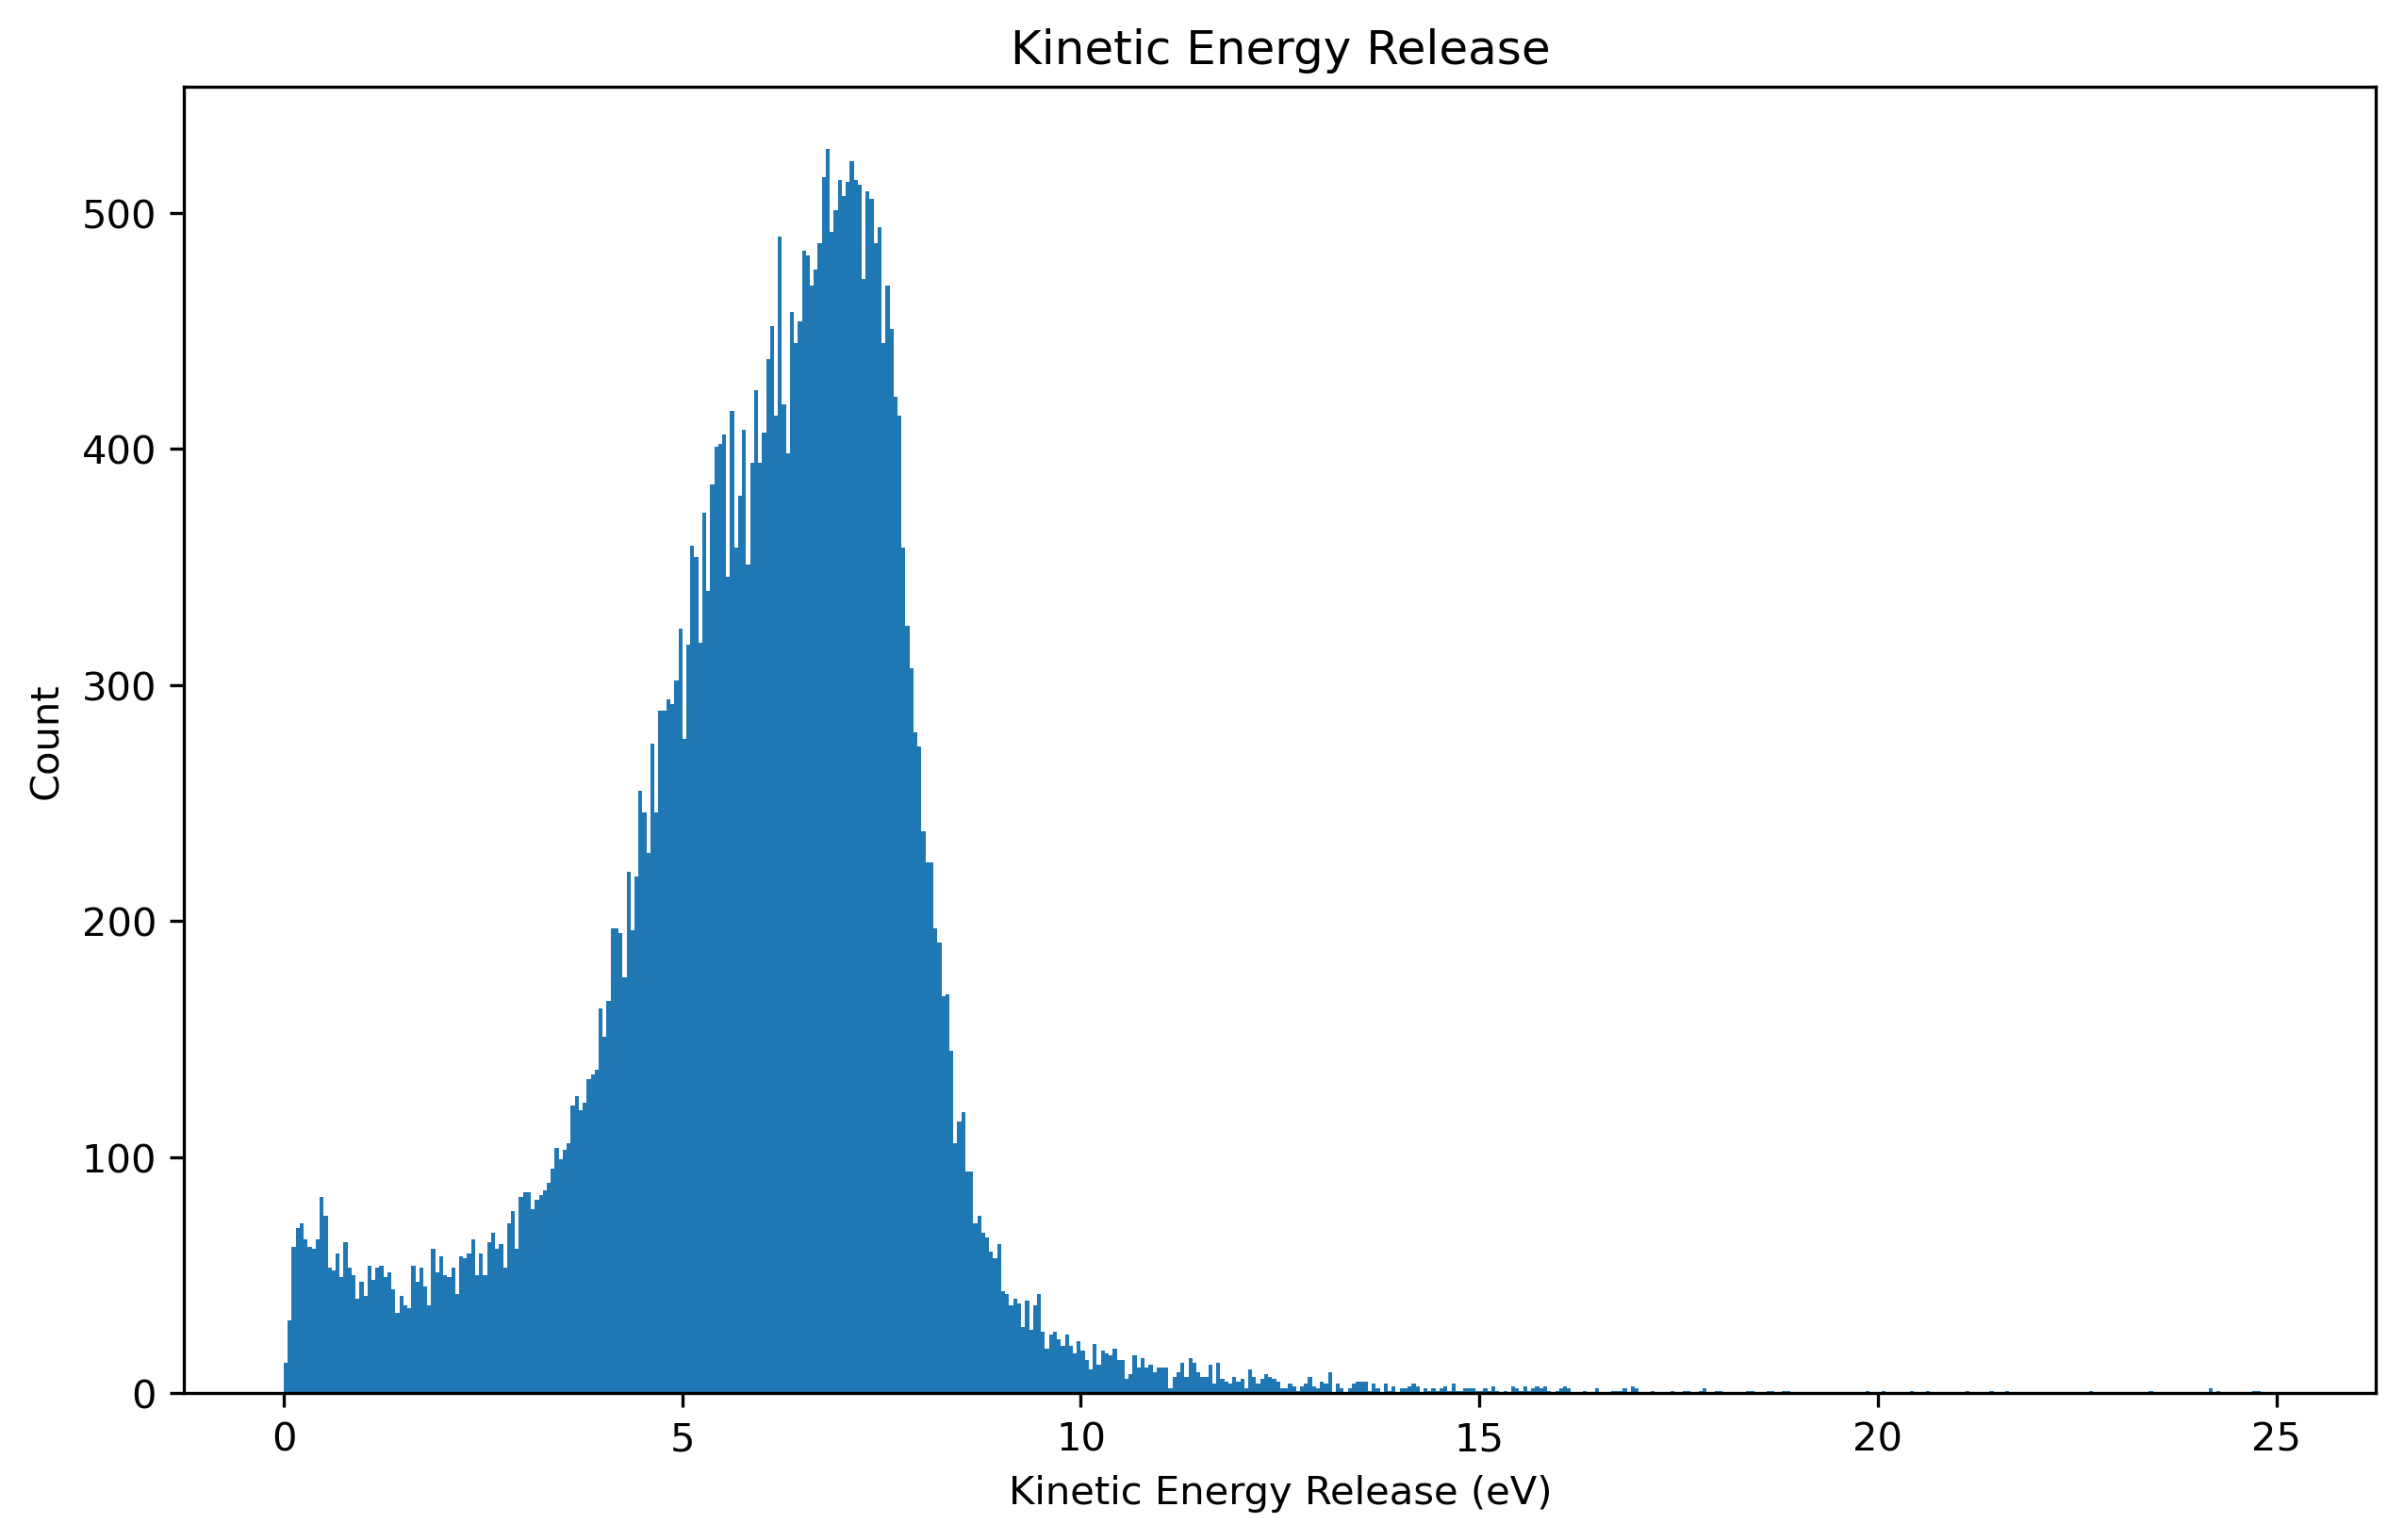

In [982]:
p1 = np.sqrt((i_px0**2+i_py0**2+i_pz0**2))
p2 = np.sqrt((i_px1**2+i_py1**2+i_pz1**2))
KE1 = p1*p1/(2*m1)/MASSAU*EVAU;
KE2 = p2*p2/(2*m2)/MASSAU*EVAU;
KER = KE1+KE2;

KEe1 = 27.2114*(e_px0**2+e_py0**2+e_pz0**2)/2;
if number_of_fragment == 1:
    KEe2 = 0
else:
    KEe2 = 27.2114*(e_px1**2+e_py1**2+e_pz1**2)/2;
KERe = KEe1+KEe2;

plt.figure(figsize=(10, 6), dpi=300)
plt.hist(KER,bins=500, range=(0,25));

# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Count');
plt.title('Kinetic Energy Release');

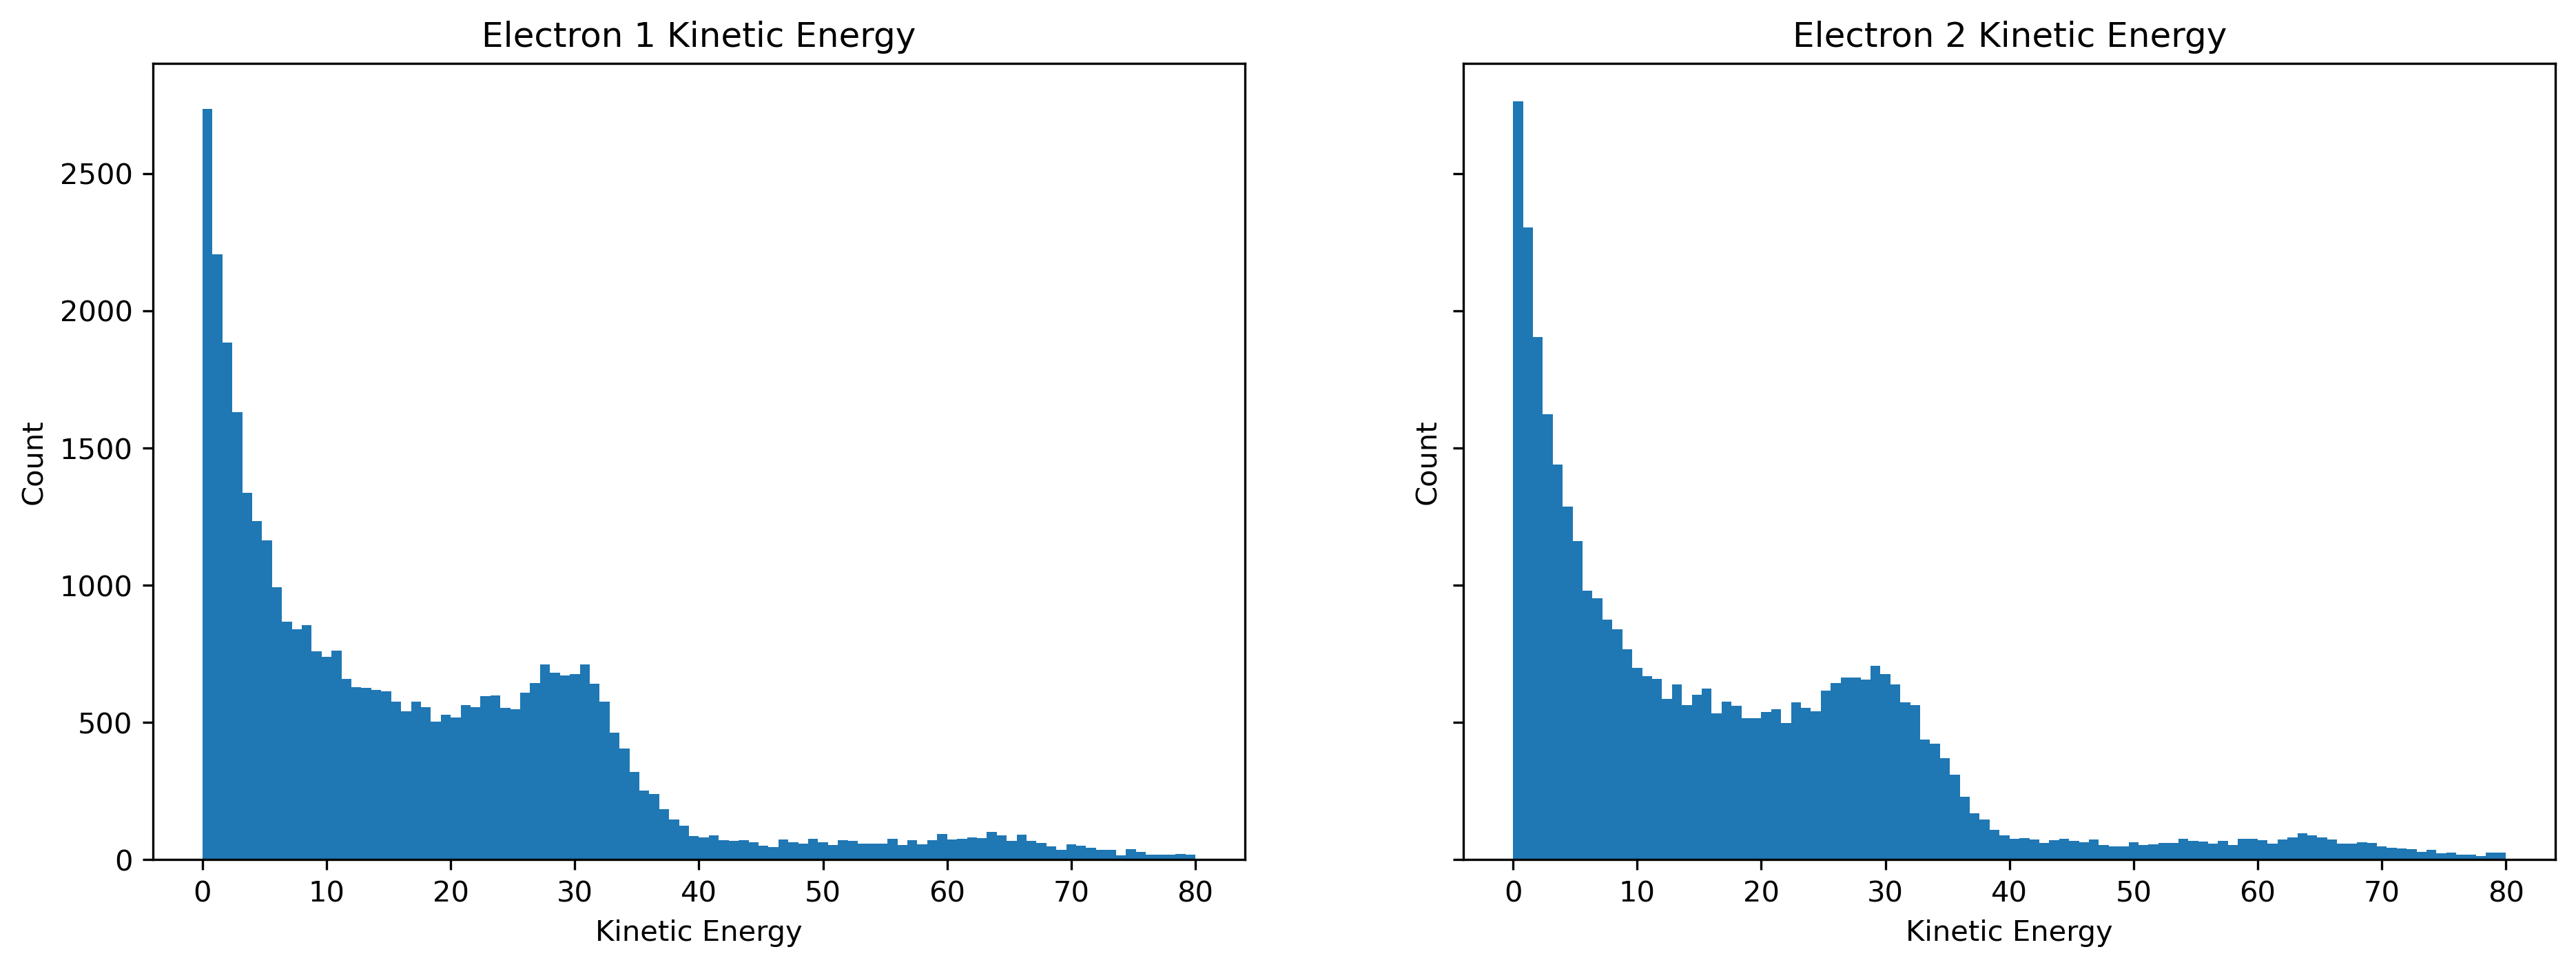

In [983]:
#######################################
#ELECTRON KE PLOT###################
######################################

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist(KEe1, bins=100, range=(0, 80));
axs[0].set_title('Electron 1 Kinetic Energy');
axs[0].set_xlabel('Kinetic Energy');
axs[0].set_ylabel('Count');


hist2 = axs[1].hist(KEe2,bins=100, range=(0, 80));
axs[1].set_title('Electron 2 Kinetic Energy');
axs[1].set_xlabel('Kinetic Energy');
axs[1].set_ylabel('Count');


[22.86282234 55.19173753 16.2206089  ... 10.3374779  23.2094342
  0.21365275]


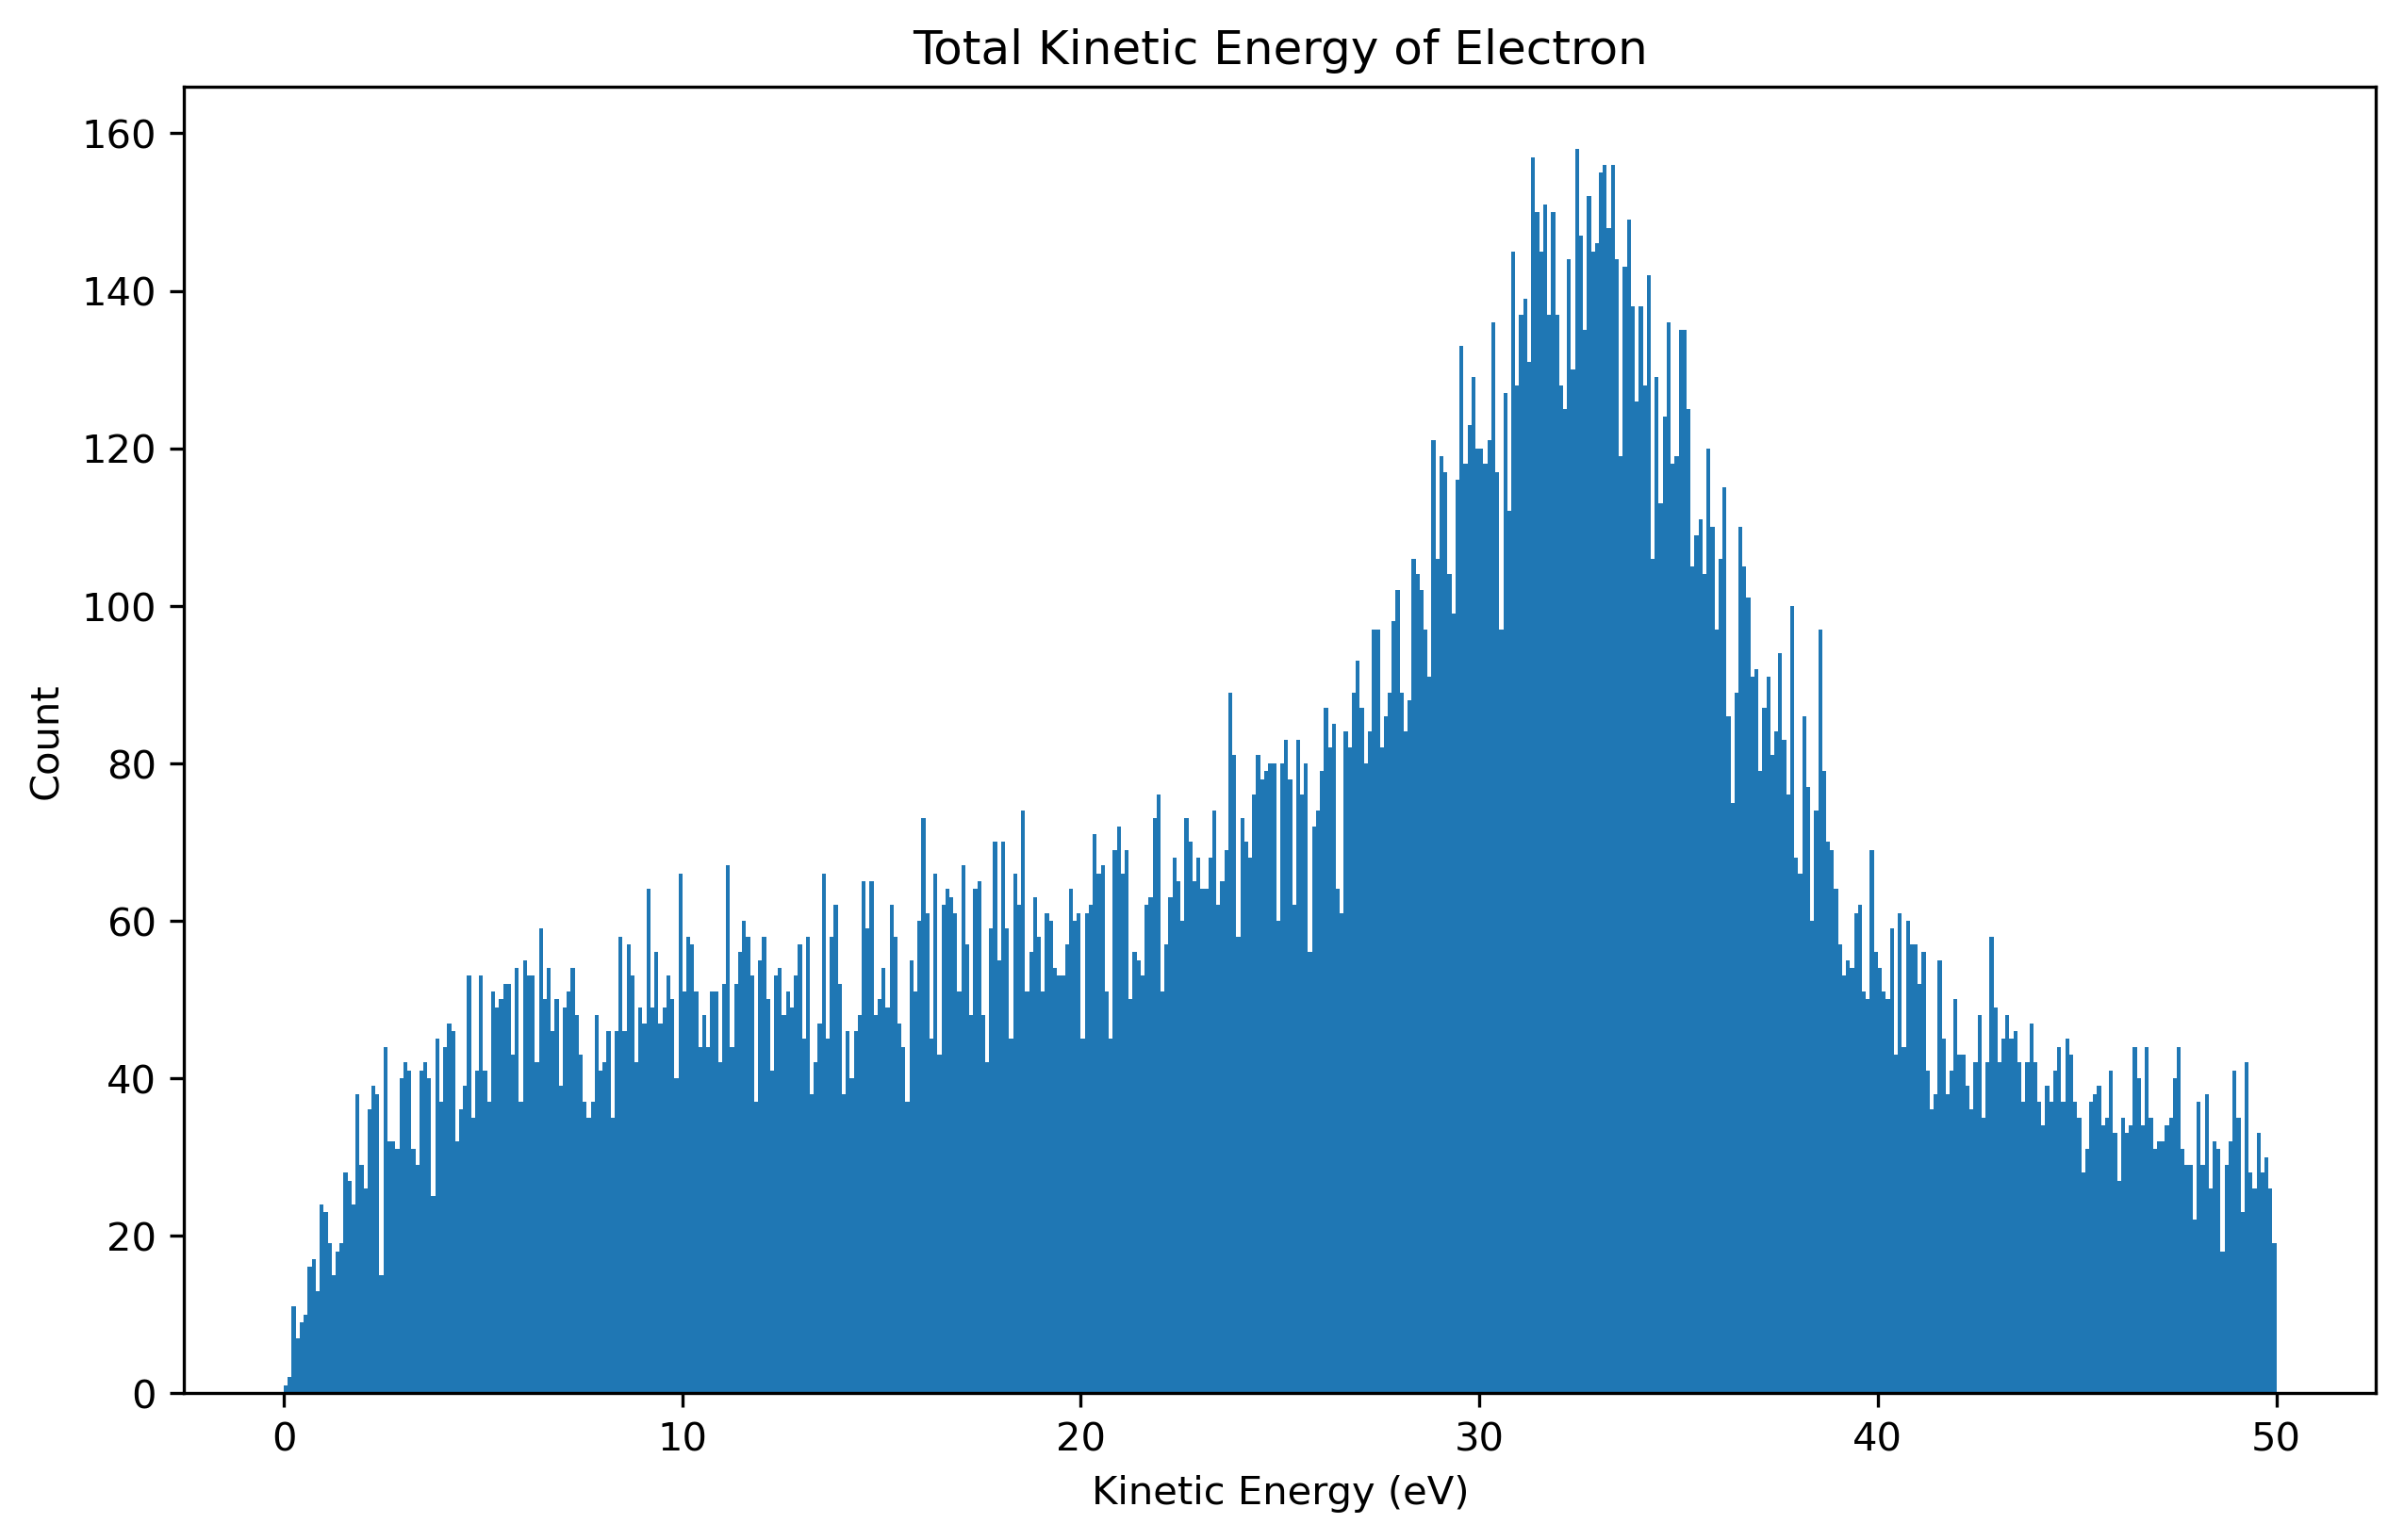

In [984]:
KEe1 = 27.2114*(e_px0**2+e_py0**2+e_pz0**2)/2;
if number_of_fragment == 1:
    KEe2 = 0
else:
    KEe2 = 27.2114*(e_px1**2+e_py1**2+e_pz1**2)/2;
KERe = KEe1+KEe2;

#total_KEe = 27.2114*(total_e_px**2+total_e_py**2+total_e_pz**2)/2;

plt.figure(figsize=(10, 6), dpi=300);
plt.hist(KERe,bins=500, range=(0,50));
print(KEe2);
# Add labels and title
plt.xlabel('Kinetic Energy (eV)');
plt.ylabel('Count');
plt.title('Total Kinetic Energy of Electron');
#plt.axvline(28,c='r',ls='--')


len(KEe1)
plt.savefig(folder_path+"\\KEe.png")

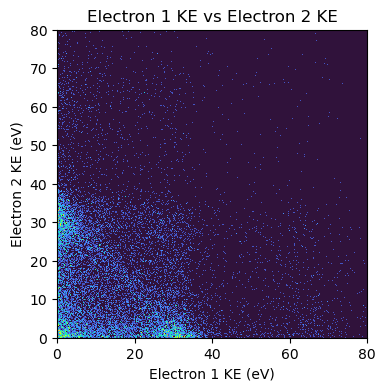

In [985]:
x_range = (0,80);
y_range = (0,80);

plt.figure(figsize=(4, 4), dpi=100);
plt.hist2d(KEe1, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo');
# Add labels and title
plt.xlabel('Electron 1 KE (eV)');
plt.ylabel('Electron 2 KE (eV)');
plt.title('Electron 1 KE vs Electron 2 KE');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));


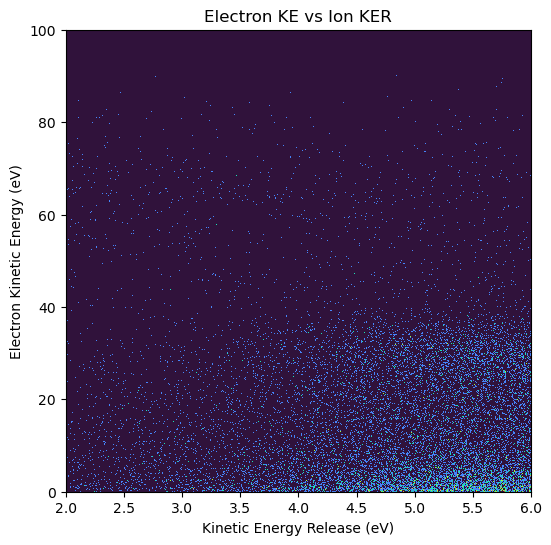

In [986]:
x_range = (2,6);
y_range = (0,100);

plt.figure(figsize=(6, 6), dpi=100);
plt.hist2d(KER, KEe1,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
if number_of_fragment == 2:
    plt.hist2d(KER, KEe2,bins=(500, 500), range=[x_range,y_range], cmap='turbo');#, norm=LogNorm());
# Add labels and title
plt.xlabel('Kinetic Energy Release (eV)');
plt.ylabel('Electron Kinetic Energy (eV)');
plt.title('Electron KE vs Ion KER');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));


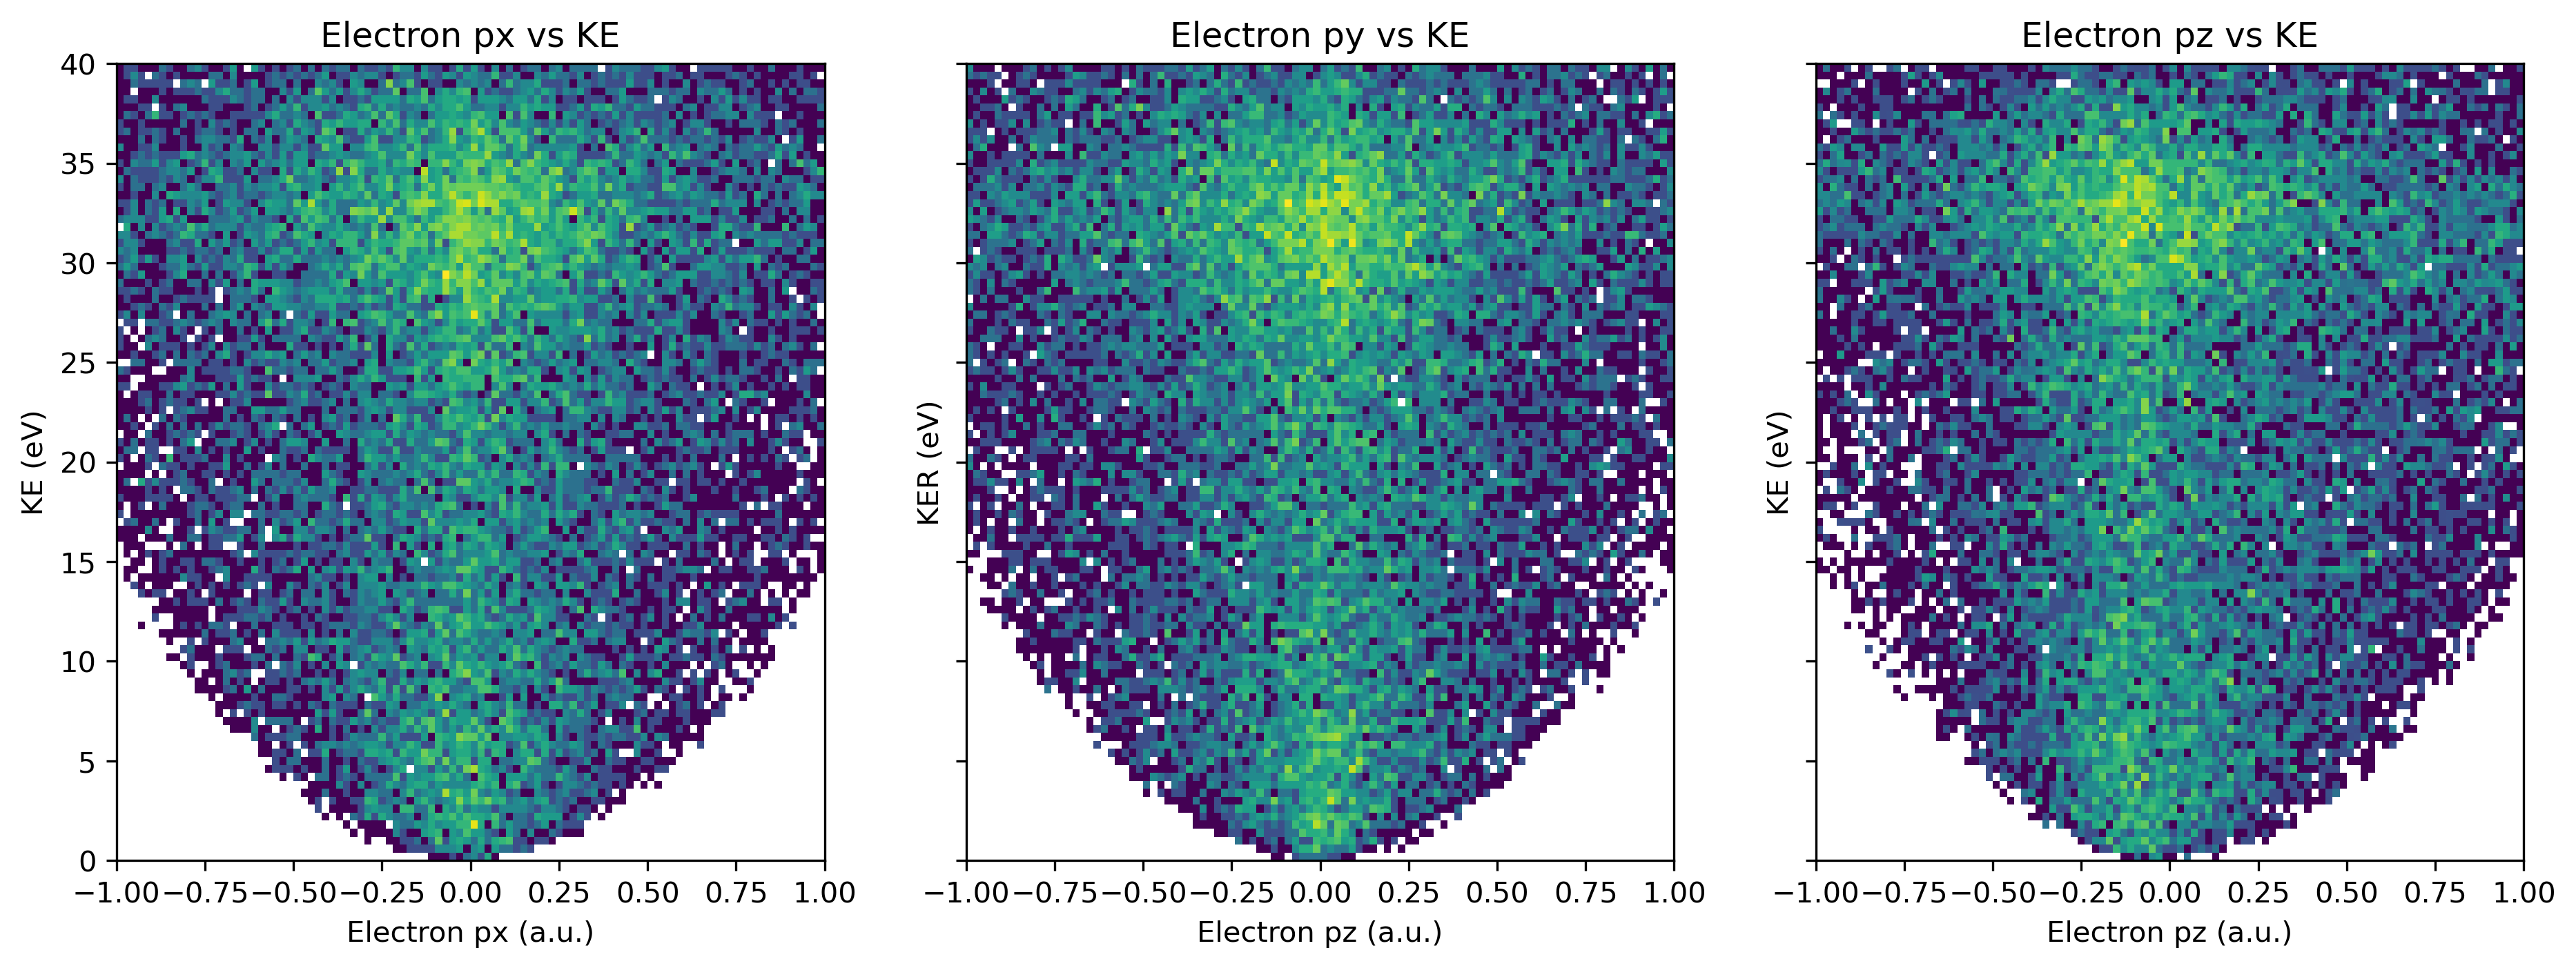

In [987]:
#######################################
#ELECTRON MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-1, 1)
y_range = (0, 40)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist1 = axs[0].hist2d(e_px1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[0].set_aspect('equal')
axs[0].set_title('Electron px vs KE');
axs[0].set_xlabel('Electron px (a.u.)');
axs[0].set_ylabel('KE (eV)');


hist2 = axs[1].hist2d(e_py0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist2 = axs[1].hist2d(e_py1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[1].set_aspect('equal')
axs[1].set_title('Electron py vs KE');
axs[1].set_xlabel('Electron pz (a.u.)');
axs[1].set_ylabel('KER (eV)');

hist3 = axs[2].hist2d(e_pz0, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist3 = axs[2].hist2d(e_pz1, KERe, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[2].set_aspect('equal')
axs[2].set_title('Electron pz vs KE');
axs[2].set_xlabel('Electron pz (a.u.)');
axs[2].set_ylabel('KE (eV)');

plt.savefig(folder_path+"\\e_mom_vs_KEe.png")

In [988]:
# # #//CM FRAME//
# cm_px1_X0 = calc_px_X0(i_TOF0, i_TOF1, i_x0, i_x1, m1, m2, q1, q2, B_field_ns, Bfield_clockwise);
# cm_py1_Y0 = calc_py_Y0(i_TOF0, i_TOF1, i_y0, i_y1, m1, m2, q1, q2, B_field_ns, Bfield_clockwise);
# cm_px2_X0 = calc_px_X0(i_TOF1, i_TOF0, i_x1, i_x0, m2, m1, q2, q1, B_field_ns, Bfield_clockwise);
# cm_py2_Y0 = calc_py_Y0(i_TOF1, i_TOF0, i_y1, i_y0, m2, m1, q2, q1, B_field_ns, Bfield_clockwise);
# cm_pz1_Z0 = calc_pz_Z0(i_TOF0, i_TOF1, m1, m2, q1, q2, l_acc1mm, l_acc2mm, l_acc3mm, l_Efield1_Vpcm, l_Efield2_Vpcm, l_Efield3_Vpcm);
# cm_pz2_Z0 = calc_pz_Z0(i_TOF1, i_TOF0, m2, m1, q2, q1, l_acc1mm, l_acc2mm, l_acc3mm, l_Efield1_Vpcm, l_Efield2_Vpcm, l_Efield3_Vpcm);
# cm_p1 = np.sqrt(cm_px1_X0*cm_px1_X0+cm_py1_Y0*cm_py1_Y0+cm_pz1_Z0*cm_pz1_Z0);
# cm_p2 = np.sqrt(cm_px2_X0*cm_px2_X0+cm_py2_Y0*cm_py2_Y0+cm_pz2_Z0*cm_pz2_Z0);
# cm_KE1 = cm_p1*cm_p1/(2*m1)/MASSAU*EVAU;
# cm_KE2 = cm_p2*cm_p2/(2*m2)/MASSAU*EVAU;
# cm_KER = cm_KE1+cm_KE2;
# cm_R12 = q1*q2*1.6*1e3/(4*PI*8.854*cm_KER)/0.529;

# cm_phi_x1_wi = np.arctan2(cm_pz1_Z0,cm_py1_Y0)/PI*180.;
# cm_phi_x2_wi = np.arctan2(cm_pz2_Z0,cm_py2_Y0)/PI*180.;
# cm_phi_y1_wi = np.arctan2(cm_px1_X0,cm_pz1_Z0)/PI*180.;
# cm_phi_y2_wi = np.arctan2(cm_px2_X0,cm_pz2_Z0)/PI*180.;
# cm_phi_z1_wi = np.arctan2(cm_py1_Y0,cm_px1_X0)/PI*180.;
# cm_phi_z2_wi = np.arctan2(cm_py2_Y0,cm_px2_X0)/PI*180.;
# cm_ctheta_x1_wi = (cm_px1_X0/cm_p1);
# cm_ctheta_x2_wi = (cm_px2_X0/cm_p2);
# cm_ctheta_y1_wi = (cm_py1_Y0/cm_p1);
# cm_ctheta_y2_wi = (cm_py2_Y0/cm_p2);
# cm_ctheta_z1_wi = (cm_pz1_Z0/cm_p1);
# cm_ctheta_z2_wi = (cm_pz2_Z0/cm_p2);
# cm_theta_x1_wi = np.arccos(cm_px1_X0/cm_p1)/PI*180.;
# cm_theta_x2_wi = np.arccos(cm_px2_X0/cm_p2)/PI*180.;
# cm_theta_y1_wi = np.arccos(cm_py1_Y0/cm_p1)/PI*180.;
# cm_theta_y2_wi = np.arccos(cm_py2_Y0/cm_p2)/PI*180.;
# cm_theta_z1_wi = np.arccos(cm_pz1_Z0/cm_p1)/PI*180.;
# cm_theta_z2_wi = np.arccos(cm_pz2_Z0/cm_p2)/PI*180.;

In [989]:
# fig, axes = plt.subplots(1,2,figsize=(10,6))
# axes[0].hist(cm_KER, bins=100, range=(0,10));
# axes[1].hist(cm_R12, bins=100, range=(0,20));

# axes[0].set_title('CM Frame KER');
# axes[1].set_xlabel('Kinetic Energy Release (eV)');
# axes[1].set_ylabel('Count');

# axes[0].set_title('CM Frame R12');
# axes[1].set_xlabel('Kinetic Energy Release (eV)');
# axes[1].set_ylabel('Count');

In [990]:
# fig, axes = plt.subplots(2,3,figsize=(10,6))
# #data = [e_px0, e_py0, e_pz0, e_px1, e_py1, e_pz1]

# axes[0,0].hist2d(cm_px1_X0, cm_py1_Y0, bins=(100,100), norm=LogNorm());
# axes[0,1].hist2d(cm_px1_X0, cm_pz1_Z0, bins=(100,100), norm=LogNorm());
# axes[0,2].hist2d(cm_py1_Y0, cm_pz1_Z0, bins=(100,100), norm=LogNorm());
# axes[1,0].hist2d(cm_px2_X0, cm_py2_Y0, bins=(100,100), norm=LogNorm());
# axes[1,1].hist2d(cm_px2_X0, cm_pz2_Z0, bins=(100,100), norm=LogNorm());
# axes[1,2].hist2d(cm_py2_Y0, cm_pz2_Z0, bins=(100,100), norm=LogNorm());

# axes[0, 0].set_title('i_px0 vs i_py0')
# axes[0, 1].set_title('i_px0 vs i_pz0')
# axes[0, 2].set_title('i_py0 vs i_pz0')
# axes[1, 0].set_title('i_px1 vs i_py1')
# axes[1, 1].set_title('i_px1 vs i_pz1')
# axes[1, 2].set_title('i_py1 vs i_pz1')

# axes[0, 0].set_xlabel('i_px0')
# axes[0, 1].set_xlabel('i_px0')
# axes[0, 2].set_xlabel('i_py0')
# axes[1, 0].set_xlabel('i_px1')
# axes[1, 1].set_xlabel('i_px1')
# axes[1, 2].set_xlabel('i_py1')

# axes[0, 0].set_ylabel('i_py0')
# axes[0, 1].set_ylabel('i_pz0')
# axes[0, 2].set_ylabel('i_pz0')
# axes[1, 0].set_ylabel('i_py1')
# axes[1, 1].set_ylabel('i_pz1')
# axes[1, 2].set_ylabel('i_pz1')

# plt.subplots_adjust(hspace=0.5)


# for ax in axes.flatten():
#     ax.set_aspect('equal')
#     ax.set_xlim(-120, 120)
#     ax.set_ylim(-120, 120)
#     ax.axhline(0, color='blue', linestyle='--', linewidth=1)
#     ax.axvline(0, color='blue', linestyle='--', linewidth=1)
#     #circle = Circle((0, 0), radius=1.5, color='red', fill=False, linestyle='dashed', linewidth=1)
#     #ax.add_patch(circle)
    
# plt.show()


In [991]:
# #######################################
# #ION MOMENTUM PLOT###################
# ######################################

# # Determine the data range
# x_range = (-120, 120)
# y_range = (0, 10)

# fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# # Plot the histograms
# hist1 = axs[0].hist2d(cm_px1_X0, cm_KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
# hist1 = axs[0].hist2d(cm_px2_X0, cm_KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
# #axs[0].set_aspect('equal')
# axs[0].set_title('ion px vs KER');
# axs[0].set_xlabel('ion px (a.u.)');
# axs[0].set_ylabel('KER (eV)');


# hist2 = axs[1].hist2d(cm_py1_Y0, cm_KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
# hist2 = axs[1].hist2d(cm_py2_Y0, cm_KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
# #axs[1].set_aspect('equal')
# axs[1].set_title('ion py vs KER');
# axs[1].set_xlabel('ion pz (a.u.)');
# axs[1].set_ylabel('KER (eV)');

# hist3 = axs[2].hist2d(cm_pz1_Z0, cm_KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
# hist3 = axs[2].hist2d(cm_pz2_Z0, cm_KER, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
# #axs[2].set_aspect('equal')
# axs[2].set_title('ion pz vs KER');
# axs[2].set_xlabel('ion pz (a.u.)');
# axs[2].set_ylabel('KER (eV)');


In [992]:
# # #//LAB FRAME
# X0_center = calc_X0(i_TOF0, i_TOF1, i_x0, i_x1, m1, m2);
# Y0_center = calc_Y0(i_TOF0, i_TOF1, i_y0, i_y1, m1, m2);
# Z0_center = calc_Z0(i_TOF0, i_TOF1, l_acc1mm, l_acc2mm, l_acc3mm, l_Efield1_Vpcm, l_Efield2_Vpcm, l_Efield3_Vpcm, q1, q2, m1, m2);


# lab_px_X0_center = calc_px_lab(i_TOF0, i_TOF1, i_x0, i_x1, X0_center, m1, m2, q1, q2, B_field_ns, Bfield_clockwise);
# lab_py_Y0_center = calc_py_lab(i_TOF0, i_TOF1, i_y0, i_y1, Y0_center, m1, m2, q1, q2, B_field_ns, Bfield_clockwise);
# lab_pz_Z0_center = calc_pz_lab(i_TOF0, i_TOF1, Z0_center, m1, m2, q1, q2, l_acc1mm, l_acc2mm, l_acc3mm, l_Efield1_Vpcm, l_Efield2_Vpcm, l_Efield3_Vpcm);

# lab_p_lab = np.sqrt(lab_px_X0_center*lab_px_X0_center+lab_py_Y0_center*lab_py_Y0_center+lab_pz_Z0_center*lab_pz_Z0_center);
# lab_KER_lab = lab_p_lab*lab_p_lab/(2*(m1+m2))/MASSAU*EVAU;

# lab_phi_x_lab = np.arctan2(lab_pz_Z0_center,lab_py_Y0_center)/PI*180.;
# lab_phi_y_lab = np.arctan2(lab_px_X0_center,lab_pz_Z0_center)/PI*180.;
# lab_phi_z_lab = np.arctan2(lab_py_Y0_center,lab_px_X0_center)/PI*180.;
# lab_ctheta_x_lab = (lab_px_X0_center/lab_p_lab);
# lab_ctheta_y_lab = (lab_py_Y0_center/lab_p_lab);
# lab_ctheta_z_lab = (lab_pz_Z0_center/lab_p_lab);

# lab_phi_x_diff = lab_phi_x_lab-cm_phi_x1_wi;
# lab_phi_y_diff = lab_phi_y_lab-cm_phi_y1_wi;
# lab_phi_z_diff = lab_phi_z_lab-cm_phi_z1_wi;

# # Apply the conditions using vectorized operations
# lab_phi_x_diff = np.where(lab_phi_x_diff > 180., lab_phi_x_diff - 360., lab_phi_x_diff)
# lab_phi_x_diff = np.where(lab_phi_x_diff < -180., lab_phi_x_diff + 360., lab_phi_x_diff)

# lab_phi_y_diff = np.where(lab_phi_y_diff > 180., lab_phi_y_diff - 360., lab_phi_y_diff)
# lab_phi_y_diff = np.where(lab_phi_y_diff < -180., lab_phi_y_diff + 360., lab_phi_y_diff)

# lab_phi_z_diff = np.where(lab_phi_z_diff > 180., lab_phi_z_diff - 360., lab_phi_z_diff)
# lab_phi_z_diff = np.where(lab_phi_z_diff < -180., lab_phi_z_diff + 360., lab_phi_z_diff)

In [993]:
# #// relative momenta
# reduced_mass = 1/(1/m1+1/m2)*MASSAU
# mom1 = np.sqrt((i_px0**2+i_py0**2+i_pz0**2))
# mom2 = np.sqrt((i_px1**2+i_py1**2+i_pz1**2))
# cm_mom_x = np.sqrt(i_px0**2+i_px1**2)
# cm_mom_y = np.sqrt(i_py0**2+i_py1**2)
# cm_mom_z = np.sqrt(i_pz0**2+i_pz1**2)
# mom_mag = np.sqrt((i_px0**2+i_py0**2+i_pz0**2+i_px1**2+i_py1**2+i_pz1**2))


# rel_mom = (mom1 - mom2)/2.0;

# rel_ang_px_ctheta = cm_mom_x / rel_mom;
# rel_ang_py_ctheta = cm_mom_y / rel_mom;
# rel_ang_pz_ctheta = cm_mom_z / rel_mom;

# rel_ang_px_theta = np.arccos(rel_ang_px_ctheta)/PI*180.;
# rel_ang_py_theta = np.arccos(rel_ang_py_ctheta)/PI*180.;
# rel_ang_pz_theta = np.arccos(rel_ang_pz_ctheta)/PI*180.;

# rel_ang_px_phi = np.arctan2(cm_mom_z,cm_mom_y)/PI*180.;
# rel_ang_py_phi = np.arctan2(cm_mom_x,cm_mom_z)/PI*180.;
# rel_ang_pz_phi = np.arctan2(cm_mom_y,cm_mom_x)/PI*180.;

# rel_energy = mom_mag * mom_mag / (2.0 * reduced_mass) * EVAU;

# #// cm momenta
# cm_mom = (mom1 + mom2);

# cm_ang_px_ctheta = cm_mom_x / cm_mom;
# cm_ang_py_ctheta = cm_mom_y / cm_mom;
# cm_ang_pz_ctheta = cm_mom_z / cm_mom;

# cm_ang_px_theta = np.arccos(cm_ang_px_ctheta)/PI*180.0;
# cm_ang_py_theta = np.arccos(cm_ang_py_ctheta)/PI*180.0;
# cm_ang_pz_theta = np.arccos(cm_ang_pz_ctheta)/PI*180.0;

# cm_ang_px_phi = np.arctan2(cm_mom_z,cm_mom_y)/PI*180.0;
# cm_ang_py_phi = np.arctan2(cm_mom_x,cm_mom_z)/PI*180.0;
# cm_ang_pz_phi = np.arctan2(cm_mom_y,cm_mom_x)/PI*180.0;

# cm_energy = cm_mom * cm_mom / (2.0 * (m1 + m2) * MASSAU) * EVAU;

In [994]:
# plt.hist(rel_energy, bins=100);
# plt.hist(cm_energy, bins=100);


# More Analysis

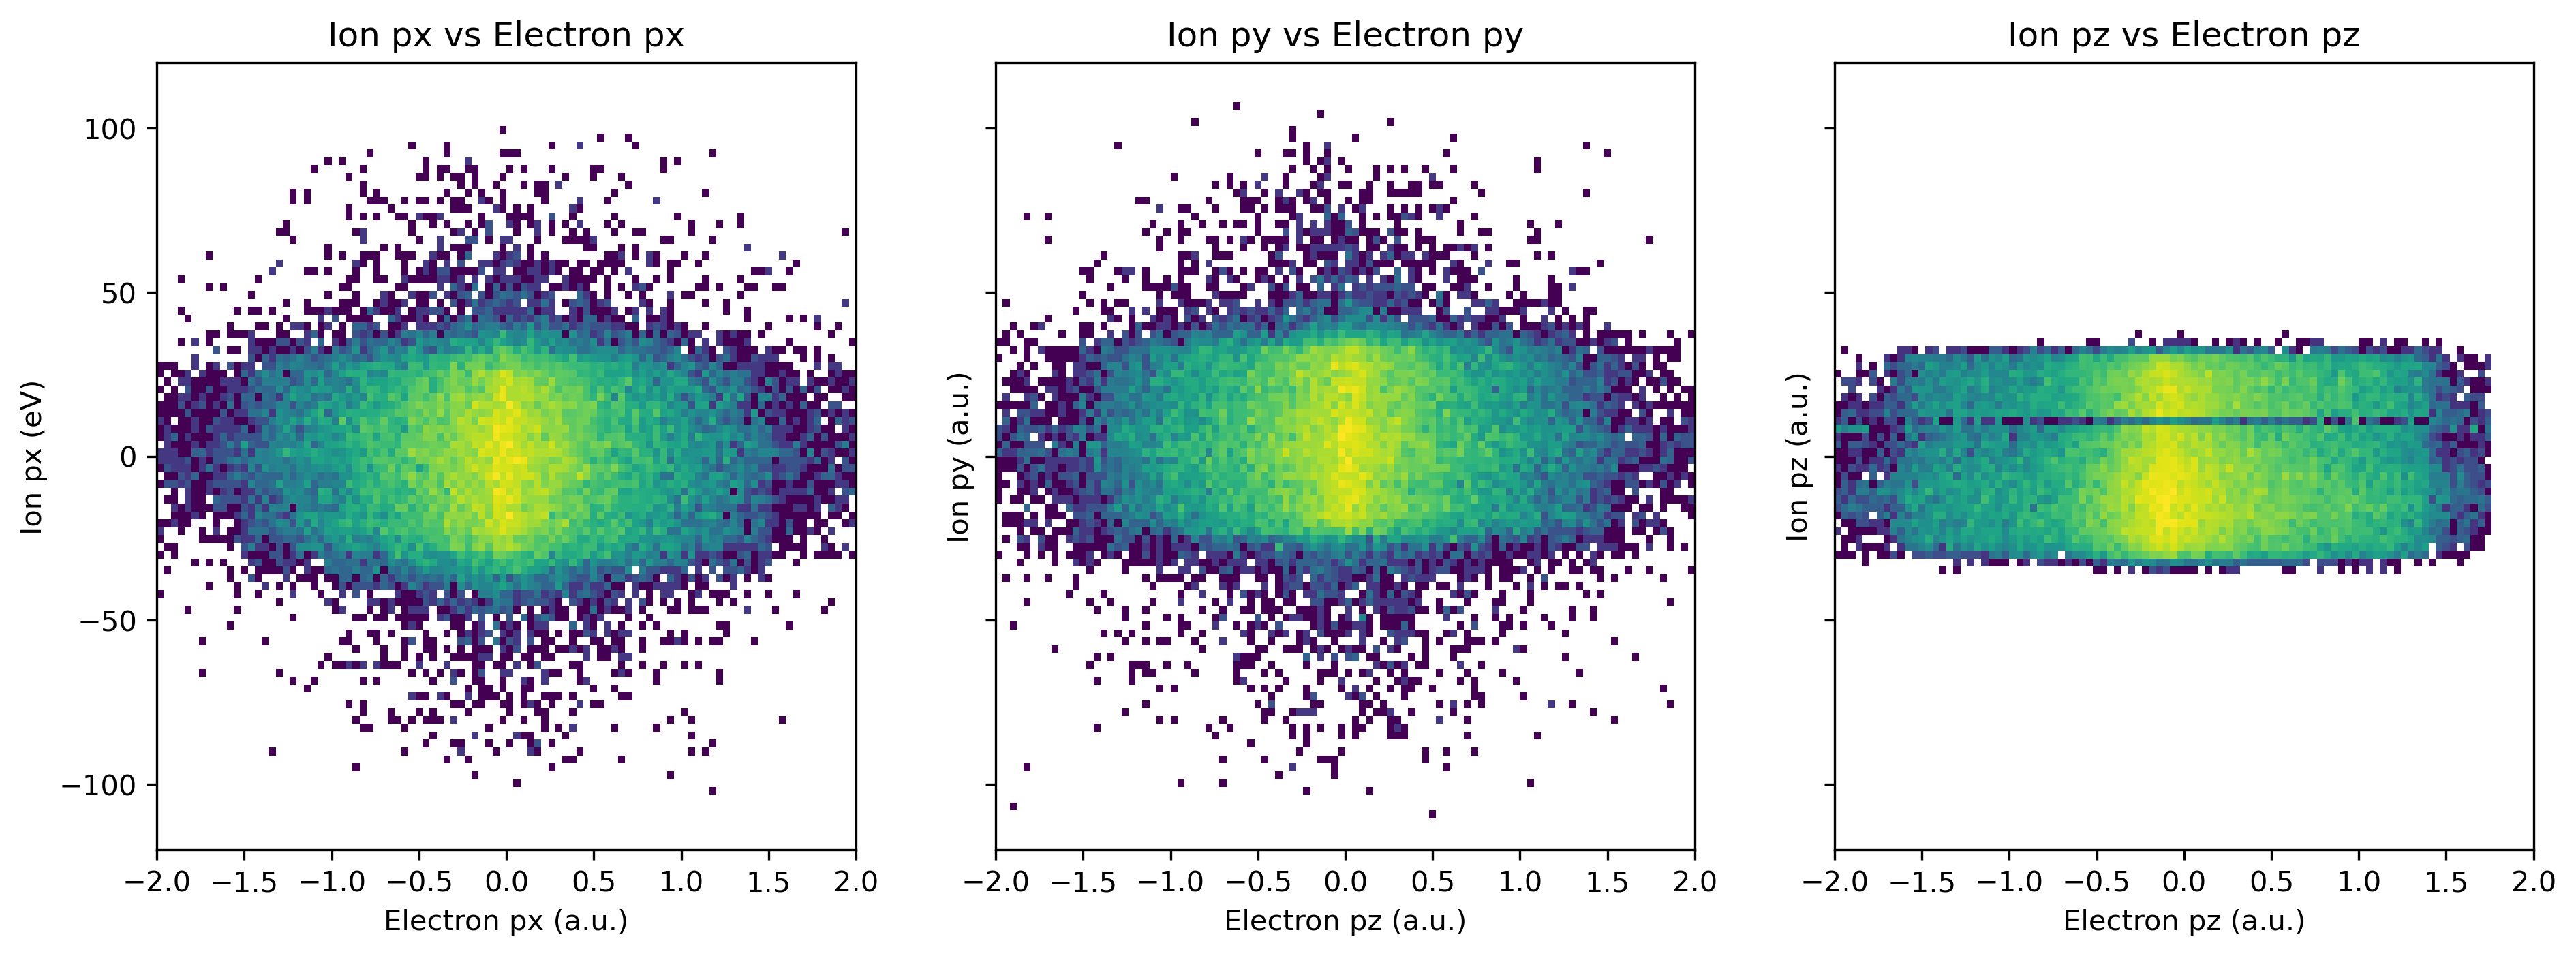

In [995]:
#######################################
#ELECTRON MOMENTUM PLOT###################
######################################

# Determine the data range
x_range = (-2, 2)
y_range = (-120, 120)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e_px0, i_px0, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist1 = axs[0].hist2d(e_px1, i_px1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[0].set_aspect('equal')
axs[0].set_title('Ion px vs Electron px');
axs[0].set_xlabel('Electron px (a.u.)');
axs[0].set_ylabel('Ion px (eV)');


hist2 = axs[1].hist2d(e_py0, i_py0, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist2 = axs[1].hist2d(e_py1, i_py1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[1].set_aspect('equal')
axs[1].set_title('Ion py vs Electron py');
axs[1].set_xlabel('Electron pz (a.u.)');
axs[1].set_ylabel('Ion py (a.u.)');

hist3 = axs[2].hist2d(e_pz0, i_pz0, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
hist3 = axs[2].hist2d(e_pz1, i_pz1, bins=(100, 100), norm=LogNorm(), range=[x_range, y_range]);
#axs[2].set_aspect('equal')
axs[2].set_title('Ion pz vs Electron pz');
axs[2].set_xlabel('Electron pz (a.u.)');
axs[2].set_ylabel('Ion pz (a.u.)');

plt.savefig(folder_path+"\\i_mom_vs_e_mom.png")

In [996]:
#########################################################
### radial and angular distributions in each quadrant ###
#########################################################

rad_xy_1 = []
rad_xy_2 = []
rad_xy_3 = []
rad_xy_4 = []
for n in range(len(e_px0)):
    if e_px0[n] > 0 and e_py0[n] > 0:
        rad_xy_1.append(np.sqrt(e_px0[n]**2 + e_py0[n]**2))
    if e_px0[n] < 0 and e_py0[n] > 0:
        rad_xy_2.append(np.sqrt(e_px0[n]**2 + e_py0[n]**2))
    if e_px0[n] < 0 and e_py0[n] < 0:
        rad_xy_3.append(np.sqrt(e_px0[n]**2 + e_py0[n]**2))
    if e_px0[n] > 0 and e_py0[n] < 0:
        rad_xy_4.append(np.sqrt(e_px0[n]**2 + e_py0[n]**2))

rad_xz_1 = []
rad_xz_2 = []
rad_xz_3 = []
rad_xz_4 = []
for n in range(len(e_px0)):
    if e_px0[n] > 0 and e_pz0[n] > 0:
        rad_xz_1.append(np.sqrt(e_px0[n]**2 + e_pz0[n]**2))
    if e_px0[n] < 0 and e_pz0[n] > 0:
        rad_xz_2.append(np.sqrt(e_px0[n]**2 + e_pz0[n]**2))
    if e_px0[n] < 0 and e_pz0[n] < 0:
        rad_xz_3.append(np.sqrt(e_px0[n]**2 + e_pz0[n]**2))
    if e_px0[n] > 0 and e_pz0[n] < 0:
        rad_xz_4.append(np.sqrt(e_px0[n]**2 + e_pz0[n]**2))

rad_yz_1 = []
rad_yz_2 = []
rad_yz_3 = []
rad_yz_4 = []
for n in range(len(e_py0)):
    if e_py0[n] > 0 and e_pz0[n] > 0:
        rad_yz_1.append(np.sqrt(e_py0[n]**2 + e_pz0[n]**2))
    if e_py0[n] < 0 and e_pz0[n] > 0:
        rad_yz_2.append(np.sqrt(e_py0[n]**2 + e_pz0[n]**2))
    if e_py0[n] < 0 and e_pz0[n] < 0:
        rad_yz_3.append(np.sqrt(e_py0[n]**2 + e_pz0[n]**2))
    if e_py0[n] > 0 and e_pz0[n] < 0:
        rad_yz_4.append(np.sqrt(e_py0[n]**2 + e_pz0[n]**2))

phi_xy = np.arctan2(e_py0,e_px0)
for phi in phi_xy:
    if phi < 0.0:
        phi += 2*np.pi
        
phi_xz = np.arctan2(e_pz0,e_px0)
for phi in phi_xz:
    if phi < 0.0:
        phi += 2*np.pi
        
phi_yz = np.arctan2(e_pz0,e_py0)
for phi in phi_yz:
    if phi < 0.0:
        phi += 2*np.pi

C:\Users\James\AppData\Local\Temp\ipykernel_32988\3837493883.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


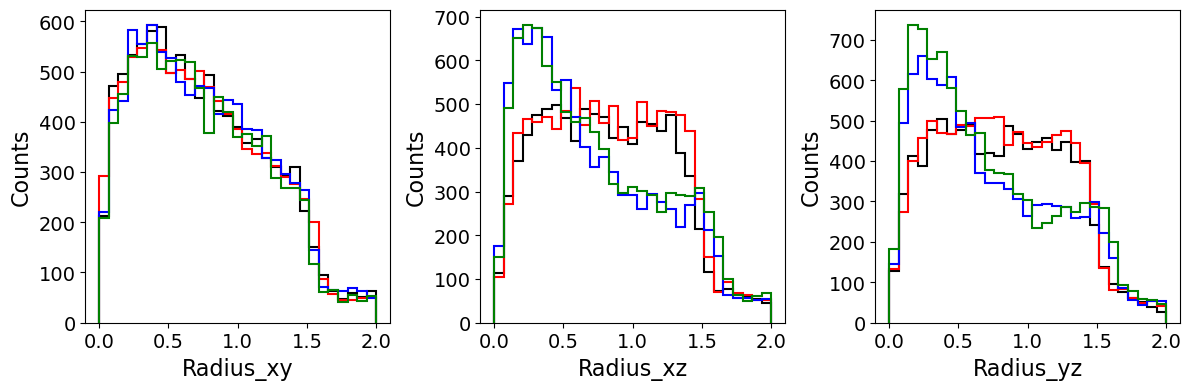

In [997]:
#####################################################
### electron radial distribution in each quadrant ###
#####################################################

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

ax1.hist(rad_xy_1,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='k')
ax1.hist(rad_xy_2,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='r')
ax1.hist(rad_xy_3,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='b')
ax1.hist(rad_xy_4,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='g')
ax1.set_xlabel('Radius_xy', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.tick_params(labelsize=14)

ax2.hist(rad_xz_1,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='k')
ax2.hist(rad_xz_2,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='r')
ax2.hist(rad_xz_3,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='b')
ax2.hist(rad_xz_4,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='g')
ax2.set_xlabel('Radius_xz', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax2.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax2.tick_params(labelsize=14)

ax3.hist(rad_yz_1,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='k')
ax3.hist(rad_yz_2,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='r')
ax3.hist(rad_yz_3,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='b')
ax3.hist(rad_yz_4,bins=np.linspace(0,2,num=30),histtype='step',lw=1.5,color='g')
ax3.set_xlabel('Radius_yz', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax3.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax3.tick_params(labelsize=14)

fig.tight_layout()
fig.show()
plt.savefig(folder_path+"\\rad_xyz.png")

C:\Users\James\AppData\Local\Temp\ipykernel_32988\491065556.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


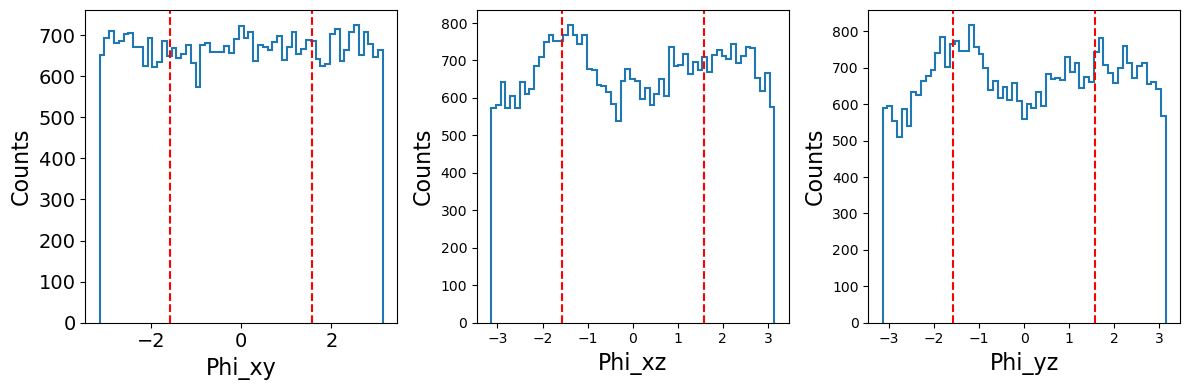

In [998]:
######################################
### electron angluar distributions ###
######################################

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

radius0, phi0, _  = ax1.hist(phi_xy,bins=np.linspace(-np.pi,np.pi,num=60),histtype='step',lw=1.5)
ax1.axvline(np.pi/2,c='r',ls='--')
ax1.axvline(-np.pi/2,c='r',ls='--')
ax1.set_xlabel('Phi_xy', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.tick_params(labelsize=14)


radius1, phi1, _  = ax2.hist(phi_xz,bins=np.linspace(-np.pi,np.pi,num=60),histtype='step',lw=1.5)
ax2.axvline(np.pi/2,c='r',ls='--')
ax2.axvline(-np.pi/2,c='r',ls='--')
ax2.set_xlabel('Phi_xz', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax2.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.tick_params(labelsize=14)

radius2, phi2, _  = ax3.hist(phi_yz,bins=np.linspace(-np.pi,np.pi,num=60),histtype='step',lw=1.5)
ax3.axvline(np.pi/2,c='r',ls='--')
ax3.axvline(-np.pi/2,c='r',ls='--')
ax3.set_xlabel('Phi_yz', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax3.set_ylabel('Counts', fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax1.tick_params(labelsize=14)

fig.tight_layout()
fig.show()
plt.savefig(folder_path+"\\phi_xyz.png")

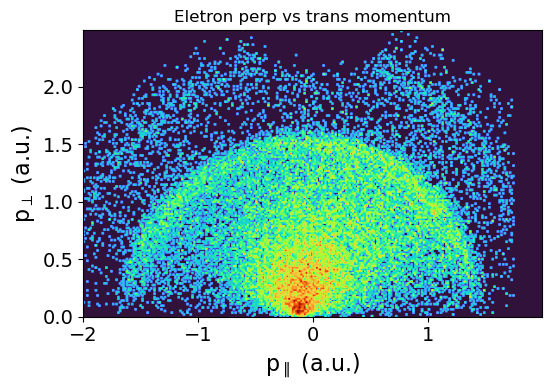

<Figure size 640x480 with 0 Axes>

In [999]:
p_e_longitudinal0 = e_pz0
p_e_transverse0 = np.sqrt(e_px0**2 + e_py0**2)

p_ez_edges = np.arange(0,2.5,0.015)
p_ex_edges = np.arange(-2,2,0.015)
H_e_px_pz, p_ex_edges, p_ez_edges = np.histogram2d(p_e_longitudinal0,p_e_transverse0,bins=(p_ex_edges,p_ez_edges))
H_e_px_pz = H_e_px_pz.T

fig_a, ax_a = plt.subplots(1,1,figsize=(8,4))

im = ax_a.imshow(H_e_px_pz, origin='lower', extent=[p_ex_edges[0], p_ex_edges[-1], p_ez_edges[0], p_ez_edges[-1]],cmap = 'turbo',aspect=1/1,norm = PowerNorm(gamma =1 / 2.5))
ax_a.set_ylabel('p$_{\perp}$ (a.u.)',fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax_a.set_xlabel('p$_{\parallel}$ (a.u.)',fontsize=16,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax_a.set_title('Eletron perp vs trans momentum')
ax_a.tick_params(labelsize=14)

# Adjust the position of the color bar
#cb_ax = fig_a.add_axes([1, 0, 1, 0])  # Adjust the second value (0.83) to make space for the title
#cb = fig_a.colorbar(im, cax = cb_ax, orientation = 'vertical')
#tick_locator = ticker.MaxNLocator(nbins=5)
#cb.locator = tick_locator
#cb.update_ticks()

#cb.ax.tick_params(labelsize = 13)
#cb.ax.xaxis.set_ticks_position('top')
#cb.ax.xaxis.set_label_position('top')

# Save or display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()
plt.savefig(folder_path+"\\e_p_long_vs_e_p_trans.png")


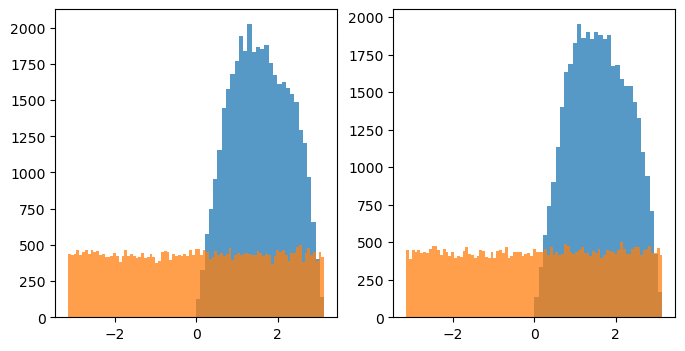

In [1000]:
###################################################
### compute electon theta and phi distributions ###
###################################################
plt.figure(figsize=(8, 4))

# Plot the first histogram (theta_electron)
plt.subplot(1, 2, 1)

e_p_mag = np.sqrt(e_px0**2 + e_py0**2 + e_pz0**2)
theta_electron = np.arccos(e_pz0/e_p_mag)
cos_theta_electron = e_pz0/e_p_mag
phi_electron = np.arctan2(e_py0,e_px0)

for phi in phi_electron:
    if phi < 0.0:
        phi += 2*np.pi        
phi_electron = phi_electron

theta_radius, theta_radian, _ = plt.hist(theta_electron,bins=np.linspace(0,np.pi,num=31),alpha=0.75)
phi_radius, phi_radian, _ = plt.hist(phi_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)
#phi_radius, phi_radian, _ = plt.hist(cos_theta_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)

###################################################
### compute electon theta and phi distributions ###
###################################################
plt.subplot(1, 2, 2)

e_p1_mag = np.sqrt(e_px1**2 + e_py1**2 + e_pz1**2)
theta_electron_1 = np.arccos(e_pz1/e_p1_mag)
cos_theta_electron_1 = e_pz1/e_p1_mag
phi_electron_1 = np.arctan2(e_py1,e_px1)

for phi in phi_electron_1:
    if phi < 0.0:
        phi += 2*np.pi        
phi_electron_1 = phi_electron_1

theta_radius_1, theta_radian_1, _ = plt.hist(theta_electron_1,bins=np.linspace(0,np.pi,num=31),alpha=0.75)
phi_radius_1, phi_radian_1, _ = plt.hist(phi_electron_1,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)
#phi_radius, phi_radian, _ = plt.hist(cos_theta_electron,bins=np.linspace(-np.pi,np.pi,num=92),alpha=0.75)

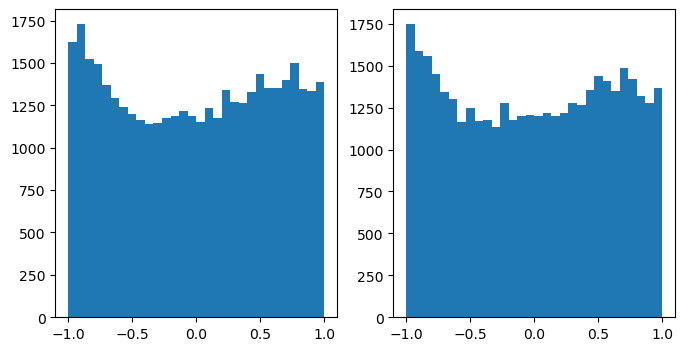

In [1001]:
###########################
### cos(theta_electron) ###
###########################
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(cos_theta_electron,bins=30);
plt.subplot(1, 2, 2)
plt.hist(cos_theta_electron_1,bins=30);


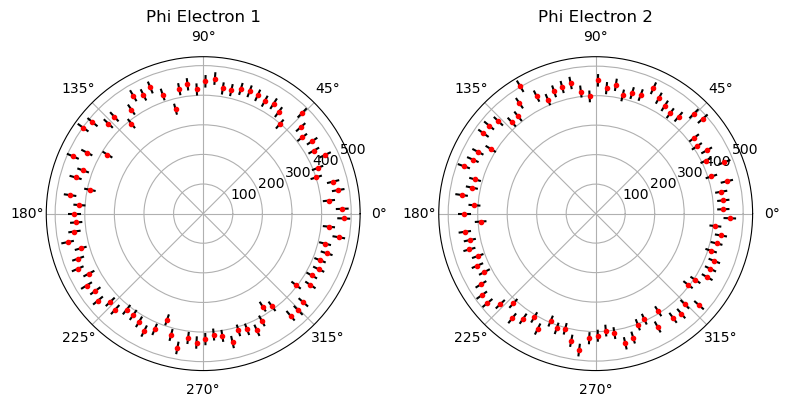

In [1002]:
####################
### phi_electron ###
####################
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize = (8,8))

radius_error = [np.sqrt(x) for x in phi_radius]
ax[0].errorbar(phi_radian[:-1], phi_radius, yerr = radius_error, fmt = 'r.', ecolor = 'k')
ax[0].grid(True)
ax[0].set_title('Phi Electron 1')

radius_error_1 = [np.sqrt(x) for x in phi_radius_1]
ax[1].errorbar(phi_radian[:-1], phi_radius_1, yerr = radius_error_1, fmt = 'r.', ecolor = 'k')
ax[1].grid(True)
ax[1].set_title('Phi Electron 2')

fig.tight_layout()
#fig.show()

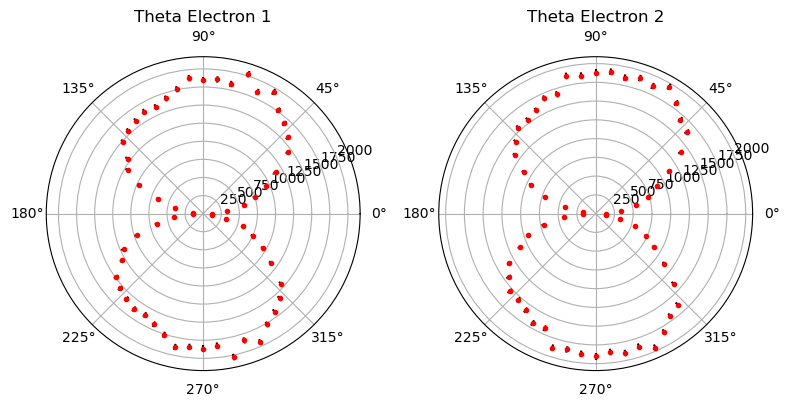

In [1003]:
######################
### theta_electron ###
######################
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize = (8,4))

radius_error = np.array([np.sqrt(x) for x in theta_radius])
radius_error_ = np.flip(radius_error)

theta = np.concatenate((theta_radian[:-1],theta_radian[:-1]+np.pi))
radius = np.concatenate((theta_radius,np.flip(theta_radius)))
error = np.concatenate((radius_error,radius_error_))

ax[0].errorbar(theta, radius, yerr = error, fmt = 'r.', ecolor = 'k')
ax[0].grid(True)
ax[0].set_title('Theta Electron 1')

radius_error_1 = np.array([np.sqrt(x) for x in theta_radius_1])
radius_error_ = np.flip(radius_error_1)

theta_1 = np.concatenate((theta_radian_1[:-1],theta_radian_1[:-1]+np.pi))
radius_1 = np.concatenate((theta_radius_1,np.flip(theta_radius_1)))
error_1 = np.concatenate((radius_error_1,radius_error_))

ax[1].errorbar(theta_1, radius_1, yerr = error_1, fmt = 'r.', ecolor = 'k')
ax[1].grid(True)
ax[1].set_title('Theta Electron 2')

fig.tight_layout()
#fig.show()

C:\Users\James\AppData\Local\Temp\ipykernel_32988\3215730734.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


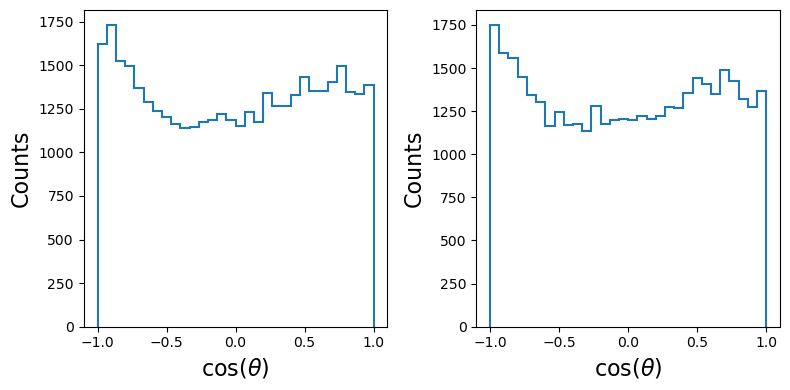

In [1004]:
###########################
### cos(theta_electron) ###
###########################
fig, ax = plt.subplots(1, 2, figsize = (8,4), dpi = 100)

radius_, cos_theta_, _  = ax[0].hist(cos_theta_electron, bins=30,histtype='step',lw=1.5)
ax[0].set_xlabel('cos($\\theta$)', fontsize=16)
ax[0].set_ylabel('Counts', fontsize=16)

radius__1, cos_theta__1, _  = ax[1].hist(cos_theta_electron_1, bins=30,histtype='step',lw=1.5)
ax[1].set_xlabel('cos($\\theta$)', fontsize=16)
ax[1].set_ylabel('Counts', fontsize=16)


fig.tight_layout()
fig.show()

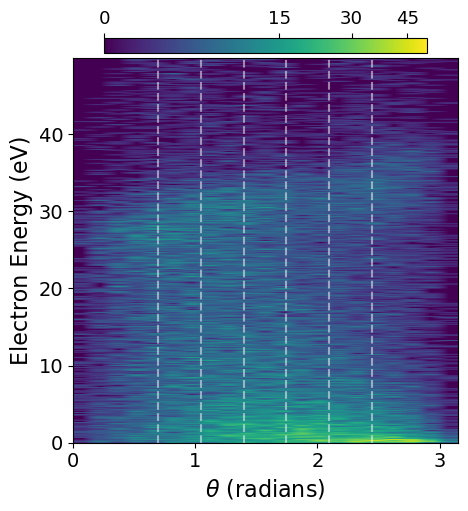

In [1005]:
# Histogram 2D
Ee_edges = np.arange(0.0, 50, 0.1)
theta_edges = np.arange(0.0, np.pi + 0.15, 0.15)
H_Ee_theta, theta_edges, Ee_edges = np.histogram2d(theta_electron, KEe1, bins=(theta_edges, Ee_edges))
H_Ee_theta = H_Ee_theta.T

# Plotting
fig_a, ax_a = plt.subplots(1, 1, figsize=(5, 5))

im = ax_a.imshow(H_Ee_theta, origin='lower', extent=[theta_edges[0], theta_edges[-1], Ee_edges[0], Ee_edges[-1]],
                  aspect=(theta_edges[-1] - theta_edges[0]) / (Ee_edges[-1] - Ee_edges[0]), cmap='viridis',
                  norm=PowerNorm(gamma=1 / 2))
ax_a.set_xlabel('$\\theta$ (radians)', fontsize=16)
ax_a.set_ylabel('Electron Energy (eV)', fontsize=16)
ax_a.tick_params(labelsize=14)

cb_ax = fig_a.add_axes([0.19, 0.89, 0.645, 0.03])
cb = fig_a.colorbar(im, cax=cb_ax, orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

cb.ax.tick_params(labelsize=13)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for i in range(2, 8):
    ax_a.axvline(i * np.pi / 9, c='w', ls='--', alpha=0.5)


plt.savefig(folder_path+"\\theta_electron_vs_KEe.png")
plt.show()

In [1006]:
print(len(KEe1))
print(len(e_TOF0))


39549
52508


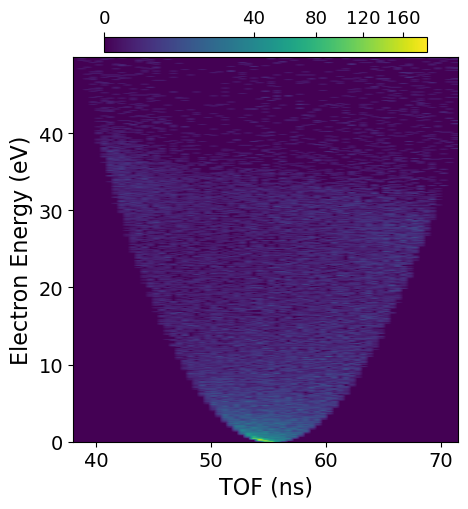

In [1007]:
# Histogram 2D
Ee_edges = np.arange(0.0, 50, 0.1)
TOF_edges = np.arange(e1tof_left_edge, e1tof_right_edge, 0.5)
H_Ee_TOF, TOF_edges, Ee_edges = np.histogram2d(e_TOF0_filt, KEe1, bins=(TOF_edges, Ee_edges))
H_Ee_TOF = H_Ee_TOF.T

# Plotting
fig_a, ax_a = plt.subplots(1, 1, figsize=(5, 5))

im = ax_a.imshow(H_Ee_TOF, origin='lower', extent=[TOF_edges[0], TOF_edges[-1], Ee_edges[0], Ee_edges[-1]],
                  aspect=(TOF_edges[-1] - TOF_edges[0]) / (Ee_edges[-1] - Ee_edges[0]), cmap='viridis',
                  norm=PowerNorm(gamma=1 / 2))
ax_a.set_xlabel('TOF (ns)', fontsize=16)
ax_a.set_ylabel('Electron Energy (eV)', fontsize=16)
ax_a.tick_params(labelsize=14)

cb_ax = fig_a.add_axes([0.19, 0.89, 0.645, 0.03])
cb = fig_a.colorbar(im, cax=cb_ax, orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

cb.ax.tick_params(labelsize=13)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig(folder_path+"\\TOF_vs_KEe.png")
plt.show()


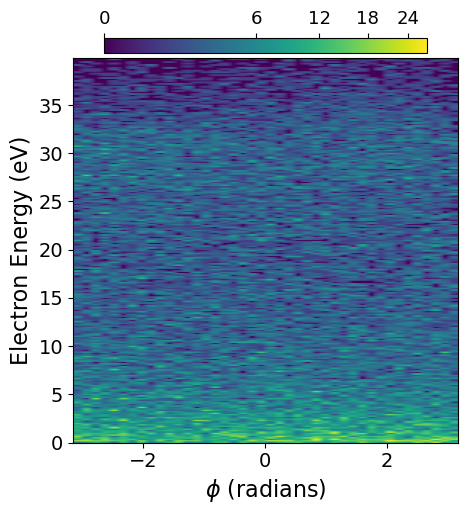

In [1008]:
# Histogram 2D
Ee_edges = np.arange(0.0, 40, 0.15)
phi_edges = np.arange(-np.pi, np.pi + 0.15, 0.15)
H_Ee_phi, phi_edges, Ee_edges = np.histogram2d(phi_electron, KEe1, bins=(phi_edges, Ee_edges))
H_Ee_phi = H_Ee_phi.T

# Plotting
fig_a, ax_a = plt.subplots(1, 1, figsize=(5, 5))

im = ax_a.imshow(H_Ee_phi, origin='lower', extent=[phi_edges[0], phi_edges[-1], Ee_edges[0], Ee_edges[-1]],
                  aspect=(phi_edges[-1] - phi_edges[0]) / (Ee_edges[-1] - Ee_edges[0]), cmap='viridis',
                  norm=PowerNorm(gamma=1 / 2))
ax_a.set_xlabel('$\phi$ (radians)', fontsize=16)
ax_a.set_ylabel('Electron Energy (eV)', fontsize=16)
ax_a.tick_params(labelsize=14)

cb_ax = fig_a.add_axes([0.19, 0.89, 0.645, 0.03])
cb = fig_a.colorbar(im, cax=cb_ax, orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

cb.ax.tick_params(labelsize=13)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


plt.savefig(folder_path+"\\phi_electron vs KEe.png")
plt.show()

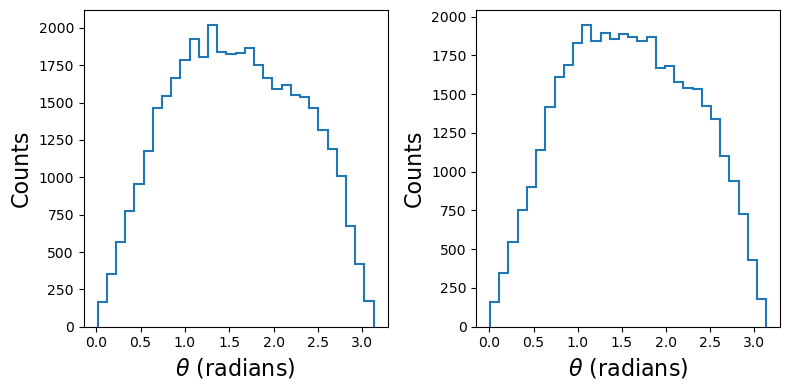

In [1009]:
######################
### theta_electron ###
######################
fig, ax = plt.subplots(1, 2, figsize = (8,4))

radius, cos_theta, _  = ax[0].hist(theta_electron,bins=30,histtype='step',lw=1.5)
ax[0].set_xlabel('$\\theta$ (radians)', fontsize=16)
ax[0].set_ylabel('Counts', fontsize=16)


radius_1, cos_theta_1, _  = ax[1].hist(theta_electron_1,bins=30,histtype='step',lw=1.5)
ax[1].set_xlabel('$\\theta$ (radians)', fontsize=16)
ax[1].set_ylabel('Counts', fontsize=16)

fig.tight_layout()
#fig.show()

plt.savefig(folder_path+"\\theta_electron.png")


In [1010]:
bincenters = 0.5*(cos_theta[1:]+cos_theta[:-1])

###################################################################
### expression for 2-photon photoelectron angular distributions ###
################### using Legendre polynomials ####################
###################################################################
def Legendre(x,a,b,c):
    return (a*1 + b*(0.5*(3*np.cos(x)**2 - 1)) +  
            c*(1/8 * (35*np.cos(x)**4 - 30*np.cos(x)**2 + 3)))

################################################################
### dividing by Jacobian to properly scale counts and errors ###
################################################################
radius_scaled = [radius[n]/np.sin(bincenters[n]) for n in range(len(bincenters))]
radius_scaled_error = [np.sqrt(n) for n in radius_scaled]
radius_scaled_error_ = [np.sqrt(radius[n])/np.sin(bincenters[n]) for n in range(len(bincenters))]



bincenters_1 = 0.5*(cos_theta_1[1:]+cos_theta_1[:-1])

###################################################################
### expression for 2-photon photoelectron angular distributions ###
################### using Legendre polynomials ####################
###################################################################
def Legendre(x,a,b,c):
    return (a*1 + b*(0.5*(3*np.cos(x)**2 - 1)) +  
            c*(1/8 * (35*np.cos(x)**4 - 30*np.cos(x)**2 + 3)))

################################################################
### dividing by Jacobian to properly scale counts and errors ###
################################################################
radius_scaled_1 = [radius_1[n]/np.sin(bincenters[n]) for n in range(len(bincenters_1))]
radius_scaled_error_1 = [np.sqrt(n) for n in radius_scaled_1]
radius_scaled_error__1 = [np.sqrt(radius_1[n])/np.sin(bincenters_1[n]) for n in range(len(bincenters_1))]

In [1011]:
##############################################
### fit theta_electron with above function ###
##############################################
popt_, pcov_ = curve_fit(Legendre, bincenters, radius_scaled, sigma = radius_scaled_error_)
L_opt_ = Legendre(theta, popt_[0], popt_[1], popt_[2])

##############################
### fitted beta parameters ###
##############################
betas = popt_/popt_[0]
print((betas[1],betas[2]))

########################################
### errors on fitted beta parameters ###
########################################
vars_ = np.sqrt(pcov_)/popt_[0]
print((vars_[1,1],vars_[2,2]))



popt__1, pcov__1 = curve_fit(Legendre, bincenters_1, radius_scaled_1, sigma = radius_scaled_error__1)
L_opt__1 = Legendre(theta_1, popt__1[0], popt__1[1], popt__1[2])

##############################
### fitted beta parameters ###
##############################
betas_1 = popt__1/popt__1[0]
print((betas_1[1],betas_1[2]))

########################################
### errors on fitted beta parameters ###
########################################
vars__1 = np.sqrt(pcov__1)/popt__1[0]

(0.1890316320987859, -0.015822054464463227)
(0.0289975063413591, 0.03868877782346877)
(0.1528239895315023, -0.027242708236937627)


C:\Users\James\AppData\Local\Temp\ipykernel_32988\349128348.py:16: RuntimeWarning: invalid value encountered in sqrt
  vars_ = np.sqrt(pcov_)/popt_[0]
C:\Users\James\AppData\Local\Temp\ipykernel_32988\349128348.py:33: RuntimeWarning: invalid value encountered in sqrt
  vars__1 = np.sqrt(pcov__1)/popt__1[0]


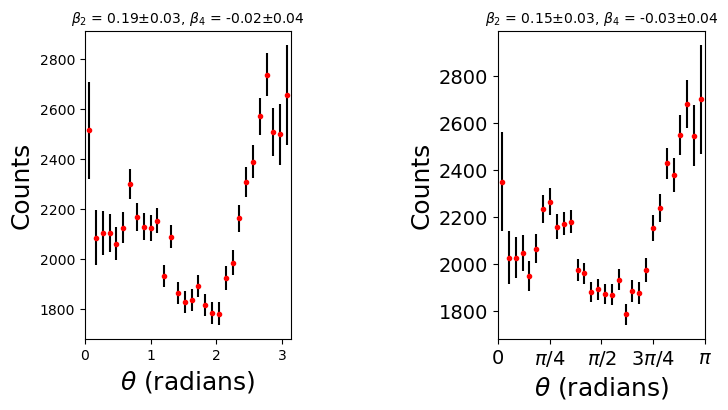

In [1012]:
########################################
### photoelectron theta distribution ###
####### with error bars and fit ########
## these error bars come from the fit ##
########################################
fig, ax = plt.subplots(1,2,figsize = (8,4))

#ax[0].plot(theta, L_opt_, '-r', linewidth = 1.0, label = 'Fit')
ax[0].errorbar(bincenters, radius_scaled, yerr = radius_scaled_error_, fmt = 'r.', ecolor = 'k')
ax[0].set_xlim(0,np.pi)
ax[0].set_xlabel('$\\theta$ (radians)', fontsize=18,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax[0].set_ylabel('Counts', fontsize=18,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax[0].set_title('$\\beta_{2}$ = '+str(np.round(betas[1],2))+'$\pm$'+str(np.round(vars_[1,1],2))+
             ', $\\beta_{4}$ = '+str(np.round(betas[2],2))+'$\pm$'+str(np.round(vars_[2,2],2)), 
             fontsize=10,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})

plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi], ('0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$'),fontsize=14)
plt.yticks(fontsize=14)


#ax[1].plot(theta_1, L_opt__1, '-r', linewidth = 1.0, label = 'Fit')
ax[1].errorbar(bincenters_1, radius_scaled_1, yerr = radius_scaled_error__1, fmt = 'r.', ecolor = 'k')
ax[1].set_xlim(0,np.pi)
ax[1].set_xlabel('$\\theta$ (radians)', fontsize=18,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax[1].set_ylabel('Counts', fontsize=18,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax[1].set_title('$\\beta_{2}$ = '+str(np.round(betas_1[1],2))+'$\pm$'+str(np.round(vars__1[1,1],2))+
             ', $\\beta_{4}$ = '+str(np.round(betas_1[2],2))+'$\pm$'+str(np.round(vars__1[2,2],2)), 
             fontsize=10,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})

plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi], ('0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$'),fontsize=14)
plt.yticks(fontsize=14)

#fig.tight_layout()
#fig.show()
plt.subplots_adjust(wspace=1)  # Adjust horizontal space between subplots


plt.savefig(folder_path+"\\theta_electron_distribution.png")

# JZ Analysis following Wael

In [1013]:
#relative angles

# Momentum components for electron 1 and electron 2
p1 = np.array([e_px0, e_py0, e_pz0])
p2 = np.array([e_px1, e_py1, e_pz1])

# Compute the relative vector
r = p2 - p1

# Compute the angles with respect to each coordinate axis
theta_x = np.arctan2(r[1], r[0])  # Angle with respect to x-axis
theta_y = np.arctan2(r[2], np.sqrt(r[0]**2 + r[1]**2))  # Angle with respect to y-axis
theta_z = np.arctan2(r[1], r[2])  # Angle with respect to z-axis

e_p_total_mag = np.array([np.sqrt(e_px0**2 + e_py0**2 + e_pz0**2), np.sqrt(e_px1**2 + e_py1**2 + e_pz1**2)])
e_pz_total = np.array([e_pz0, e_pz1])
theta_electron_total = np.arccos(e_pz_total/e_p_total_mag)


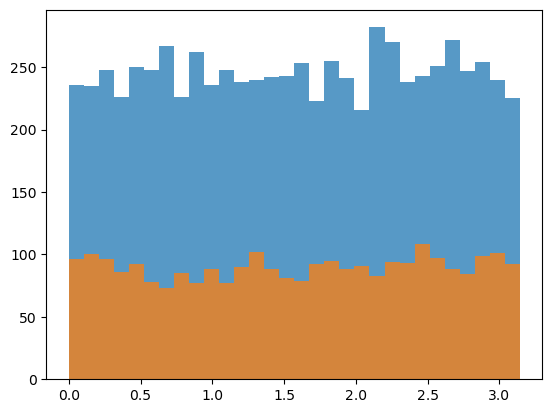

In [1014]:
#relative angles
#high energy filter
KEe1_high_filter = (KEe1 > 10) & (KEe1 < 30) & (KEe2 < 10)
KEe2_high_filter = (KEe2 > 10) & (KEe2 < 30) & (KEe1 < 10)
KEe12_high_filter = True #abs(KEe1-KEe2) > 5

high_energy_filter = (KEe1_high_filter | KEe2_high_filter) & KEe12_high_filter
KEe1_high = KEe1[high_energy_filter]
KEe2_high = KEe2[high_energy_filter]
#low_energy_filter = 1 - high_energy_filter

e_px0_high = e_px0[high_energy_filter]
e_py0_high = e_py0[high_energy_filter]
e_pz0_high = e_pz0[high_energy_filter]
e_px1_high = e_px1[high_energy_filter]
e_py1_high = e_py1[high_energy_filter]
e_pz1_high = e_pz1[high_energy_filter]

KEe1_low_filter = (KEe1 > 10) & (KEe1 < 30)
KEe2_low_filter = (KEe2 > 10) & (KEe2 < 30)

KEe12_low_filter = True #abs(KEe1-KEe2) > 5

low_energy_filter = (KEe1_low_filter & KEe2_low_filter) & KEe12_high_filter
KEe1_low = KEe1[low_energy_filter]
KEe2_low = KEe2[low_energy_filter]
e_px0_low = e_px0[low_energy_filter]
e_py0_low = e_py0[low_energy_filter]
e_pz0_low = e_pz0[low_energy_filter]
e_px1_low = e_px1[low_energy_filter]
e_py1_low = e_py1[low_energy_filter]
e_pz1_low = e_pz1[low_energy_filter]

p1 = np.array([e_px0_high, e_py0_high, e_pz0_high])
p2 = np.array([e_px1_high, e_py1_high, e_pz1_high])

# Compute the relative vector
r = p2 - p1

# Compute the angles with respect to each coordinate axis
theta_x = np.arctan2(r[1], r[0])  # Angle with respect to x-axis
theta_y = np.arctan2(r[2], np.sqrt(r[0]**2 + r[1]**2))  # Angle with respect to y-axis
theta_z = np.arctan2(r[1], r[2])  # Angle with respect to z-axis


theta_radius_high, theta_radian_high, _ = plt.hist(theta_x,bins=np.linspace(0,np.pi,num=31),alpha=0.75);


p1 = np.array([e_px0_low, e_py0_low, e_pz0_low])
p2 = np.array([e_px1_low, e_py1_low, e_pz1_low])

# Compute the relative vector
r = p2 - p1

# Compute the angles with respect to each coordinate axis
theta_x = np.arctan2(r[1], r[0])  # Angle with respect to x-axis
theta_y = np.arctan2(r[2], np.sqrt(r[0]**2 + r[1]**2))  # Angle with respect to y-axis
theta_z = np.arctan2(r[1], r[2])  # Angle with respect to z-axis
theta_radius_low, theta_radian_low, _ = plt.hist(theta_x,bins=np.linspace(0,np.pi,num=31),alpha=0.75);

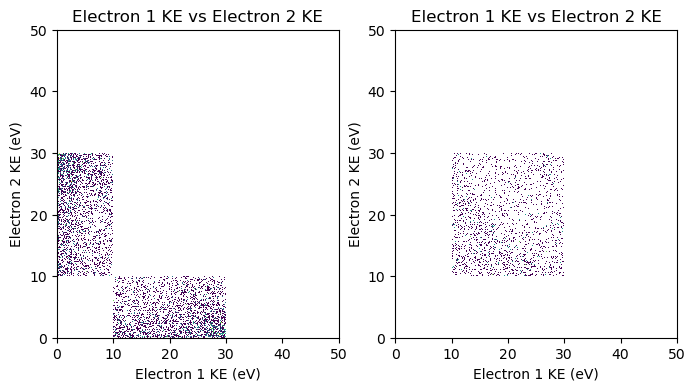

In [1015]:
fig, ax = plt.subplots(1, 2, figsize = (8,4), dpi=100)

x_range = (0,50);
y_range = (0,50);

ax[0].hist2d(KEe1_high, KEe2_high,bins=(500, 500), range=[x_range,y_range], norm=LogNorm());
# Add labels and title
ax[0].set_xlabel('Electron 1 KE (eV)');
ax[0].set_ylabel('Electron 2 KE (eV)');
ax[0].set_title('Electron 1 KE vs Electron 2 KE');
#plt.axvline(28,c='r',ls='--')


ax[1].hist2d(KEe1_low, KEe2_low,bins=(500, 500), range=[x_range,y_range], norm=LogNorm());
# Add labels and title
ax[1].set_xlabel('Electron 1 KE (eV)');
ax[1].set_ylabel('Electron 2 KE (eV)');
ax[1].set_title('Electron 1 KE vs Electron 2 KE');
#plt.axvline(28,c='r',ls='--')

#plt.hist2d(KER, KERe, bins=(100,100));


Text(0.5, 1.0, 'Theta Electron X')

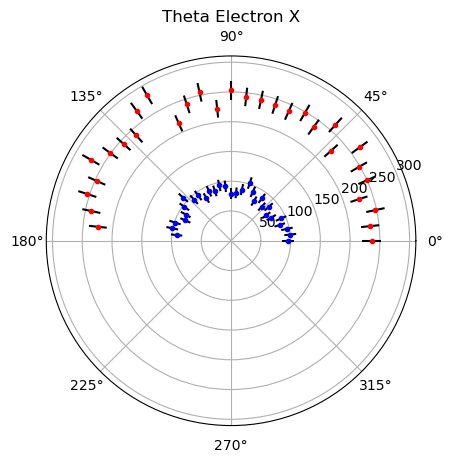

In [1016]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

radius_error_high = [np.sqrt(x) for x in theta_radius_high]

radius_error_low = [np.sqrt(x) for x in theta_radius_low]

ax.errorbar(theta_radian_high[:-1], theta_radius_high, yerr = radius_error_high, fmt = 'r.', ecolor = 'k')
ax.errorbar(theta_radian_low[:-1], theta_radius_low, yerr = radius_error_low, fmt = 'b.', ecolor = 'k')

ax.grid(True)
ax.set_title('Theta Electron X')



